___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Project of Data Analytics Module</p>
## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

In [363]:
import re 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
# Suppressing a warning 
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

params = {
'figure.figsize':(14,7),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'w',
'boxplot.meanprops.markersize': 10.1,
}
# print(plt.style.library)
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.rcParams['figure.figsize'])

# Environment settings: 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 1515)

In [364]:
df = pd.read_json("scout_car.json",lines=True)
df.head(10)

url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
5  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
6  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
7  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
8  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
9  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description      body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima         Sedans  15770   
1                                     1.8 TFSI sport         Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...         Sedans  14640   
3                            1.4 TDi Design S tronic         Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...         Sedans  16790   
5        1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*         Sedans  15090   
6      Sportback 1.6 TDI S-TRONIC S-LINE*NAVI|XENON*  Station wagon  16422   
7                 Sportback 1.4 TDI admired S tronic        Compact  14480   
8             SPB 1.6 TDI S-tronic Metal plus + Xeno         Sedans  16700   
9              SPORTBACK TFSI ULTRA 95 S-TRONIC AMB.         Sedans  17990   

                vat         km registration         prev_owner  kW      hp  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN   66 kW   
1  Price negotiable  80,000 km      03/2017               None NaN  141 kW   
2    VAT deductible  83,450 km      02/2016   1 previous owner NaN   85 kW   
3              None  73,000 km      08/2016   1 previous owner NaN   66 kW   
4              None  16,200 km      05/2016   1 previous owner NaN   66 kW   
5              None  63,668 km      02/2016   1 previous owner NaN   85 kW   
6    VAT deductible  62,111 km      03/2016   1 previous owner NaN   85 kW   
7    VAT deductible  14,986 km      02/2016   1 previous owner NaN   66 kW   
8              None  57,000 km      02/2016   1 previous owner NaN   85 kW   
9              None  16,103 km      06/2017               None NaN   70 kW   

                                      Type Previous Owners  \
0  [, Used, , Diesel (Particulate Filter)]           \n2\n   
1                     [, Used, , Gasoline]             NaN   
2  [, Used, , Diesel (Particulate Filter)]           \n1\n   
3  [, Used, , Diesel (Particulate Filter)]           \n1\n   
4  [, Used, , Diesel (Particulate Filter)]           \n1\n   
5  [, Used, , Diesel (Particulate Filter)]           \n1\n   
6  [, Used, , Diesel (Particulate Filter)]           \n1\n   
7  [, Used, , Diesel (Particulate Filter)]           \n1\n   
8  [, Used, , Diesel (Particulate Filter)]           \n1\n   
9                     [, Used, , Gasoline]             NaN   

                         Next Inspection                      Inspection new  \
0  [\n06/2021\n, \n99 g CO2/km (comb)\n]               [\nYes\n, \nEuro 6\n]   
1                                    NaN                                 NaN   
2                                    NaN                                 NaN   
3                                    NaN                                 NaN   
4                                    NaN  [\nYes\n, \n109 g CO2/km (comb)\n]   
5                                    NaN                                 NaN   
6                                    NaN   [\nYes\n, \n98 g CO2/km (comb)\n]   
7                                    NaN   [\nYes\n, \n97 g CO2/km (comb)\n]   
8  [\n02/2020\n, \n97 g CO2/km (comb)\n]                                 NaN   
9                                    NaN                                 NaN   

                           Wa

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [366]:
df_copy = df.copy()

In [367]:
df.isna().sum()

url                                  0
make_model                           0
short_description                   46
body_type                           60
price                                0
vat                               4513
km                                   0
registration                         0
prev_owner                        6828
kW                               15919
hp                                   0
Type                                 2
Previous Owners                   6640
Next Inspection                  12384
Inspection new                   11987
Warranty                          5420
Full Service                      7704
Non-smoking Vehicle               8742
null                                 0
Make                                 0
Model                                0
Offer Number                      3175
First Registration                1597
Body Color                         597
Paint Type                        5772
Body Color Original      

In [368]:
df.duplicated
# no duplicated...

<bound method DataFrame.duplicated of                                                      url      make_model  \
0      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
1      https://www.autoscout24.com//offers/audi-a1-1-...         Audi A1   
2      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
3      https://www.autoscout24.com//offers/audi-a1-1-...         Audi A1   
4      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
...                                                  ...             ...   
15914  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15915  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15916  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15917  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15918  https://www.autoscout24.com//offers/renault-es...  Renault Espace   

                                       short_desc

In [369]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

# PART- 1 `( Data Cleaning )`

In [370]:
from skimpy import clean_columns

df= clean_columns(df)

42 column names have been cleaned

In [371]:
# df.nunique() # there're some columns that include values with type of list

In [372]:
df = df.applymap(lambda x: ",".join(map(str,x)) if isinstance(x, list) else x )
df.head()

url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  k_w      hp  \
0    VAT deductible  56,013 km      01/2016  2 previous owners  NaN   66 kW   
1  Price negotiable  80,000 km      03/2017               None  NaN  141 kW   
2    VAT deductible  83,450 km      02/2016   1 previous owner  NaN   85 kW   
3              None  73,000 km      08/2016   1 previous owner  NaN   66 kW   
4              None  16,200 km      05/2016   1 previous owner  NaN   66 kW   

                                 type previous_owners  \
0  ,Used,,Diesel (Particulate Filter)           \n2\n   
1                     ,Used,,Gasoline             NaN   
2  ,Used,,Diesel (Particulate Filter)           \n1\n   
3  ,Used,,Diesel (Particulate Filter)           \n1\n   
4  ,Used,,Diesel (Particulate Filter)           \n1\n   

                      next_inspection                   inspection_new  \
0  \n06/2021\n,\n99 g CO2/km (comb)\n               \nYes\n,\nEuro 6\n   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                                 NaN  \nYes\n,\n109 g CO2/km (comb)\n   

                       warranty                  full_service  \
0           \n,\n,\n4 (Green)\n                         \n,\n   
1                           NaN                           NaN   
2  \n,\n,\n99 g CO2/km (comb)\n                           NaN   
3                           NaN  \n,\n,\n99 g CO2/km (comb)\n   
4              \n,\n,\nEuro 6\n           \n,\n,\n4 (Green)\n   

  non_smoking_vehicle null      make     model   offer_number  \
0               \n,\n       \nAudi\n  \n,A1,\n  \nLR-062483\n   
1                 NaN       \nAudi\n  \n,A1,\n            NaN   
2                 NaN       \nAudi\n  \n,A1,\n   \nAM-95365\n   
3    \n,\n,\nEuro 6\n       \nAudi\n  \n,A1,\n            NaN   
4               \n,\n       \nAudi\n  \n,A1,\n      \nC1626\n   

  first_registration   body_color    paint_type         body_color_original  \
0         \n,2016,\n  \n,Black,\n  \nMetallic\n           \nMythosschwarz\n   
1         \n,2017,\n    \n,Red,\n           NaN                         NaN   
2         \n,2016,\n  \n,Black,\n  \nMetallic\n  \nmythosschwarz metallic\n   
3         \n,2016,\n  \n,Brown,\n  \nMetallic\n                         NaN   
4         \n,2016,\n  \n,Black,\n  \nMetallic\n  \nMythosschwarz Metallic\n   

         upholstery          body nr_of_doors nr_of_seats    model_code  \
0  \nCloth, Black\n  \n,Sedans,\n       \n5\n       \n5\n  \n0588/BDF\n   
1   \nCloth, Grey\n  \n,Sedans,\n       \n3\n       \n4\n  \n0588/BCY\n   
2  \nCloth, Black\n  \n,Sedans,\n       \n4\n       \n4\n           NaN   
3               NaN  \n,Sedans,\n       \n3\n       \n4\n           NaN   
4  \nCloth, Black\n  \n,Sedans,\n       \n5\n       \n5\n  \n0588/BDF\n   

      gearing_type  displacement cylinders        weight drive_chain  \
0  \n,Automatic,\n  \n1,422 cc\n     \n3\n  \n1,220 kg\n   \nfront\n   
1  \n,Automatic,\n  \n1,798 cc\n     \n4\n  \n1,255 kg\n   \nfront\n   
2  \n,Automatic,\n  

In [373]:
df = df.apply(lambda x: x.str.replace(",?\n,?","") if x.dtype == "O" else x)
df.head()

url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  k_w      hp  \
0    VAT deductible  56,013 km      01/2016  2 previous owners  NaN   66 kW   
1  Price negotiable  80,000 km      03/2017               None  NaN  141 kW   
2    VAT deductible  83,450 km      02/2016   1 previous owner  NaN   85 kW   
3              None  73,000 km      08/2016   1 previous owner  NaN   66 kW   
4              None  16,200 km      05/2016   1 previous owner  NaN   66 kW   

                                 type previous_owners  \
0  ,Used,,Diesel (Particulate Filter)               2   
1                     ,Used,,Gasoline             NaN   
2  ,Used,,Diesel (Particulate Filter)               1   
3  ,Used,,Diesel (Particulate Filter)               1   
4  ,Used,,Diesel (Particulate Filter)               1   

             next_inspection          inspection_new            warranty  \
0  06/202199 g CO2/km (comb)               YesEuro 6           4 (Green)   
1                        NaN                     NaN                 NaN   
2                        NaN                     NaN  99 g CO2/km (comb)   
3                        NaN                     NaN                 NaN   
4                        NaN  Yes109 g CO2/km (comb)              Euro 6   

         full_service non_smoking_vehicle null  make model offer_number  \
0                                               Audi    A1    LR-062483   
1                 NaN                 NaN       Audi    A1          NaN   
2                 NaN                 NaN       Audi    A1     AM-95365   
3  99 g CO2/km (comb)              Euro 6       Audi    A1          NaN   
4           4 (Green)                           Audi    A1        C1626   

  first_registration body_color paint_type     body_color_original  \
0               2016      Black   Metallic           Mythosschwarz   
1               2017        Red        NaN                     NaN   
2               2016      Black   Metallic  mythosschwarz metallic   
3               2016      Brown   Metallic                     NaN   
4               2016      Black   Metallic  Mythosschwarz Metallic   

     upholstery    body nr_of_doors nr_of_seats model_code gearing_type  \
0  Cloth, Black  Sedans           5           5   0588/BDF    Automatic   
1   Cloth, Grey  Sedans           3           4   0588/BCY    Automatic   
2  Cloth, Black  Sedans           4           4        NaN    Automatic   
3           NaN  Sedans           3           4        NaN    Automatic   
4  Cloth, Black  Sedans           5           5   0588/BDF    Automatic   

  displacement cylinders    weight drive_chain                         fuel  \
0     1,422 cc         3  1,220 kg       front  Diesel (Particulate Filter)   
1     1,798 cc         4  1,255 kg       front                     Gasoline   
2     1,598 cc       NaN       NaN       front  Diesel (Particulate Filter)   
3     1,422 cc         3  1,195 kg         NaN  Diesel (Particulate Filter)   
4     1,422 cc         3       NaN       front  Diesel (Particulate Filter)   

                                         consumption        co_2_emission  \
0  ['3.8 l/100 km (comb)'],['4.3 l/100 km (city)'...   99

In [374]:
def col_summary(col):
    print('Column Name : ', col)
    print('--------------------------------')
    print('Percentage of Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print('Number of Nulls   : ', df[col].isnull().sum())
    print('Number of Uniques : ', df[col].nunique())
    print("Value Counts :\n",df[col].value_counts(dropna = False))
    print()
    print("Value_counts with sort index :\n",df[col].value_counts(dropna = False).sort_index())
    print("##"*20)
    print()

In [375]:
df.describe(include="O").T

count unique  \
url                            15919  15919   
make_model                     15919      9   
short_description              15873  10001   
body_type                      15859      9   
vat                            11406      2   
km                             15919   6690   
registration                   15919     48   
prev_owner                      9091      4   
hp                             15919     81   
type                           15917    169   
previous_owners                 9279    101   
next_inspection                 3535   1384   
inspection_new                  3932    201   
warranty                       10499    506   
full_service                    8215    121   
non_smoking_vehicle             7177     93   
null                           15919      1   
make                           15919      3   
model                          15919      9   
offer_number                   12744  11440   
first_registration             14322      4   
body_color                     15322     14   
paint_type                     10147      3   
body_color_original            12160   1927   
upholstery                     12199     46   
body                           15859      9   
nr_of_doors                    15707      6   
nr_of_seats                    14942      6   
model_code                      4978    232   
gearing_type                   15919      3   
displacement                   15423     77   
cylinders                      10239      7   
weight                          8945    434   
drive_chain                     9061      3   
fuel                           15919     77   
consumption                    14013    881   
co_2_emission                  14111    123   
emission_class                 12898      7   
comfort_&_convenience          14999   6198   
entertainment_&_media          14545    346   
extras                         12957    659   
safety_&_security              14937   4443   
description                    15919  12864   
emission_label                  3985      6   
gears                          11207     10   
country_version                 7586     23   
electricity_consumption          137      1   
last_service_date                566    255   
other_fuel_types                 880      1   
availability                     635     15   
last_timing_belt_service_date     16     15   
available_from                   272     46   

                                                                             top  \
url                            https://www.autoscout24.com//offers/audi-a1-sp...   
make_model                                                               Audi A3   
short_description                              SPB 1.6 TDI 116 CV S tronic Sport   
body_type                                                                 Sedans   
vat                                                               VAT deductible   
km                                                                         10 km   
registration                                                                 -/-   
prev_owner                                                      1 previous owner   
hp                                                                         85 kW   
type                                          ,Used,,Diesel (Particulate Filter)   
previous_owners                                                                1   
next_inspection                                                          04/2022   
inspection_new                                                         YesEuro 6   
warranty                                                                  Euro 6   
full_service                                                           4 (Green)   
non_smoking_vehicle                                                                
null                                                                               
make                       

In [376]:
df.describe().T

count      mean      std    min       25%       50%       75%  \
price 15919.000 18019.897 7386.169 13.000 12850.000 16900.000 21900.000   
k_w       0.000       NaN      NaN    NaN       NaN       NaN       NaN   

            max  
price 74600.000  
k_w         NaN

After checking the col_summary results and descriptive values of each column, it was decided

   * to replace empty rows with np.nan
   
   * to replace empty list with np.nan
   
   * to drop columns containing greater than or equal %95 null values
   
   * to apply data cleaning column by column.

In [377]:
df["non_smoking_vehicle"][df["non_smoking_vehicle"].str.contains(r"^\s*$") == True] = np.nan
df["non_smoking_vehicle"].isnull().sum()

12459

In [378]:
df["warranty"][df["warranty"].str.contains(r"^\s*$") == True] = np.nan
df["warranty"].isnull().sum()

6763

In [379]:
df["full_service"][df["full_service"].str.contains(r"^\s*$") == True] = np.nan
df["full_service"].isnull().sum()

9689

In [380]:
df["description"][df["description"].str.contains(r"^\s*$") == True] = np.nan
df["description"].isnull().sum()

669

In [381]:
df["null"][df["null"].str.contains(r"^\s*$") == True] = np.nan
df["null"].isnull().sum()

15919

In [382]:
df.isin([""]).sum()

url                              0
make_model                       0
short_description                0
body_type                        0
price                            0
vat                              0
km                               0
registration                     0
prev_owner                       0
k_w                              0
hp                               0
type                             0
previous_owners                  0
next_inspection                  0
inspection_new                   0
warranty                         0
full_service                     0
non_smoking_vehicle              0
null                             0
make                             0
model                            0
offer_number                     0
first_registration               0
body_color                       0
paint_type                       0
body_color_original              0
upholstery                       0
body                             0
nr_of_doors         

Containing only empty lists

In [383]:
df.other_fuel_types.value_counts(dropna=False)

NaN         15039
[],[],[]      880
Name: other_fuel_types, dtype: int64

In [384]:
df.isin(["[],[],[]"]).sum()

url                                0
make_model                         0
short_description                  0
body_type                          0
price                              0
vat                                0
km                                 0
registration                       0
prev_owner                         0
k_w                                0
hp                                 0
type                               0
previous_owners                    0
next_inspection                    0
inspection_new                     0
warranty                           0
full_service                       0
non_smoking_vehicle                0
null                               0
make                               0
model                              0
offer_number                       0
first_registration                 0
body_color                         0
paint_type                         0
body_color_original                0
upholstery                         0
b

In [385]:
df.other_fuel_types.replace(r"\[\]",np.nan,regex=True).isnull().sum() # the column is empty

15919

In [386]:
df.other_fuel_types.replace(r"\[\]",np.nan,regex=True,inplace=True)

In [387]:
df.co_2_emission.replace(r"\[\]",np.nan,regex=True).isnull().sum() 

2436

In [388]:
df.co_2_emission.replace(r"\[\]",np.nan,regex=True,inplace=True)

In [389]:
df.emission_class.replace(r"\[\]",np.nan,regex=True).isnull().sum() 

3628

In [390]:
df.emission_class.replace(r"\[\]",np.nan,regex=True,inplace=True)

Dropping columns which have null values over the 95%

In [391]:
for col in df.columns :
    cond = df[col].isnull().sum() / df.shape[0]*100
    if cond >= 95:
        print(col)
        print('Per_of_Nulls   : ', '%', round(cond, 2))
        print("-"*25)

k_w
Per_of_Nulls   :  % 100.0
-------------------------
null
Per_of_Nulls   :  % 100.0
-------------------------
electricity_consumption
Per_of_Nulls   :  % 99.14
-------------------------
last_service_date
Per_of_Nulls   :  % 96.44
-------------------------
other_fuel_types
Per_of_Nulls   :  % 100.0
-------------------------
availability
Per_of_Nulls   :  % 96.01
-------------------------
last_timing_belt_service_date
Per_of_Nulls   :  % 99.9
-------------------------
available_from
Per_of_Nulls   :  % 98.29
-------------------------


In [392]:
print(df.shape)
for col in df.columns :
    if (df[col].isnull().sum() / df.shape[0]*100 ) >= 95:
        df.drop(col, axis=1,inplace=True)
        print(col)
print(df.shape)

(15919, 54)
k_w
null
electricity_consumption
last_service_date
other_fuel_types
availability
last_timing_belt_service_date
available_from
(15919, 46)


## url

In [393]:
col_summary("url")

Column Name :  url
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  15919
Value Counts :
 https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                  

This feature shows the data where come from,it we don't need it.

In [394]:
df.drop("url",axis=1,inplace=True)

## make_model

In [395]:
col_summary("make_model")

Column Name :  make_model
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  9
Value Counts :
 Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

Value_counts with sort index :
 Audi A1           2614
Audi A2              1
Audi A3           3097
Opel Astra        2526
Opel Corsa        2219
Opel Insignia     2598
Renault Clio      1839
Renault Duster      34
Renault Espace     991
Name: make_model, dtype: int64
########################################



In [396]:
df[["make_model","make","model"]].sample(10)

make_model  make     model
8265      Opel Corsa  Opel     Corsa
1722         Audi A1  Audi        A1
8398      Opel Corsa  Opel     Corsa
8354      Opel Corsa  Opel     Corsa
8918      Opel Corsa  Opel     Corsa
8376      Opel Corsa  Opel     Corsa
424          Audi A1  Audi        A1
11317  Opel Insignia  Opel  Insignia
5436         Audi A3  Audi        A3
10131     Opel Corsa  Opel     Corsa

As it seen, make and model columns were derived by make_model column, so we don't need it also

In [397]:
df.drop(columns=["make","model"],inplace=True)

## short_description

In [398]:
col_summary("short_description")

Column Name :  short_description
--------------------------------
Percentage of Nulls   :  % 0.29
Number of Nulls   :  46
Number of Uniques :  10001
Value Counts :
 SPB 1.6 TDI 116 CV S tronic Sport                 64
None                                              46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

Value_counts with sort index :
  1,6 CDTI**NAVI*Klimaaut*Tempomat*EURO6*TÜV NEU     1
 1.4 75 cv5 porte b-color                           1
 1.4 TFSI Attraction (125 CV)                       6
 1.4

Ther're some information in this column but it has not any proper layout. Hence, it should be dropped.

In [399]:
df.drop("short_description",axis=1,inplace=True)

## body_type

In [400]:
col_summary("body_type")

Column Name :  body_type
--------------------------------
Percentage of Nulls   :  % 0.38
Number of Nulls   :  60
Number of Uniques :  9
Value Counts :
 Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
None               60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

Value_counts with sort index :
 Compact          3153
Convertible         8
Coupe              25
Off-Road           56
Other             290
Sedans           7903
Station wagon    3553
Transporter        88
Van               783
None               60
Name: body_type, dtype: int64
########################################



In [401]:
df[df["body_type"].isna()].isna().sum() # there's a column, "body" and all of it's values are also null, lets'check

make_model                0
body_type                60
price                     0
vat                      40
km                        0
registration              0
prev_owner               51
hp                        0
type                      0
previous_owners          51
next_inspection          57
inspection_new           59
warranty                 55
full_service             58
non_smoking_vehicle      58
offer_number             39
first_registration       12
body_color                0
paint_type               50
body_color_original      27
upholstery               52
body                     60
nr_of_doors               1
nr_of_seats              47
model_code               60
gearing_type              0
displacement             23
cylinders                34
weight                   52
drive_chain              58
fuel                      0
consumption              19
co_2_emission            19
emission_class           50
comfort_&_convenience    16
entertainment_&_medi

In [402]:
df[["body_type", "body"]].value_counts(dropna=False)

body_type      body         
Sedans         Sedans           7903
Station wagon  Station wagon    3553
Compact        Compact          3153
Van            Van               783
Other          Other             290
Transporter    Transporter        88
NaN            NaN                60
Off-Road       Off-Road           56
Coupe          Coupe              25
Convertible    Convertible         8
dtype: int64

As these two columns are exactly the same, one of them should be dropped.

In [403]:
df.drop("body_type",axis=1,inplace=True)

## price

In [404]:
col_summary("price")

Column Name :  price
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  2956
Value Counts :
 14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

Value_counts with sort index :
 13       1
120      1
255      1
331      1
4950     1
        ..
64332    1
64900    1
67600    1
68320    1
74600    1
Name: price, Length: 2956, dtype: int64
########################################



## vat

In [405]:
col_summary("vat")

Column Name :  vat
--------------------------------
Percentage of Nulls   :  % 28.35
Number of Nulls   :  4513
Number of Uniques :  2
Value Counts :
 VAT deductible      10980
None                 4513
Price negotiable      426
Name: vat, dtype: int64

Value_counts with sort index :
 Price negotiable      426
VAT deductible      10980
None                 4513
Name: vat, dtype: int64
########################################



## km

In [406]:
col_summary("km")

Column Name :  km
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  6690
Value Counts :
 10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: km, Length: 6690, dtype: int64

Value_counts with sort index :
 - km         1024
0 km           19
1 km          367
1,000 km       46
1,001 km        4
             ... 
99,999 km       1
990 km          2
991 km          1
995 km          1
999 km          3
Name: km, Length: 6690, dtype: int64
########################################



In [407]:
df.km.str.replace("-? km","").str.replace(",",".").replace("",np.nan).astype(float)

0       56.013
1       80.000
2       83.450
3       73.000
4       16.200
         ...  
15914      NaN
15915    9.900
15916   15.000
15917   10.000
15918      NaN
Name: km, Length: 15919, dtype: float64

In [408]:
df["km"] = df.km.str.replace("-? km","").str.replace(",",".").replace("",np.nan).astype(float)

## registration

In [409]:
col_summary(["registration","first_registration"])

Column Name :  ['registration', 'first_registration']
--------------------------------
Percentage of Nulls   :  % registration          0.000
first_registration   10.030
dtype: float64
Number of Nulls   :  registration             0
first_registration    1597
dtype: int64
Number of Uniques :  registration          48
first_registration     4
dtype: int64
Value Counts :
 registration  first_registration
-/-           NaN                   1597
03/2018       2018                   695
02/2019       2019                   585
05/2018       2018                   572
03/2019       2019                   543
01/2019       2019                   541
04/2018       2018                   541
02/2018       2018                   539
03/2016       2016                   536
06/2018       2018                   532
04/2016       2016                   532
01/2018       2018                   511
04/2019       2019                   506
02/2016       2016                   472
03/2017       2017  

first_registration column was derived from registration column. first_registration should be dropped as the registration column has more detail.

In [410]:
df.drop("first_registration",axis=1,inplace=True)

In [411]:
df.registration.replace("-/-",np.nan,inplace=True)

In [412]:
df.registration = pd.to_datetime(df.registration)

In [413]:
df["age"] = 2019 - df.registration.dt.year

In [414]:
df.age

0       3.000
1       2.000
2       3.000
3       3.000
4       3.000
         ... 
15914     NaN
15915   0.000
15916   0.000
15917   0.000
15918   0.000
Name: age, Length: 15919, dtype: float64

I created a new column shows the age of the cars as "age". In this way I can read the data easier, and also don't need "registration" column. 

In [415]:
df.drop("registration",axis=1,inplace=True)

## prev_owner

In [416]:
col_summary("prev_owner")

Column Name :  prev_owner
--------------------------------
Percentage of Nulls   :  % 42.89
Number of Nulls   :  6828
Number of Uniques :  4
Value Counts :
 1 previous owner     8294
None                 6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

Value_counts with sort index :
 1 previous owner     8294
2 previous owners     778
3 previous owners      17
4 previous owners       2
None                 6828
Name: prev_owner, dtype: int64
########################################



In [417]:
df.prev_owner = df.prev_owner.str.replace(" previous owners?","").replace("",np.nan).astype(float)

## hp

In [418]:
col_summary("hp")

Column Name :  hp
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  81
Value Counts :
 85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
78 kW       20
1 kW        20
294 kW      18
146 kW      18
141 kW      16
57 kW       10
104 kW       8
120 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
90 kW        4
76 kW        4
65 kW        4
149 kW       3
80 kW        3
168 kW       3
98 kW        3
93 kW        3
228 kW       2


In [419]:
df.hp = df.hp.str.replace("-? kW","").replace("",np.nan).astype(float)

## type

In [420]:
col_summary("type")

Column Name :  type
--------------------------------
Percentage of Nulls   :  % 0.01
Number of Nulls   :  2
Number of Uniques :  169
Value Counts :
 ,Used,,Diesel (Particulate Filter)                                                                                                       3475
,Used,,Diesel                                                                                                                            2516
,Used,,Gasoline                                                                                                                          2367
,Used,,Super 95                                                                                                                          1818
,Pre-registered,,Super 95                                                                                                                 500
,New,,Super 95                                                                                                                            497

 ,Demonstration,,Diesel                                                                                                                     45
,Demonstration,,Diesel (Particulate Filter)                                                                                               129
,Demonstration,,Gasoline                                                                                                                  158
,Demonstration,,Gasoline (Particulate Filter)                                                                                               1
,Demonstration,,Regular/Benzine 91                                                                                                         36
,Demonstration,,Regular/Benzine 91 (Particulate Filter)                                                                                     9
,Demonstration,,Regular/Benzine E10 91                                                                                                      1
,Demo

In [421]:
df.type = df.type.str.split(",").str[1]

## previous_owners

In [422]:
col_summary("previous_owners")

Column Name :  previous_owners
--------------------------------
Percentage of Nulls   :  % 41.71
Number of Nulls   :  6640
Number of Uniques :  101
Value Counts :
 1                                                                8103
NaN                                                              6640
2                                                                 766
0                                                                 163
3                                                                  17
1168 g CO2/km (comb)                                               13
1139 g CO2/km (comb)                                               12
1110 g CO2/km (comb)                                               12
1135 g CO2/km (comb)                                                9
1120 g CO2/km (comb)                                                8
16.3 l/100 km (comb)7.8 l/100 km (city)5.4 l/100 km (country)       7
1153 g CO2/km (comb)                                              

In [423]:
df[["prev_owner","previous_owners"]].value_counts(dropna=False)

prev_owner  previous_owners                                              
1.000       1                                                                8103
NaN         NaN                                                              6640
2.000       2                                                                 766
NaN         0                                                                 163
3.000       3                                                                  17
1.000       1168 g CO2/km (comb)                                               13
            1110 g CO2/km (comb)                                               12
            1139 g CO2/km (comb)                                               12
            1135 g CO2/km (comb)                                                9
            1120 g CO2/km (comb)                                                8
            16.3 l/100 km (comb)7.8 l/100 km (city)5.4 l/100 km (country)       7
            1153 g CO2/k

Since the "prev_owner" column seems derived by "previous_owners" column and more proper, "previous_owners" should be dropeed.

In [424]:
df.drop("previous_owners",axis=1,inplace=True)

## next_inspection

In [425]:
col_summary("next_inspection")

Column Name :  next_inspection
--------------------------------
Percentage of Nulls   :  % 77.79
Number of Nulls   :  12384
Number of Uniques :  1384
Value Counts :
 NaN                                                                    12384
04/2022                                                                   62
06/2021                                                                   47
03/2021                                                                   39
03/2022                                                                   36
01/2022                                                                   32
04/2021                                                                   31
05/2021                                                                   29
06/2021Euro 6                                                             29
08/2021135 g CO2/km (comb)                                                28
03/2020                                                         

Name: next_inspection, dtype: int64

Value_counts with sort index :
 01/1921120 g CO2/km (comb)                                                 1
01/1955                                                                    1
01/1999                                                                    1
01/2001120 g CO2/km (comb)                                                 1
01/2001122 g CO2/km (comb)                                                 2
01/2001130 g CO2/km (comb)                                                 2
01/2018102 g CO2/km (comb)                                                 1
01/2019                                                                    1
01/2019102 g CO2/km (comb)                                                 1
01/2019104 g CO2/km (comb)                                                 2
01/2019105 g CO2/km (comb)                                                 1
01/2019106 g CO2/km (comb)                                                 1
01/2019

In [426]:
df.next_inspection = df.next_inspection.str[0:7]

In [427]:
df.next_inspection = pd.to_datetime(df.next_inspection).dt.to_period("M")

## inspection_new

In [428]:
col_summary("inspection_new")

Column Name :  inspection_new
--------------------------------
Percentage of Nulls   :  % 75.3
Number of Nulls   :  11987
Number of Uniques :  201
Value Counts :
 NaN                                                                11987
YesEuro 6                                                            523
Yes                                                                  442
Yes102 g CO2/km (comb)                                               174
Yes4 (Green)                                                         166
YesEuro 6d-TEMP                                                      134
Yes97 g CO2/km (comb)                                                 89
Yes0 kWh/100 km (comb)                                                86
Yes119 g CO2/km (comb)                                                84
Yes128 g CO2/km (comb)                                                81
Yes104 g CO2/km (comb)                                                76
Yes95 g CO2/km (comb)             

In [429]:
df.inspection_new = df.inspection_new.str[0:3]

## warranty

In [430]:
col_summary("warranty")

Column Name :  warranty
--------------------------------
Percentage of Nulls   :  % 42.48
Number of Nulls   :  6763
Number of Uniques :  505
Value Counts :
 NaN                                                                      6763
Euro 6                                                                   1868
12 months                                                                1305
24 months                                                                 585
4 (Green)                                                                 517
12 monthsEuro 6                                                           425
Euro 6d-TEMP                                                              362
48 months                                                                 112
120 g CO2/km (comb)                                                        93
6 months                                                                   86
12 months4 (Green)                                             

In [431]:
df.warranty = df.warranty.str.extract("(\d+) months").astype(float)

## full_service

In [432]:
col_summary("full_service")

Column Name :  full_service
--------------------------------
Percentage of Nulls   :  % 60.86
Number of Nulls   :  9689
Number of Uniques :  120
Value Counts :
 NaN                                                             9689
4 (Green)                                                       2235
Euro 6                                                          2097
Euro 6d-TEMP                                                     399
120 g CO2/km (comb)                                              105
126 g CO2/km (comb)                                               84
104 g CO2/km (comb)                                               77
97 g CO2/km (comb)                                                76
124 g CO2/km (comb)                                               61
99 g CO2/km (comb)                                                60
128 g CO2/km (comb)                                               53
119 g CO2/km (comb)                                               49
140 g CO2/k

In [433]:
df.drop("full_service",axis=1,inplace=True)

There are a lot of null values and the rest are so messy, so this column can be dropped.

## non_smoking_vehicle

In [434]:
col_summary("non_smoking_vehicle")

Column Name :  non_smoking_vehicle
--------------------------------
Percentage of Nulls   :  % 78.26
Number of Nulls   :  12459
Number of Uniques :  92
Value Counts :
 NaN                                                             12459
4 (Green)                                                        1240
Euro 6                                                           1127
Euro 6d-TEMP                                                      345
120 g CO2/km (comb)                                                63
85 g CO2/km (comb)                                                 46
107 g CO2/km (comb)                                                36
104 g CO2/km (comb)                                                36
153 g CO2/km (comb)                                                31
124 g CO2/km (comb)                                                29
1 (No sticker)                                                     24
99 g CO2/km (comb)                                            

In [435]:
df.groupby("emission_class",dropna=False)["non_smoking_vehicle"].value_counts(dropna=False)

emission_class  non_smoking_vehicle                                         
Euro 4          NaN                                                               40
Euro 5          NaN                                                               70
                Euro 5                                                             4
                4 (Green)                                                          2
                114 g CO2/km (comb)                                                1
                143 g CO2/km (comb)                                                1
Euro 6          NaN                                                             7851
                Euro 6                                                          1039
                4 (Green)                                                        650
                120 g CO2/km (comb)                                               62
                85 g CO2/km (comb)                                       

It seems like non_smoking_vehicle column is similar to emission_class column. We might pretend to non_smoking_vehicle column as it shows the null cells represent for the non-smoking-vehicle and the remaining for smoking-vehicle.

In [436]:
df.emission_class.value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64

In [437]:
# this is for filling some missing values in emission_class column, before dropping the non_smoking_vehicle column
df.emission_class = df.groupby("non_smoking_vehicle").emission_class.apply(lambda x: x.fillna(x.mode()))

In [438]:
df.drop("non_smoking_vehicle",axis=1,inplace=True)

## offer_number

In [439]:
col_summary("offer_number")

Column Name :  offer_number
--------------------------------
Percentage of Nulls   :  % 19.94
Number of Nulls   :  3175
Number of Uniques :  11440
Value Counts :
 NaN                                         3175
LT67679                                       27
UN89904                                       27
XJ38068                                       27
JV03654                                       27
                                            ... 
160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b       1
6701576                                        1
6701569                                        1
158121                                         1
Re_30000008029                                 1
Name: offer_number, Length: 11441, dtype: int64

Value_counts with sort index :
 # 250678          1
# 8H6050830       1
# G1024529        1
# G6050580        1
#8023778          2
               ... 
x_45689v          2
y8fx64x           1
zr11914           1
zr11916           1
NaN            31

Since the column occurs from lots of uniques, it should be dropped.

In [440]:
df.drop("offer_number",axis=1,inplace=True)

## body_color

In [441]:
col_summary("body_color")

Column Name :  body_color
--------------------------------
Percentage of Nulls   :  % 3.75
Number of Nulls   :  597
Number of Uniques :  14
Value Counts :
 Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

Value_counts with sort index :
 Beige      108
Black     3745
Blue      1431
Bronze       6
Brown      289
Gold         2
Green      154
Grey      3505
Orange       3
Red        957
Silver    1647
Violet      18
White     3406
Yellow      51
NaN        597
Name: body_color, dtype: int64
########################################



## paint_type

In [442]:
col_summary("paint_type")

Column Name :  paint_type
--------------------------------
Percentage of Nulls   :  % 36.26
Number of Nulls   :  5772
Number of Uniques :  3
Value Counts :
 Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

Value_counts with sort index :
 Metallic       9794
Perl effect       6
Uni/basic       347
NaN            5772
Name: paint_type, dtype: int64
########################################



## body_color_original

In [443]:
col_summary("body_color_original")

Column Name :  body_color_original
--------------------------------
Percentage of Nulls   :  % 23.61
Number of Nulls   :  3759
Number of Uniques :  1927
Value Counts :
 NaN                              3759
Onyx Schwarz                      338
Bianco                            282
Mythosschwarz Metallic            238
Brillantschwarz                   216
                                 ... 
Rouge-Braun (G0Y)                   1
VARI COLRI DISPONIBILI              1
Kokosnussbraun Metallic             1
Farbe frei wählbar                  1
Perlmutt-Weiß Metallic (Weiß)       1
Name: body_color_original, Length: 1928, dtype: int64

Value_counts with sort index :
 "PLATIN"                          1
"satinsilber "                    1
(0C0C) Monsungrau Metallic        1
(B4B4) Cortinaweiss               1
(NNP)                             1
                               ... 
wählbar - ggf. mit Aufpreis     118
wählbar -ggfl. mit Aufpreis       1
wählbar, ggf gegen Aufpreis       2
zw

## upholstery

In [444]:
col_summary("upholstery")

Column Name :  upholstery
--------------------------------
Percentage of Nulls   :  % 23.37
Number of Nulls   :  3720
Number of Uniques :  46
Value Counts :
 Cloth, Black           5821
NaN                    3720
Part leather, Black    1121
Cloth                  1005
Cloth, Grey             891
Cloth, Other            639
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Full leather, Brown     116
Part leather, Grey      116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Other                    56
Part leather, Brown      50
alcantara, Black         47
Velour, Black            36
Full leather, Beige      36
Cloth, Brown             28
Velour                   16
Other, Grey              15
Cloth, Beige             13
Brown                    12
Cloth, Blue              12
Velour, Grey              8
Cl

In [445]:
df.upholstery.str.split(", ").str[0].value_counts(dropna=False)

Cloth           8423
NaN             3720
Part leather    1499
Full leather    1009
Black            491
Other            368
Grey             273
Velour            60
alcantara         57
Brown             12
Beige              3
Blue               2
White              2
Name: upholstery, dtype: int64

In [446]:
up_type = ["Cloth", "Part leather", "Full leather", "alcantara", "Velour", "Other"]
up_color = ['Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']

a_type = df['upholstery'].str.split(', ').str[0]
b_color = df['upholstery'].str.split(', ').str[1]

a_color = a_type[a_type.isin(up_color)]
b_color.fillna(a_color, inplace=True)

a_type[a_type.isin(up_color)] = np.NaN

df['upholstery_type'] = a_type
df['upholstery_color'] = b_color

In [447]:
df[["upholstery_type","upholstery_color","upholstery"]]

upholstery_type upholstery_color           upholstery
0               Cloth            Black         Cloth, Black
1               Cloth             Grey          Cloth, Grey
2               Cloth            Black         Cloth, Black
3                 NaN              NaN                  NaN
4               Cloth            Black         Cloth, Black
...               ...              ...                  ...
15914             NaN              NaN                  NaN
15915           Cloth              NaN                Cloth
15916    Full leather            Black  Full leather, Black
15917    Part leather              NaN         Part leather
15918    Full leather            Brown  Full leather, Brown

[15919 rows x 3 columns]

In [448]:
df.drop("upholstery",axis=1,inplace=True)

## nr_of_doors

In [449]:
col_summary("nr_of_doors")

Column Name :  nr_of_doors
--------------------------------
Percentage of Nulls   :  % 1.33
Number of Nulls   :  212
Number of Uniques :  6
Value Counts :
 5      11575
4       3079
3        832
2        219
NaN      212
1          1
7          1
Name: nr_of_doors, dtype: int64

Value_counts with sort index :
 1          1
2        219
3        832
4       3079
5      11575
7          1
NaN      212
Name: nr_of_doors, dtype: int64
########################################



In [450]:
df["nr_of_doors"] = df.nr_of_doors.astype(float)

## nr_of_seats

In [451]:
col_summary("nr_of_seats")

Column Name :  nr_of_seats
--------------------------------
Percentage of Nulls   :  % 6.14
Number of Nulls   :  977
Number of Uniques :  6
Value Counts :
 5      13336
4       1125
NaN      977
7        362
2        116
6          2
3          1
Name: nr_of_seats, dtype: int64

Value_counts with sort index :
 2        116
3          1
4       1125
5      13336
6          2
7        362
NaN      977
Name: nr_of_seats, dtype: int64
########################################



In [452]:
df["nr_of_seats"] = df.nr_of_seats.astype(float)

## model_code

In [453]:
col_summary("model_code")

Column Name :  model_code
--------------------------------
Percentage of Nulls   :  % 68.73
Number of Nulls   :  10941
Number of Uniques :  232
Value Counts :
 NaN         10941
0035/BCB      268
0588/BNO      245
0588/BDB      206
0588/BHX      188
0588/BDF      175
1844/ADJ      175
0588/BCV      139
3333/BAJ      122
3333/BEF      118
0588/AYB      117
0035/BEL      111
0588/BLL      109
3333/BHJ       87
0588/BLH       86
0035/BKN       84
0035/BFM       84
0588/AWJ       82
3333/BJR       79
0588/BHM       79
0035/BFI       76
0035/BKQ       69
0588/BDC       67
0035/BKU       62
0035/BHM       60
3333/BDQ       59
0035/BBZ       59
0588/BNN       58
0588/BLG       53
0588/BDG       52
3333/BEG       50
0035/BHQ       48
0035/BCJ       46
0035/BFP       44
0035/BHP       43
1844/AJG       43
0035/BHY       41
0588/BHL       40
0035/BFJ       39
0035/BCL       38
0588/BCZ       35
1844/ACW       35
0588/BIB       35
0035/BGP       35
1844/AAI       32
1844/ACP       32
0588/BCW    

In [454]:
df.drop("model_code",axis=1,inplace=True)

## gearing_type

In [455]:
col_summary("gearing_type")

Column Name :  gearing_type
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  3
Value Counts :
 Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

Value_counts with sort index :
 Automatic         7297
Manual            8153
Semi-automatic     469
Name: gearing_type, dtype: int64
########################################



## displacement

In [456]:
col_summary("displacement")

Column Name :  displacement
--------------------------------
Percentage of Nulls   :  % 3.12
Number of Nulls   :  496
Number of Uniques :  77
Value Counts :
 1,598 cc     4761
999 cc       2438
1,398 cc     1314
1,399 cc      749
1,229 cc      677
1,956 cc      670
1,461 cc      595
1,490 cc      559
NaN           496
1,422 cc      467
1,197 cc      353
898 cc        351
1,395 cc      320
1,968 cc      301
1,149 cc      288
1,618 cc      212
1,798 cc      210
1,498 cc      196
1,600 cc      130
1,248 cc      110
1,997 cc      103
1,364 cc      102
1,400 cc       90
998 cc         72
1,500 cc       50
2,000 cc       46
1,000 cc       40
1 cc           36
1,998 cc       25
2,480 cc       20
1,200 cc       18
1,984 cc       18
1,397 cc       11
899 cc         11
160 cc          6
929 cc          5
1,499 cc        5
997 cc          4
1,596 cc        4
139 cc          4
900 cc          4
1,599 cc        3
1,199 cc        3
1,396 cc        3
1,495 cc        2
1,589 cc        2
1,300 cc      

In [457]:
df.displacement = df.displacement.str.replace(",","").str.replace(" cc","").astype(float)

## cylinders

In [458]:
col_summary("cylinders")

Column Name :  cylinders
--------------------------------
Percentage of Nulls   :  % 35.68
Number of Nulls   :  5680
Number of Uniques :  7
Value Counts :
 4      8105
NaN    5680
3      2104
5        22
6         3
8         2
2         2
1         1
Name: cylinders, dtype: int64

Value_counts with sort index :
 1         1
2         2
3      2104
4      8105
5        22
6         3
8         2
NaN    5680
Name: cylinders, dtype: int64
########################################



In [459]:
df.cylinders = df.cylinders.astype(float)

## weight

In [460]:
col_summary("weight")

Column Name :  weight
--------------------------------
Percentage of Nulls   :  % 43.81
Number of Nulls   :  6974
Number of Uniques :  434
Value Counts :
 NaN         6974
1,163 kg     574
1,360 kg     356
1,165 kg     301
1,335 kg     242
1,135 kg     213
1,199 kg     205
1,734 kg     170
1,180 kg     168
1,503 kg     165
1,350 kg     155
1,355 kg     135
1,260 kg     127
1,275 kg     112
1,278 kg     110
1,487 kg     109
1,425 kg     109
1,255 kg     108
1,200 kg     107
1,522 kg     103
1,273 kg     103
1,280 kg     102
1,403 kg      91
1,120 kg      90
1,659 kg      89
1,195 kg      89
1,701 kg      87
1,250 kg      84
1,441 kg      82
1,308 kg      80
1,285 kg      80
1,613 kg      75
1,110 kg      75
1,279 kg      72
1,364 kg      70
1,345 kg      67
1,733 kg      65
1,325 kg      64
1,141 kg      64
1,685 kg      64
1,071 kg      64
1,230 kg      63
1,845 kg      56
1,090 kg      54
1,052 kg      53
1,154 kg      52
1,664 kg      52
1,513 kg      51
1,065 kg      50
1,237 kg    

In [461]:
df.weight = df.weight.str.replace(",","").str.replace(" kg","").astype(float)

## drive_chain

In [462]:
col_summary("drive_chain")

Column Name :  drive_chain
--------------------------------
Percentage of Nulls   :  % 43.08
Number of Nulls   :  6858
Number of Uniques :  3
Value Counts :
 front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

Value_counts with sort index :
 4WD       171
front    8886
rear        4
NaN      6858
Name: drive_chain, dtype: int64
########################################



## fuel

In [463]:
col_summary("fuel")

Column Name :  fuel
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  77
Value Counts :
 Diesel (Particulate Filter)                                                                                                       4315
Super 95                                                                                                                          3338
Gasoline                                                                                                                          3175
Diesel                                                                                                                            2984
Super 95 / Regular/Benzine 91                                                                                                      424
Regular/Benzine 91                                                                                                                 354
Super E10 95                               

In [464]:
benzine = ["Gasoline", "Regular", "Others", "Super"]
diesel  = ["Biodiesel", "Diesel"]
lpg     = ["Biogas", "CNG", "Domestic gas H", "LPG"]
electric  = ['Electric', 'Electric/Gasoline']

def fueltype(x):
    if any(i in x for i in hibrit):
        return "Electric"
    elif any(i in x for i in lpg):
        return "LPG/CNG"
    elif any(i in x for i in benzine):
        return "Benzine"
    elif any(i in x for i in diesel):
        return "Diesel"
    else:
        return x 

In [465]:
df.fuel = df.fuel.apply(fueltype)

## consumption

In [466]:
col_summary("consumption")

Column Name :  consumption
--------------------------------
Percentage of Nulls   :  % 11.97
Number of Nulls   :  1906
Number of Uniques :  881
Value Counts :
 NaN                                                                               1906
['3.9 l/100 km (comb)'],['4.1 l/100 km (city)'],['3.7 l/100 km (country)']         304
['4.2 l/100 km (comb)'],['5 l/100 km (city)'],['3.7 l/100 km (country)']           276
['5.4 l/100 km (comb)'],['6.8 l/100 km (city)'],['4.5 l/100 km (country)']         257
['3.8 l/100 km (comb)'],['4.3 l/100 km (city)'],['3.5 l/100 km (country)']         253
['4.7 l/100 km (comb)'],['5.1 l/100 km (city)'],['4.4 l/100 km (country)']         244
['4.5 l/100 km (comb)'],['5.7 l/100 km (city)'],['3.8 l/100 km (country)']         214
['4.4 l/100 km (comb)'],['5.2 l/100 km (city)'],['3.9 l/100 km (country)']         213
['3.3 l/100 km (comb)'],['3.5 l/100 km (city)'],['3.1 l/100 km (country)']         210
['4 l/100 km (comb)'],['4.5 l/100 km (city)'],['3.7 l/100

In [467]:
df[["consumption","co_2_emission","emission_class"]].sample(20)

consumption        co_2_emission  \
218    ['4.1 l/100 km (comb)'],['4.6 l/100 km (city)'...  109 g CO2/km (comb)   
15565  ['6.8 l/100 km (comb)'],['8.7 l/100 km (city)'...  153 g CO2/km (comb)   
10747  ['4.9 l/100 km (comb)'],['6.4 l/100 km (city)'...  129 g CO2/km (comb)   
5255   ['3.9 l/100 km (comb)'],['4.1 l/100 km (city)'...  103 g CO2/km (comb)   
2958                       ['3.9 l/100 km (comb)'],[],[]  102 g CO2/km (comb)   
6716   ['4.5 l/100 km (comb)'],['5.7 l/100 km (city)'...  119 g CO2/km (comb)   
13901  5.7 l/100 km (comb)7.2 l/100 km (city)4.9 l/10...  130 g CO2/km (comb)   
14302                                                NaN                  NaN   
14717  ['5 l/100 km (comb)'],['6.3 l/100 km (city)'],...  113 g CO2/km (comb)   
3509   ['3.8 l/100 km (comb)'],['4.5 l/100 km (city)'...  101 g CO2/km (comb)   
9413                                                 NaN                  NaN   
7621   ['4.6 l/100 km (comb)'],['5.8 l/100 km (city)'...  122 g CO2/km (comb)   
13316  ['5.4 l/100 km (comb)'],['6.8 l/100 km (city)'...  120 g CO2/km (comb)   
9118   ['3.8 l/100 km (comb)'],['4.5 l/100 km (city)'...  100 g CO2/km (comb)   
8104   4.8 l/100 km (comb)5.8 l/100 km (city)4.2 l/10...  110 g CO2/km (comb)   
15185  ['4.7 l/100 km (comb)'],['5.1 l/100 km (city)'...  120 g CO2/km (comb)   
13342  ['5.4 l/100 km (comb)'],['6.8 l/100 km (city)'...  126 g CO2/km (comb)   
12993  ['4.4 l/100 km (comb)'],['5.2 l/100 km (city)'...  116 g CO2/km (comb)   
4022   ['4.6 l/100 km (comb)'],['5.5 l/100 km (city)'...  106 g CO2/km (comb)   
9634   ['5.2 l/100 km (comb)'],['6.8 l/100 km (city)'...  120 g CO2/km (comb)   

      emission_class  
218              NaN  
15565            NaN  
10747         Euro 6  
5255             NaN  
2958             NaN  
6716             NaN  
13901            NaN  
14302            NaN  
14717            NaN  
3509          Euro 6  
9413             NaN  
7621             NaN  
13316            NaN  
9118          Euro 6  
8104             NaN  
15185            NaN  
13342         Euro 6  
12993   Euro 6d-TEMP  
4022             NaN  
9634             NaN

Some relation can be seen between consumption and co_2_emission columns. But this time firstly consumption column should be seperated by its information.

In [468]:
display(df.consumption.str.contains(pat="(?=.*comb)",case=True).value_counts(dropna=False),
       df.consumption.str.contains(pat="(?=.*city)",case=True).value_counts(dropna=False),
       df.consumption.str.contains(pat="(?=.*country)",case=True).value_counts(dropna=False))

True     13886
NaN       1906
False      127
Name: consumption, dtype: int64

True     13483
NaN       1906
False      530
Name: consumption, dtype: int64

True     13543
NaN       1906
False      470
Name: consumption, dtype: int64

In [469]:
df["cons_comb"] = df.consumption.str.extract("(\d+\.\d+|\d+).{0,13}comb").astype(float)
df["cons_city"] = df.consumption.str.extract("(\d+\.\d+|\d+).{0,13}city").astype(float)
df["cons_country"] = df.consumption.str.extract("(\d+\.\d+|\d+).{0,13}country").astype(float)

In [470]:
df.drop("consumption",axis=1,inplace=True)

   ## co_2_emission

In [471]:
col_summary("co_2_emission")

Column Name :  co_2_emission
--------------------------------
Percentage of Nulls   :  % 15.3
Number of Nulls   :  2436
Number of Uniques :  122
Value Counts :
 NaN                       2436
120 g CO2/km (comb)        740
99 g CO2/km (comb)         545
97 g CO2/km (comb)         537
104 g CO2/km (comb)        501
102 g CO2/km (comb)        477
103 g CO2/km (comb)        445
114 g CO2/km (comb)        382
124 g CO2/km (comb)        372
107 g CO2/km (comb)        362
108 g CO2/km (comb)        362
119 g CO2/km (comb)        361
106 g CO2/km (comb)        349
128 g CO2/km (comb)        329
126 g CO2/km (comb)        282
85 g CO2/km (comb)         275
118 g CO2/km (comb)        270
110 g CO2/km (comb)        266
127 g CO2/km (comb)        257
117 g CO2/km (comb)        254
111 g CO2/km (comb)        237
113 g CO2/km (comb)        235
109 g CO2/km (comb)        234
139 g CO2/km (comb)        224
140 g CO2/km (comb)        218
129 g CO2/km (comb)        213
105 g CO2/km (comb)        202
13

In [472]:
df.co_2_emission = df.co_2_emission.str.replace(",","").str.extract("(\d+)").astype(float)

## emission_class

In [473]:
col_summary("emission_class")

Column Name :  emission_class
--------------------------------
Percentage of Nulls   :  % 81.83
Number of Nulls   :  13027
Number of Uniques :  5
Value Counts :
 NaN             13027
Euro 6           2288
Euro 6d-TEMP      560
Euro 6c            29
Euro 5              8
Euro 6d             7
Name: emission_class, dtype: int64

Value_counts with sort index :
 Euro 5              8
Euro 6           2288
Euro 6c            29
Euro 6d             7
Euro 6d-TEMP      560
NaN             13027
Name: emission_class, dtype: int64
########################################



## comfort_&_convenience

In [474]:
col_summary("comfort_&_convenience")

Column Name :  comfort_&_convenience
--------------------------------
Percentage of Nulls   :  % 5.78
Number of Nulls   :  920
Number of Uniques :  6198
Value Counts :
 NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                    

In [475]:
def numerator(x):
    count = list()

    for i in x:

        for j in i:
            if j not in count:
                count.append(j)
    return dict(enumerate(sorted(count)))

In [476]:
lis = df["comfort_&_convenience"].dropna().str.split(",")

numerator(lis)

{0: 'Air conditioning',
 1: 'Air suspension',
 2: 'Armrest',
 3: 'Automatic climate control',
 4: 'Auxiliary heating',
 5: 'Cruise control',
 6: 'Electric Starter',
 7: 'Electric tailgate',
 8: 'Electrical side mirrors',
 9: 'Electrically adjustable seats',
 10: 'Electrically heated windshield',
 11: 'Heads-up display',
 12: 'Heated steering wheel',
 13: 'Hill Holder',
 14: 'Keyless central door lock',
 15: 'Leather seats',
 16: 'Leather steering wheel',
 17: 'Light sensor',
 18: 'Lumbar support',
 19: 'Massage seats',
 20: 'Multi-function steering wheel',
 21: 'Navigation system',
 22: 'Panorama roof',
 23: 'Park Distance Control',
 24: 'Parking assist system camera',
 25: 'Parking assist system self-steering',
 26: 'Parking assist system sensors front',
 27: 'Parking assist system sensors rear',
 28: 'Power windows',
 29: 'Rain sensor',
 30: 'Seat heating',
 31: 'Seat ventilation',
 32: 'Split rear seats',
 33: 'Start-stop system',
 34: 'Sunroof',
 35: 'Tinted windows',
 36: 'Wind de

In [477]:
df.rename(columns={"comfort_&_convenience": "comfort_convenience"},inplace=True)

## entertainment_&_media

In [478]:
col_summary("entertainment_&_media")

Column Name :  entertainment_&_media
--------------------------------
Percentage of Nulls   :  % 8.63
Number of Nulls   :  1374
Number of Uniques :  346
Value Counts :
 NaN                                                                                                               1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                                        1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                                     982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                                           783
On-board computer,Radio                                                                                            487
Radio                                                                                                              477
Bluetooth,CD player,Hands-free equipment,On-board computer,Radio,USB                                               46

In [479]:
lis2 = df["entertainment_&_media"].dropna().str.split(",")

numerator(lis2)

{0: 'Bluetooth',
 1: 'CD player',
 2: 'Digital radio',
 3: 'Hands-free equipment',
 4: 'MP3',
 5: 'On-board computer',
 6: 'Radio',
 7: 'Sound system',
 8: 'Television',
 9: 'USB'}

In [480]:
df.rename(columns={'entertainment_&_media':'entertainment_media'}, inplace=True)

## extras

In [481]:
col_summary("extras")

Column Name :  extras
--------------------------------
Percentage of Nulls   :  % 18.61
Number of Nulls   :  2962
Number of Uniques :  659
Value Counts :
 Alloy wheels                                                                                                                                   3245
NaN                                                                                                                                            2962
Alloy wheels,Touch screen                                                                                                                       697
Alloy wheels,Voice Control                                                                                                                      577
Alloy wheels,Touch screen,Voice Control                                                                                                         541
Alloy wheels,Roof rack                                                                                   

In [482]:
lis3 = df.extras.dropna().str.split(",")

numerator(lis3)

{0: 'Alloy wheels',
 1: 'Cab or rented Car',
 2: 'Catalytic Converter',
 3: 'Handicapped enabled',
 4: 'Right hand drive',
 5: 'Roof rack',
 6: 'Shift paddles',
 7: 'Ski bag',
 8: 'Sliding door',
 9: 'Sport package',
 10: 'Sport seats',
 11: 'Sport suspension',
 12: 'Touch screen',
 13: 'Trailer hitch',
 14: 'Tuned car',
 15: 'Voice Control',
 16: 'Winter tyres'}

## safety_&_security

In [483]:
col_summary("safety_&_security")

Column Name :  safety_&_security
--------------------------------
Percentage of Nulls   :  % 6.17
Number of Nulls   :  982
Number of Uniques :  4443
Value Counts :
 NaN                                                                                                                                                                                                                                                                                                                                                               982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passeng

In [484]:
lis4 = df["safety_&_security"].dropna().str.split(",")

numerator(lis4)

{0: 'ABS',
 1: 'Adaptive Cruise Control',
 2: 'Adaptive headlights',
 3: 'Alarm system',
 4: 'Blind spot monitor',
 5: 'Central door lock',
 6: 'Central door lock with remote control',
 7: 'Daytime running lights',
 8: 'Driver drowsiness detection',
 9: 'Driver-side airbag',
 10: 'Electronic stability control',
 11: 'Emergency brake assistant',
 12: 'Emergency system',
 13: 'Fog lights',
 14: 'Head airbag',
 15: 'Immobilizer',
 16: 'Isofix',
 17: 'LED Daytime Running Lights',
 18: 'LED Headlights',
 19: 'Lane departure warning system',
 20: 'Night view assist',
 21: 'Passenger-side airbag',
 22: 'Power steering',
 23: 'Rear airbag',
 24: 'Side airbag',
 25: 'Tire pressure monitoring system',
 26: 'Traction control',
 27: 'Traffic sign recognition',
 28: 'Xenon headlights'}

In [485]:
df.rename(columns={'safety_&_security':'safety_security'}, inplace=True)

   ## description

In [486]:
col_summary("description")

Column Name :  description
--------------------------------
Percentage of Nulls   :  % 4.2
Number of Nulls   :  669
Number of Uniques :  12861
Value Counts :
 NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [487]:
df.drop("description",axis=1,inplace=True)

## emission_label

In [488]:
col_summary("emission_label")

Column Name :  emission_label
--------------------------------
Percentage of Nulls   :  % 74.97
Number of Nulls   :  11934
Number of Uniques :  6
Value Counts :
 NaN               11934
4 (Green)          3553
1 (No sticker)      381
[],[],[]             40
5 (Blue)              8
3 (Yellow)            2
2 (Red)               1
Name: emission_label, dtype: int64

Value_counts with sort index :
 1 (No sticker)      381
2 (Red)               1
3 (Yellow)            2
4 (Green)          3553
5 (Blue)              8
[],[],[]             40
NaN               11934
Name: emission_label, dtype: int64
########################################



In [489]:
df.emission_label.replace("[],[],[]",np.nan,inplace=True)

## gears

In [490]:
col_summary("gears")

Column Name :  gears
--------------------------------
Percentage of Nulls   :  % 29.6
Number of Nulls   :  4712
Number of Uniques :  10
Value Counts :
 6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: gears, dtype: int64

Value_counts with sort index :
 1         2
2         1
3         2
4         2
5      3239
50        1
6      5822
7      1908
8       224
9         6
NaN    4712
Name: gears, dtype: int64
########################################



In [491]:
df.gears = df.gears.astype(float)

## country_version

In [492]:
col_summary("country_version")

Column Name :  country_version
--------------------------------
Percentage of Nulls   :  % 52.35
Number of Nulls   :  8333
Number of Uniques :  23
Value Counts :
 NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: country_version, dtype: int64

Value_counts with sort index :
 Austria            208
Belgium            314
Bulgaria             2
Croatia              4
Czech Republic      52
Denmark             33
Egypt                1
European Union     507
France              38
Germany  

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   make_model           15919 non-null  object   
 1   price                15919 non-null  int64    
 2   vat                  11406 non-null  object   
 3   km                   14895 non-null  float64  
 4   prev_owner           9091 non-null   float64  
 5   hp                   15831 non-null  float64  
 6   type                 15917 non-null  object   
 7   next_inspection      3535 non-null   period[M]
 8   inspection_new       3932 non-null   object   
 9   warranty             4853 non-null   float64  
 10  body_color           15322 non-null  object   
 11  paint_type           10147 non-null  object   
 12  body_color_original  12160 non-null  object   
 13  body                 15859 non-null  object   
 14  nr_of_doors          15707 non-null  float64  
 15  nr

**THE END OF THE EDITING COLUMNS PART**

# PART- 2 `( Handling With Missing Values )`

In [494]:
df_num = df.select_dtypes(include=[np.number])

In [495]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(df_num.iloc[:, :-1])


# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_num.iloc[:, :-1].columns if x not in df_num.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")


Number of retained features: 15

Number of quasi_constant features: 0

Quasi-constant features to be dropped: []


It seems there's no column where 95% of the values are constant.

<AxesSubplot:>

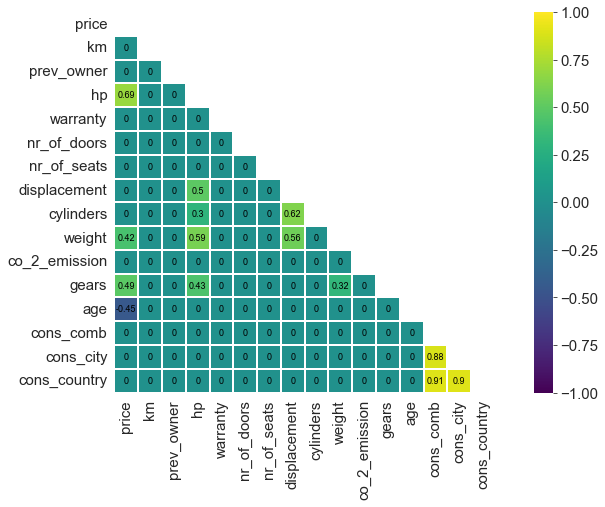

In [496]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix 
# (method = pearson: standard correlation coefficient)
corr_matrix = df_num.corr(method = 'pearson')

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

In [497]:
df.sample(20)

make_model  price               vat     km  prev_owner     hp  \
7033     Opel Astra  17980    VAT deductible  25.10        1.00 110.00   
1397        Audi A1  15990    VAT deductible  28.96        1.00  87.00   
7473     Opel Astra  14800    VAT deductible  30.05        1.00 100.00   
2505        Audi A1  22650    VAT deductible   3.00        1.00  70.00   
13851  Renault Clio   7500              None 100.00         NaN  66.00   
4226        Audi A3  18840    VAT deductible  77.29        1.00  81.00   
1172        Audi A1  15799    VAT deductible  14.56        1.00  60.00   
4756        Audi A3  21500    VAT deductible  26.80         NaN  85.00   
9603     Opel Corsa   9500              None  25.61        1.00  66.00   
13359  Renault Clio  11500    VAT deductible  32.71        1.00  66.00   
3869        Audi A3  20500              None  22.00        1.00  85.00   
3596        Audi A3  57400  Price negotiable  63.00         NaN 294.00   
738         Audi A1  26500    VAT deductible  20.00        1.00  85.00   
14286  Renault Clio   9999    VAT deductible  10.00        1.00  56.00   
823         Audi A1  13990  Price negotiable  73.00        2.00  92.00   
2467        Audi A1  22990              None  50.00        1.00  70.00   
4           Audi A1  16790              None  16.20        1.00  66.00   
14716  Renault Clio  11299    VAT deductible  10.00         NaN  56.00   
5512        Audi A3  23710    VAT deductible   1.00         NaN  85.00   
916         Audi A1  21460    VAT deductible  14.65        1.00  70.00   

                 type next_inspection inspection_new  warranty body_color  \
7033   Employee's car             NaT            NaN       NaN     Silver   
1397             Used             NaT            NaN     12.00        NaN   
7473   Employee's car             NaT            NaN     12.00      Black   
2505    Demonstration             NaT            Yes       NaN       Grey   
13851            Used             NaT            NaN       NaN       Grey   
4226             Used             NaT            NaN     12.00      Black   
1172    Demonstration         2021-01            NaN     36.00      Black   
4756             Used             NaT            NaN     24.00      White   
9603             Used             NaT            NaN       NaN       Grey   
13359            Used             NaT            NaN     12.00       Grey   
3869             Used             NaT            NaN       NaN       Blue   
3596             Used             NaT            NaN       NaN       Blue   
738              Used             NaT            NaN     24.00      White   
14286  Pre-registered             NaT            NaN       NaN      Black   
823              Used             NaT            NaN       NaN        Red   
2467   Pre-registered             NaT            NaN     60.00      White   
4                Used             NaT            Yes       NaN      Black   
14716  Pre-registered             NaT            NaN       NaN        Red   
5512              New             NaT            NaN       NaN        NaN   
916              Used             NaT            Yes       NaN       Grey   

      paint_type           body_color_original           body  nr_of_doors  \
7033    Metallic  Argon Silber/Ice Silver (M2)  Station wagon         4.00   
1397         NaN                     GRIS NANO         Sedans         5.00   
7473    Metallic      BLACK MEET K. (nero met)  Station wagon         5.00   
2505    Metallic                 manhattangrau        Compact         5.00   
13851        NaN                           NaN  Station wagon         5.00   
4226    Metallic        mythosschwarz metallic         Sedans         4.00   
1172         NaN               Brillantschwarz        Compact         5.00   
4756    Metallic                        Blanco         Sedans         5.00   
9603    Metallic                          Gris          Other         5.00   
13359        NaN                          grey  Station 

In [498]:
df.isna().sum()

make_model                 0
price                      0
vat                     4513
km                      1024
prev_owner              6828
hp                        88
type                       2
next_inspection        12384
inspection_new         11987
warranty               11066
body_color               597
paint_type              5772
body_color_original     3759
body                      60
nr_of_doors              212
nr_of_seats              977
gearing_type               0
displacement             496
cylinders               5680
weight                  6974
drive_chain             6858
fuel                       0
co_2_emission           2436
emission_class         13027
comfort_convenience      920
entertainment_media     1374
extras                  2962
safety_security          982
emission_label         11974
gears                   4712
country_version         8333
age                     1597
upholstery_type         4503
upholstery_color        5078
cons_comb     

In [499]:
def filling(col, group, method):
    if method == "median":
        df[col] = df.groupby(group)[col].apply(lambda x: x.fillna(x.median()))
    elif method == "mean":
        df[col] = df.groupby(group)[col].apply(lambda x: x.fillna(x.mean()))
    elif method == "mode":
        if df.groupby(group)[col].apply(lambda x: x.fillna(x.mode())).isna().sum() == 0:
            df[col] = df.groupby(group)[col].apply(lambda x: x.fillna(x.mode()))
        else:
            df[col] = df.groupby(group)[col].apply(lambda x: x.fillna(x.mode()[0] if any(x.mode()) else x))
    
    if df[col].isna().sum() != 0:
        df[col] = df[col].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col].isnull().sum())
    print("------------------")
    print(df[col].value_counts(dropna=False))

## vat

In [500]:
col_summary("vat")

Column Name :  vat
--------------------------------
Percentage of Nulls   :  % 28.35
Number of Nulls   :  4513
Number of Uniques :  2
Value Counts :
 VAT deductible      10980
None                 4513
Price negotiable      426
Name: vat, dtype: int64

Value_counts with sort index :
 Price negotiable      426
VAT deductible      10980
None                 4513
Name: vat, dtype: int64
########################################



In [501]:
df.vat.fillna("Unknown",inplace=True)

## type

In [502]:
col_summary("type")

Column Name :  type
--------------------------------
Percentage of Nulls   :  % 0.01
Number of Nulls   :  2
Number of Uniques :  5
Value Counts :
 Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

Value_counts with sort index :
 Demonstration       796
Employee's car     1011
New                1650
Pre-registered     1364
Used              11096
NaN                   2
Name: type, dtype: int64
########################################



In [503]:
df["type"] = df.type.fillna(df.type.mode()[0])

In [504]:
df.type.isna().sum()

0

## registration (age)

In [505]:
col_summary("age")

Column Name :  age
--------------------------------
Percentage of Nulls   :  % 10.03
Number of Nulls   :  1597
Number of Uniques :  4
Value Counts :
 1.00    4522
3.00    3674
2.00    3273
0.00    2853
NaN     1597
Name: age, dtype: int64

Value_counts with sort index :
 0.00    2853
1.00    4522
2.00    3273
3.00    3674
NaN     1597
Name: age, dtype: int64
########################################



<AxesSubplot:xlabel='age', ylabel='km'>

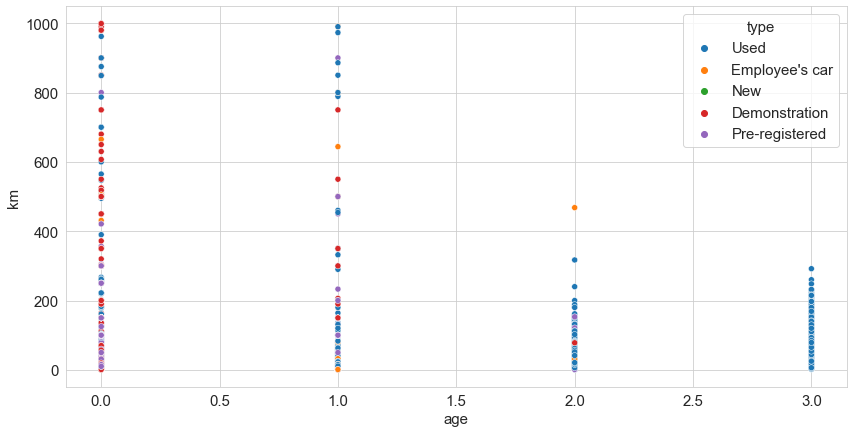

In [506]:
sns.scatterplot(x=df.age,y=df.km,hue=df.type)

In [507]:
filling("age","type","median")

Number of NaN :  0
------------------
1.00    4525
0.00    4411
3.00    3674
2.00    3309
Name: age, dtype: int64


## body

In [508]:
col_summary("body")

Column Name :  body
--------------------------------
Percentage of Nulls   :  % 0.38
Number of Nulls   :  60
Number of Uniques :  9
Value Counts :
 Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body, dtype: int64

Value_counts with sort index :
 Compact          3153
Convertible         8
Coupe              25
Off-Road           56
Other             290
Sedans           7903
Station wagon    3553
Transporter        88
Van               783
NaN                60
Name: body, dtype: int64
########################################



In [509]:
df.body.replace("Other",np.NaN,inplace=True)

In [510]:
filling("body",["make_model","type","fuel"],"mode")

Number of NaN :  0
------------------
Sedans           8032
Station wagon    3643
Compact          3250
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body, dtype: int64


## km

In [511]:
col_summary("km")

Column Name :  km
--------------------------------
Percentage of Nulls   :  % 6.43
Number of Nulls   :  1024
Number of Uniques :  6598
Value Counts :
 10.00     1092
NaN       1024
1.00       413
5.00       274
50.00      184
          ... 
131.29       1
117.71       1
92.74        1
98.76        1
1.51         1
Name: km, Length: 6599, dtype: int64

Value_counts with sort index :
 0.00        19
1.00       413
1.00         4
1.01         1
1.01         2
          ... 
990.00       2
991.00       1
995.00       1
999.00       3
NaN       1024
Name: km, Length: 6599, dtype: int64
########################################



In [512]:
df.groupby(["make_model","type","age"]).km.describe()

count   mean    std    min    25%    50%  \
make_model     type           age                                              
Audi A1        Demonstration  0.00 111.00  12.26  65.90   1.00   3.00   3.20   
                              1.00  18.00   9.86   5.35   1.05   5.20   9.26   
                              2.00   6.00  22.96  17.80  11.94  15.33  16.38   
               Employee's car 0.00  51.00  47.38 155.11   1.00   5.00   7.00   
                              1.00 132.00  12.15   7.55   1.00   6.24   9.98   
                              2.00   8.00  17.38   5.80   9.77  11.82  18.90   
                              3.00   5.00  48.10  30.33  26.79  27.00  27.00   
               New            0.00  99.00  14.82  34.10   0.00  10.00  10.00   
               Pre-registered 0.00 121.00  43.18 106.06   1.00   1.05  10.00   
                              1.00  14.00  57.37  35.53   1.18  22.00  80.00   
                              2.00   1.00  10.00    NaN  10.00  10.00  10.00   
               Used           0.00 185.00  58.71 119.69   1.00   5.00  10.00   
                              1.00 578.00  17.26  45.32   1.00   8.27  13.19   
                              2.00 421.00  27.55  25.29   1.48  14.52  21.20   
                              3.00 624.00  54.38  26.27   3.15  35.20  50.00   
Audi A2        Employee's car 1.00   1.00  26.17    NaN  26.17  26.17  26.17   
Audi A3        Demonstration  0.00  41.00  26.90 116.91   1.20   3.10   5.00   
                              1.00  16.00  12.80  10.92   1.01   4.56   9.85   
                              2.00   5.00  27.95   9.15  16.00  23.00  27.50   
               Employee's car 0.00  31.00  77.99 145.58   2.42   6.15  10.00   
                              1.00 157.00  18.53   7.81   1.00  12.10  19.44   
                              2.00  32.00  48.04  77.77   4.30  24.80  38.20   
                              3.00   8.00  56.95  26.80   7.79  40.70  58.48   
               New            0.00 211.00  11.62  17.16   0.00   5.00  10.00   
                              1.00   1.00   7.00    NaN   7.00   7.00   7.00   
               Pre-registered 0.00 242.00  31.73  60.38   1.00   5.00  10.00   
                              1.00  17.00  33.27  72.29   1.00  10.00  10.00   
               Used           0.00 146.00  41.58  79.20   1.00   5.00  11.50   
                              1.00 585.00  21.49  36.02   1.00  12.47  18.00   
                              2.00 638.00  44.62  27.72   3.28  25.78  36.75   
                              3.00 810.00  90.46  36.32  14.00  63.01  88.13   
Opel Astra     Demonstration  0.00 138.00  87.23 219.41   1.00   3.51   5.19   
                              1.00  16.00  26.43  53.52   1.00   2.50   8.66   
                              2.00   1.00  68.50    NaN  68.50  68.50  68.50   
               Employee's car 0.00  18.00  84.87 180.98   3.00   5.91   6.62   
                              1.00 121.00  38.70 112.48   2.66  21.66  26.19   
                              2.00  12.00  52.78  20.95  14.30  38.50  49.51   
                              3.00   1.00  95.00    NaN  95.00  95.00  95.00   
               New            0.00 119.00  12.09  45.94   0.00   1.00   5.00   
               Pre-registered 0.00 117.00  34.99 117.91   2.00   8.00  10.00   
                              1.00   3.00 317.17 505.33   1.50  25.75  50.00   
                              2.00   1.00   4.00    NaN   4.00   4.00   4.00   
               Used           0.00 149.00  34.27 117.86   1.00   3.00   6.00   
                              1.00 581.00  22.41  12.25   1.20  14.20  21.49   
                              2.00 575.00  50.12  31.27   1.30  25.20  44.40   
                              3.00 518.00  89.12  42.13  10.03  57.94  84.90   
Opel Corsa     Demonstration  0.00  66.00  89.06 214.84   1.00   3.00   6.00   
                              1.00  14.00  86.55 110.37   1.80  10.25  59.00   
               Employee's car 0.00  

In [513]:
filling("km",["make_model","type","age"],"median")

Number of NaN :  0
------------------
10.00     1859
5.00       417
1.00       413
50.00      186
100.00     170
          ... 
58.68        1
12.36        1
43.40        1
31.27        1
1.51         1
Name: km, Length: 6606, dtype: int64


## prev_owner

In [514]:
col_summary("prev_owner")

Column Name :  prev_owner
--------------------------------
Percentage of Nulls   :  % 42.89
Number of Nulls   :  6828
Number of Uniques :  4
Value Counts :
 1.00    8294
NaN     6828
2.00     778
3.00      17
4.00       2
Name: prev_owner, dtype: int64

Value_counts with sort index :
 1.00    8294
2.00     778
3.00      17
4.00       2
NaN     6828
Name: prev_owner, dtype: int64
########################################



<AxesSubplot:xlabel='prev_owner', ylabel='age'>

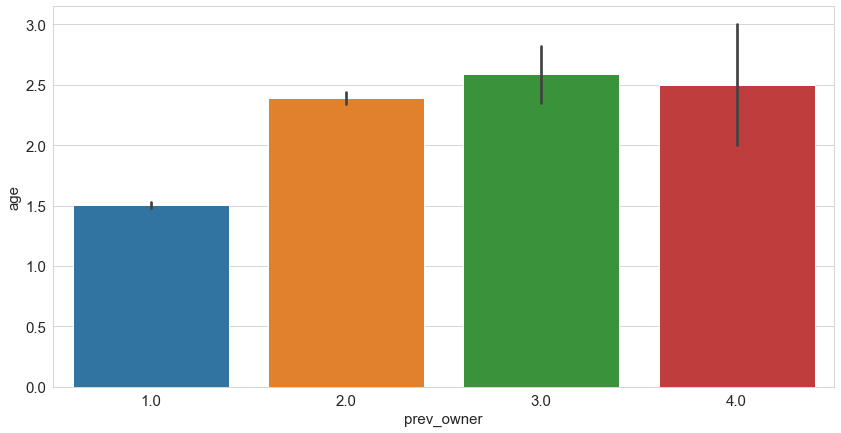

In [515]:
sns.barplot(y=df.age, x=df.prev_owner)

As there are only 2 values for 4 previous owner, it can be ignored. And there's a relation between age and number of previouns owner, so the null values in prev_owner column can be filled with this sight.

In [516]:
df.groupby("prev_owner").age.describe()

count  mean  std  min  25%  50%  75%  max
prev_owner                                             
1.00       8,294.00  1.50 1.06 0.00 1.00 1.00 2.00 3.00
2.00         778.00  2.39 0.71 0.00 2.00 3.00 3.00 3.00
3.00          17.00  2.59 0.51 2.00 2.00 3.00 3.00 3.00
4.00           2.00  2.50 0.71 2.00 2.25 2.50 2.75 3.00

In [517]:
filling("prev_owner","age","mode")

Number of NaN :  0
------------------
1.00    15122
2.00      778
3.00       17
4.00        2
Name: prev_owner, dtype: int64


## hp

In [518]:
col_summary("hp")

Column Name :  hp
--------------------------------
Percentage of Nulls   :  % 0.55
Number of Nulls   :  88
Number of Uniques :  80
Value Counts :
 85.00     2542
66.00     2122
81.00     1402
100.00    1308
110.00    1112
70.00      888
125.00     707
51.00      695
55.00      569
118.00     516
92.00      466
121.00     392
147.00     380
77.00      345
56.00      286
54.00      276
103.00     253
87.00      232
165.00     194
88.00      177
60.00      160
162.00      98
NaN         88
74.00       81
96.00       72
71.00       59
101.00      47
67.00       40
154.00      39
122.00      35
119.00      30
164.00      27
135.00      24
82.00       22
52.00       22
78.00       20
1.00        20
294.00      18
146.00      18
141.00      16
57.00       10
104.00       8
120.00       8
191.00       7
112.00       7
155.00       6
117.00       6
184.00       5
90.00        4
76.00        4
65.00        4
149.00       3
80.00        3
168.00       3
98.00        3
93.00        3
228.00       

We have seen that there is a correlation between hp and wight columns. So we may use weight column to fill null values in hp, BUT there are lots of null values in weight column. Therefore I prefer yo use gearing_type column instead.

In [519]:
df.groupby(["make_model","body","gearing_type","hp"])["price"].describe()

count      mean       std  \
make_model     body          gearing_type   hp                                  
Audi A1        Compact       Automatic      66.00   48.00 16,253.94  2,216.70   
                                            70.00  113.00 19,132.14  2,514.50   
                                            71.00   26.00 21,197.04  2,049.47   
                                            85.00  190.00 25,040.88  3,843.86   
                                            92.00   55.00 19,738.18  2,618.20   
                                            93.00    2.00 21,447.50    774.28   
                                            110.00  20.00 23,620.45  3,777.34   
                                            141.00   2.00 22,495.00    841.46   
                                            147.00   8.00 28,797.12    355.36   
                             Manual         60.00   58.00 15,189.83  1,663.61   
                                            66.00  114.00 15,037.90  1,686.72   
                                            70.00  218.00 17,386.54  3,528.61   
                                            71.00    6.00 19,248.00  3,365.98   
                                            85.00  141.00 19,307.78  3,125.12   
                                            86.00    1.00 14,295.00       NaN   
                                            92.00   35.00 15,343.29    976.48   
                             Semi-automatic 70.00    2.00 20,047.50  2,973.38   
                                            85.00    1.00 31,990.00       NaN   
               Coupe         Manual         70.00    1.00 13,950.00       NaN   
                                            85.00    1.00 15,900.00       NaN   
               Sedans        Automatic      60.00    1.00 20,500.00       NaN   
                                            66.00   70.00 17,970.60  2,527.38   
                                            67.00    6.00 17,674.83  2,006.02   
                                            70.00  139.00 19,066.79  2,340.68   
                                            71.00   20.00 20,119.70  1,482.08   
                                            85.00  348.00 23,000.76  4,574.41   
                                            92.00   67.00 19,515.63  2,460.22   
                                            93.00    1.00 17,900.00       NaN   
                                            110.00   9.00 22,591.33  4,188.63   
                                            112.00   1.00 18,399.00       NaN   
                                            141.00  13.00 21,326.77  2,678.22   
                                            147.00   4.00 28,937.00     65.90   
                             Manual         60.00   94.00 15,161.98  1,537.35   
                                            66.00  209.00 15,068.21  1,670.22   
                                            67.00    6.00 13,190.00    942.34   
                                            70.00  309.00 16,455.75  3,236.97   
                                            71.00    4.00 14,465.00     50.00   
                                            85.00  177.00 18,692.90  3,578.11   
                                            87.00    4.00 14,865.00    750.00   
                                            92.00   12.00 16,641.00  3,353.09   
                             Semi-automatic 66.00   17.00 17,997.06  1,990.95   
                                            70.00    6.00 17,730.00  2,015.09   
                                            85.00   28.00 22,413.46  6,450.33   
                                            140.00   1.00 23,490.00       NaN   
                                            141.00   1.00 20,000.00       NaN   
                                            147.00   1.00 37,900.00       NaN   
               Station wagon Automatic      66.00    1.00 19,640.00       NaN   
                                            70.00    1.00 20,940.00       NaN   
  

In [520]:
filling("hp",["make_model","body","gearing_type"],"median")

Number of NaN :  0
------------------
85.00     2543
66.00     2123
81.00     1402
100.00    1308
110.00    1113
70.00      890
125.00     708
51.00      695
55.00      589
118.00     549
92.00      466
121.00     393
147.00     380
77.00      345
56.00      294
54.00      276
103.00     261
87.00      241
165.00     194
88.00      177
60.00      160
162.00      98
74.00       81
96.00       73
71.00       59
101.00      47
67.00       41
154.00      39
122.00      35
119.00      30
164.00      27
135.00      24
52.00       22
82.00       22
1.00        20
78.00       20
146.00      18
294.00      18
141.00      16
57.00       10
104.00       8
120.00       8
112.00       7
191.00       7
155.00       6
117.00       6
184.00       5
90.00        4
76.00        4
65.00        4
149.00       3
80.00        3
93.00        3
168.00       3
98.00        3
127.00       2
53.00        2
167.00       2
143.00       2
86.00        2
140.00       2
40.00        2
63.00        2
150.00       2
22

## next_inspection & inspection_new

In [521]:
col_summary("next_inspection")

Column Name :  next_inspection
--------------------------------
Percentage of Nulls   :  % 77.79
Number of Nulls   :  12384
Number of Uniques :  77
Value Counts :
 NaT        12384
2021-06      471
2021-03      210
2021-05      180
2021-04      171
2021-02      168
2022-04      144
2022-05      143
2021-01      132
2022-03      121
2020-03      113
2022-02      112
2022-01      107
2020-02       74
2020-04       68
2021-07       68
2021-08       64
2020-01       63
2020-05       62
2020-11       58
2020-06       58
2019-04       50
2020-12       50
2019-05       50
2021-11       49
2020-07       48
2021-09       46
2019-07       43
2019-09       41
2019-06       40
2022-06       40
2020-10       38
2019-03       36
2020-08       35
2019-11       35
2019-08       32
2019-10       32
2019-02       31
2019-01       28
2020-09       27
2021-12       22
2023-01       20
2021-10       20
2019-12       20
2023-02       12
2018-10       10
2023-03       10
2022-07        9
2022-08        8
201

This column can show us only that there is a new inspection or not for inspection_new column.

In [522]:
df.loc[(df['inspection_new'].isna()) & (df.age<=1), "inspection_new"].size

6509

In [523]:
df.loc[(df['inspection_new'].isna()) & (df.age<=1), "inspection_new"] = "Yes"

In [524]:
df['inspection_new'] = df['inspection_new'].fillna('No')

In [525]:
df.drop("next_inspection",axis=1,inplace=True)

In [526]:
col_summary("inspection_new")

Column Name :  inspection_new
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  2
Value Counts :
 Yes    10441
No      5478
Name: inspection_new, dtype: int64

Value_counts with sort index :
 No      5478
Yes    10441
Name: inspection_new, dtype: int64
########################################



## warranty

In [527]:
col_summary("warranty")

Column Name :  warranty
--------------------------------
Percentage of Nulls   :  % 69.51
Number of Nulls   :  11066
Number of Uniques :  41
Value Counts :
 NaN      11066
12.00     2594
24.00     1118
60.00      401
36.00      279
48.00      149
6.00       125
72.00       59
3.00        33
23.00       11
18.00       10
20.00        7
25.00        6
2.00         5
50.00        4
26.00        4
16.00        4
4.00         3
1.00         3
19.00        3
34.00        3
13.00        3
28.00        2
22.00        2
14.00        2
11.00        2
46.00        2
21.00        2
9.00         2
17.00        2
45.00        2
33.00        1
40.00        1
65.00        1
10.00        1
15.00        1
7.00         1
8.00         1
56.00        1
49.00        1
47.00        1
30.00        1
Name: warranty, dtype: int64

Value_counts with sort index :
 1.00         3
2.00         5
3.00        33
4.00         3
6.00       125
7.00         1
8.00         1
9.00         2
10.00        1
11.00        2
1

There are a lot of null values and there is no insight to fill them, so should be dropped.

In [528]:
df.drop("warranty",axis=1,inplace=True)

## body_color

In [529]:
col_summary("body_color")

Column Name :  body_color
--------------------------------
Percentage of Nulls   :  % 3.75
Number of Nulls   :  597
Number of Uniques :  14
Value Counts :
 Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

Value_counts with sort index :
 Beige      108
Black     3745
Blue      1431
Bronze       6
Brown      289
Gold         2
Green      154
Grey      3505
Orange       3
Red        957
Silver    1647
Violet      18
White     3406
Yellow      51
NaN        597
Name: body_color, dtype: int64
########################################



In [530]:
filling("body_color",["make_model","type","age"],"mode")

Number of NaN :  0
------------------
Black     4080
Grey      3590
White     3562
Silver    1650
Blue      1449
Red        957
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64


## paint_type

In [531]:
col_summary("paint_type")

Column Name :  paint_type
--------------------------------
Percentage of Nulls   :  % 36.26
Number of Nulls   :  5772
Number of Uniques :  3
Value Counts :
 Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

Value_counts with sort index :
 Metallic       9794
Perl effect       6
Uni/basic       347
NaN            5772
Name: paint_type, dtype: int64
########################################



In [532]:
filling("paint_type",["make_model","body_color","type"],"mode")

Number of NaN :  0
------------------
Metallic       15450
Uni/basic        429
Perl effect       40
Name: paint_type, dtype: int64


## body_color_original

In [533]:
col_summary("body_color_original")

Column Name :  body_color_original
--------------------------------
Percentage of Nulls   :  % 23.61
Number of Nulls   :  3759
Number of Uniques :  1927
Value Counts :
 NaN                              3759
Onyx Schwarz                      338
Bianco                            282
Mythosschwarz Metallic            238
Brillantschwarz                   216
                                 ... 
Rouge-Braun (G0Y)                   1
VARI COLRI DISPONIBILI              1
Kokosnussbraun Metallic             1
Farbe frei wählbar                  1
Perlmutt-Weiß Metallic (Weiß)       1
Name: body_color_original, Length: 1928, dtype: int64

Value_counts with sort index :
 "PLATIN"                          1
"satinsilber "                    1
(0C0C) Monsungrau Metallic        1
(B4B4) Cortinaweiss               1
(NNP)                             1
                               ... 
wählbar - ggf. mit Aufpreis     118
wählbar -ggfl. mit Aufpreis       1
wählbar, ggf gegen Aufpreis       2
zw

In [534]:
df.drop("body_color_original",axis=1,inplace=True)

## nr_of_doors

In [535]:
col_summary("nr_of_doors")

Column Name :  nr_of_doors
--------------------------------
Percentage of Nulls   :  % 1.33
Number of Nulls   :  212
Number of Uniques :  6
Value Counts :
 5.00    11575
4.00     3079
3.00      832
2.00      219
NaN       212
1.00        1
7.00        1
Name: nr_of_doors, dtype: int64

Value_counts with sort index :
 1.00        1
2.00      219
3.00      832
4.00     3079
5.00    11575
7.00        1
NaN       212
Name: nr_of_doors, dtype: int64
########################################



In [536]:
df.nr_of_doors.replace([1,7],np.nan,inplace=True)

In [537]:
df.groupby(["make_model","body","fuel","hp"]).nr_of_doors.describe().T

make_model Audi A1                                                          \
body       Compact                                                           
fuel       Benzine                                                           
hp          60.00  70.00  71.00  85.00  92.00  93.00  110.00 141.00 147.00   
count        58.00 327.00  32.00 255.00  90.00   2.00  20.00   2.00   7.00   
mean          3.88   4.39   5.00   4.78   3.57   5.00   4.60   3.50   4.71   
std           1.23   0.92   0.00   0.41   1.34   0.00   0.68   2.12   0.49   
min           2.00   2.00   5.00   4.00   2.00   5.00   3.00   2.00   4.00   
25%           3.00   4.00   5.00   5.00   2.00   5.00   4.00   2.75   4.50   
50%           4.00   5.00   5.00   5.00   4.00   5.00   5.00   3.50   5.00   
75%           5.00   5.00   5.00   5.00   5.00   5.00   5.00   4.25   5.00   
max           5.00   5.00   5.00   5.00   5.00   5.00   5.00   5.00   5.00   

make_model                                                                   \
body                                     Coupe         Sedans                 
fuel       Diesel                      Benzine Diesel Benzine                 
hp         66.00  70.00  85.00  86.00   70.00  85.00   60.00  66.00  70.00    
count      161.00   1.00  69.00   1.00    1.00   1.00   95.00   1.00 449.00   
mean         4.53   5.00   4.46   5.00    2.00   5.00    4.25   5.00   4.47   
std          0.66    NaN   0.81    NaN     NaN    NaN    0.99    NaN   0.82   
min          2.00   5.00   2.00   5.00    2.00   5.00    2.00   5.00   2.00   
25%          4.00   5.00   4.00   5.00    2.00   5.00    3.00   5.00   4.00   
50%          5.00   5.00   5.00   5.00    2.00   5.00    5.00   5.00   5.00   
75%          5.00   5.00   5.00   5.00    2.00   5.00    5.00   5.00   5.00   
max          5.00   5.00   5.00   5.00    2.00   5.00    5.00   5.00   5.00   

make_model                                                                 \
body                                                                        
fuel                                                                        
hp         71.00  85.00  92.00  93.00  110.00 112.00 140.00 141.00 147.00   
count       24.00 322.00  77.00   1.00   9.00   1.00   1.00  14.00   5.00   
mean         4.92   4.76   4.38   3.00   4.78   3.00   5.00   4.43   4.60   
std          0.41   0.43   0.83    NaN   0.44    NaN    NaN   0.85   0.55   
min          3.00   4.00   2.00   3.00   4.00   3.00   5.00   3.00   4.00   
25%          5.00   5.00   4.00   3.00   5.00   3.00   5.00   4.00   4.00   
50%          5.00   5.00   5.00   3.00   5.00   3.00   5.00   5.00   5.00   
75%          5.00   5.00   5.00   3.00   5.00   3.00   5.00   5.00   5.00   
max          5.00   5.00   5.00   3.00   5.00   3.00   5.00   5.00   5.00   

make_model                                                                 \
body                                          Station wagon                 
fuel       Diesel                                   Benzine                 
hp         66.00  67.00  70.00  85.00  87.00         60.00  70.00  85.00    
count      293.00  12.00   1.00 229.00   4.00          3.00   3.00   2.00   
mean         4.48   4.83   5.00   4.70   5.00          4.67   5.00   5.00   
std          0.76   0.58    NaN   0.57   0.00          0.58   0.00   0.00   
min          2.00   3.00   5.00   3.00   5.00          4.00   5.00   5.00   
25%          4.00   5.00   5.00   5.00   5.00          4.50   5.00   5.00   
50%          5.00   5.00   5.00   5.00   5.00          5.00   5.00   5.00   
75%          5.00   5.00   5.00   5.00   5.00          5.00   5.00   5.00   
max          5.00   5.00   5.00   5.00   5.00          5.00   5.00   5.00   

make_model                                      Audi A2 Audi A3                \
body                                       Van Off-Road Compact                 
fuel                     Diesel        Benzine   Diesel Benzine                 
hp         92.00  110

In [538]:
filling("nr_of_doors",["make_model","body","fuel","hp"],"mode")

Number of NaN :  0
------------------
5.00    11776
4.00     3086
3.00      838
2.00      219
Name: nr_of_doors, dtype: int64


## nr_of_seats

In [539]:
col_summary("nr_of_seats")

Column Name :  nr_of_seats
--------------------------------
Percentage of Nulls   :  % 6.14
Number of Nulls   :  977
Number of Uniques :  6
Value Counts :
 5.00    13336
4.00     1125
NaN       977
7.00      362
2.00      116
6.00        2
3.00        1
Name: nr_of_seats, dtype: int64

Value_counts with sort index :
 2.00      116
3.00        1
4.00     1125
5.00    13336
6.00        2
7.00      362
NaN       977
Name: nr_of_seats, dtype: int64
########################################



In [540]:
df.nr_of_seats.replace([3,6],np.nan,inplace=True)

In [541]:
df.groupby(["make_model","body","fuel","hp"]).nr_of_seats.describe().T

make_model Audi A1                                                          \
body       Compact                                                           
fuel       Benzine                                                           
hp          60.00  70.00  71.00  85.00  92.00  93.00  110.00 141.00 147.00   
count        52.00 313.00  32.00 234.00  86.00   2.00  18.00   1.00   7.00   
mean          4.27   4.50   4.09   4.85   4.33   4.50   4.67   4.00   5.00   
std           0.45   0.50   0.30   0.36   0.47   0.71   0.49    NaN   0.00   
min           4.00   4.00   4.00   4.00   4.00   4.00   4.00   4.00   5.00   
25%           4.00   4.00   4.00   5.00   4.00   4.25   4.00   4.00   5.00   
50%           4.00   5.00   4.00   5.00   4.00   4.50   5.00   4.00   5.00   
75%           5.00   5.00   4.00   5.00   5.00   4.75   5.00   4.00   5.00   
max           5.00   5.00   5.00   5.00   5.00   5.00   5.00   4.00   5.00   

make_model                                                                   \
body                                     Coupe         Sedans                 
fuel       Diesel                      Benzine Diesel Benzine                 
hp         66.00  70.00  85.00  86.00   70.00  85.00   60.00  66.00  70.00    
count      159.00   0.00  67.00   1.00    1.00   1.00   92.00   1.00 422.00   
mean         4.61    NaN   4.33   5.00    4.00   5.00    4.34   5.00   4.53   
std          0.49    NaN   0.47    NaN     NaN    NaN    0.48    NaN   0.50   
min          4.00    NaN   4.00   5.00    4.00   5.00    4.00   5.00   4.00   
25%          4.00    NaN   4.00   5.00    4.00   5.00    4.00   5.00   4.00   
50%          5.00    NaN   4.00   5.00    4.00   5.00    4.00   5.00   5.00   
75%          5.00    NaN   5.00   5.00    4.00   5.00    5.00   5.00   5.00   
max          5.00    NaN   5.00   5.00    4.00   5.00    5.00   5.00   5.00   

make_model                                                                 \
body                                                                        
fuel                                                                        
hp         71.00  85.00  92.00  93.00  110.00 112.00 140.00 141.00 147.00   
count       21.00 308.00  73.00   1.00   9.00   1.00   1.00  14.00   5.00   
mean         4.24   4.83   4.48   4.00   4.89   4.00   5.00   4.57   4.80   
std          0.44   0.37   0.50    NaN   0.33    NaN    NaN   0.51   0.45   
min          4.00   4.00   4.00   4.00   4.00   4.00   5.00   4.00   4.00   
25%          4.00   5.00   4.00   4.00   5.00   4.00   5.00   4.00   5.00   
50%          4.00   5.00   4.00   4.00   5.00   4.00   5.00   5.00   5.00   
75%          4.00   5.00   5.00   4.00   5.00   4.00   5.00   5.00   5.00   
max          5.00   5.00   5.00   4.00   5.00   4.00   5.00   5.00   5.00   

make_model                                                                 \
body                                          Station wagon                 
fuel       Diesel                                   Benzine                 
hp         66.00  67.00  70.00  85.00  87.00         60.00  70.00  85.00    
count      286.00  11.00   1.00 229.00   3.00          3.00   3.00   2.00   
mean         4.49   4.00   5.00   4.52   4.00          4.00   5.00   5.00   
std          0.50   0.00    NaN   0.50   0.00          0.00   0.00   0.00   
min          4.00   4.00   5.00   4.00   4.00          4.00   5.00   5.00   
25%          4.00   4.00   5.00   4.00   4.00          4.00   5.00   5.00   
50%          4.00   4.00   5.00   5.00   4.00          4.00   5.00   5.00   
75%          5.00   4.00   5.00   5.00   4.00          4.00   5.00   5.00   
max          5.00   4.00   5.00   5.00   4.00          4.00   5.00   5.00   

make_model                                      Audi A2 Audi A3                \
body                                       Van Off-Road Compact                 
fuel                     Diesel        Benzine   Diesel Benzine                 
hp         92.00  110

In [542]:
filling("nr_of_seats",["make_model","body","fuel","hp"],"median")

Number of NaN :  0
------------------
5.00    14268
4.00     1164
7.00      363
2.00      120
6.00        3
3.50        1
Name: nr_of_seats, dtype: int64


In [543]:
df.loc[df.nr_of_seats.isin([6,3.5]),:]

make_model  price               vat    km  prev_owner     hp  type  \
8643       Opel Corsa   7500  Price negotiable 69.00        1.00  55.00  Used   
15392  Renault Espace  56950    VAT deductible 11.00        1.00 146.00   New   
15817  Renault Espace  54204    VAT deductible 11.00        1.00 146.00   New   
15869  Renault Espace  49100    VAT deductible 11.00        1.00 146.00   New   

      inspection_new body_color paint_type   body  nr_of_doors  nr_of_seats  \
8643              No      White   Metallic  Coupe         3.00         3.50   
15392            Yes      Black   Metallic    Van         5.00         6.00   
15817            Yes      White   Metallic    Van         5.00         6.00   
15869            Yes      White   Metallic    Van         5.00         6.00   

         gearing_type  displacement  cylinders   weight drive_chain    fuel  \
8643           Manual           NaN        NaN      NaN         NaN  Diesel   
15392  Semi-automatic      1,997.00       4.00 1,779.00         NaN  Diesel   
15817       Automatic      1,997.00       4.00 1,779.00         NaN  Diesel   
15869       Automatic      1,997.00       4.00 1,740.00         NaN  Diesel   

       co_2_emission emission_class  \
8643             NaN            NaN   
15392            NaN            NaN   
15817            NaN            NaN   
15869            NaN            NaN   

                                     comfort_convenience  \
8643   Multi-function steering wheel,Power windows,Ti...   
15392  Air conditioning,Armrest,Automatic climate con...   
15817  Air conditioning,Armrest,Automatic climate con...   
15869  Air conditioning,Armrest,Automatic climate con...   

                                     entertainment_media  \
8643   Bluetooth,Hands-free equipment,MP3,On-board co...   
15392                                Digital radio,Radio   
15817                                Digital radio,Radio   
15869                                Digital radio,Radio   

                           extras  \
8643    Alloy wheels,Touch screen   
15392  Alloy wheels,Voice Control   
15817  Alloy wheels,Voice Control   
15869  Alloy wheels,Voice Control   

                                         safety_security emission_label  \
8643   Electronic stability control,Isofix,Power stee...            NaN   
15392  ABS,Adaptive Cruise Control,Daytime running li...            NaN   
15817  ABS,Daytime running lights,Driver-side airbag,...            NaN   
15869  ABS,Daytime running lights,Driver-side airbag,...            NaN   

       gears country_version  age upholstery_type upholstery_color  cons_comb  \
8643     NaN             NaN 2.00             NaN              NaN        NaN   
15392   6.00     Netherlands 0.00    Part leather              NaN       5.40   
15817   3.00     Netherlands 0.00    Part leather              NaN       5.40   
15869   9.00     Netherlands 0.00    Part leather              NaN       5.30   

       cons_city  cons_country  
8643         NaN           NaN  
15392       6.30          4.90  
15817       6.30          4.90  
15869       6.20          4.70

In [544]:
df.nr_of_seats.replace([6,3.5],np.nan,inplace=True)


In [545]:
df.nr_of_seats = df.groupby(["make_model","body"]).nr_of_seats.apply(lambda x: x.fillna(x.mode()[0]))

In [546]:
df.nr_of_seats.value_counts(dropna=False)

5.00    14272
4.00     1164
7.00      363
2.00      120
Name: nr_of_seats, dtype: int64

## displacement

In [547]:
col_summary("displacement")

Column Name :  displacement
--------------------------------
Percentage of Nulls   :  % 3.12
Number of Nulls   :  496
Number of Uniques :  77
Value Counts :
 1,598.00     4761
999.00       2438
1,398.00     1314
1,399.00      749
1,229.00      677
1,956.00      670
1,461.00      595
1,490.00      559
NaN           496
1,422.00      467
1,197.00      353
898.00        351
1,395.00      320
1,968.00      301
1,149.00      288
1,618.00      212
1,798.00      210
1,498.00      196
1,600.00      130
1,248.00      110
1,997.00      103
1,364.00      102
1,400.00       90
998.00         72
1,500.00       50
2,000.00       46
1,000.00       40
1.00           36
1,998.00       25
2,480.00       20
1,200.00       18
1,984.00       18
1,397.00       11
899.00         11
160.00          6
929.00          5
1,499.00        5
997.00          4
1,596.00        4
139.00          4
900.00          4
1,599.00        3
1,199.00        3
1,396.00        3
1,495.00        2
1,589.00        2
1,300.00      

In [548]:
df.loc[df["displacement"].isin([1,2,54,15898,16000]), "displacement"] = np.nan


In [549]:
df.groupby(["make_model","body","age","displacement"]).price.describe()

count      mean       std  \
make_model     body          age  displacement                              
Audi A1        Compact       0.00 995.00         2.00 21,990.00  1,414.21   
                                  999.00       348.00 23,418.07  3,405.75   
                                  1,000.00       2.00 25,620.00  4,426.49   
                                  1,395.00       2.00 26,165.00  3,839.59   
                                  1,498.00      14.00 24,982.14  3,186.06   
                                  1,984.00       8.00 28,797.12    355.36   
                             1.00 929.00         3.00 17,120.00  1,524.20   
                                  999.00       157.00 18,712.38  2,582.26   
                                  1,000.00       3.00 18,833.33  3,521.84   
                                  1,395.00      21.00 21,892.29  1,164.04   
                                  1,422.00      61.00 16,849.64  1,545.06   
                                  1,598.00      16.00 20,336.25  2,676.76   
                                  1,600.00       1.00 16,800.00       NaN   
                                  1,798.00       2.00 22,495.00    841.46   
                             2.00 929.00         2.00 15,230.00    353.55   
                                  999.00        67.00 16,378.67  2,090.02   
                                  1,000.00       2.00 14,374.50  1,236.73   
                                  1,395.00      46.00 17,558.52  2,228.50   
                                  1,422.00      19.00 16,071.58  1,135.93   
                                  1,596.00       1.00 15,585.00       NaN   
                                  1,598.00      22.00 16,315.68  1,982.57   
                             3.00 999.00        94.00 14,307.82  1,994.65   
                                  1,395.00      29.00 16,152.03  1,925.19   
                                  1,422.00      78.00 14,095.47  1,428.63   
                                  1,598.00      30.00 14,744.00  1,936.16   
               Coupe         2.00 1,598.00       1.00 15,900.00       NaN   
                             3.00 999.00         1.00 13,950.00       NaN   
               Sedans        0.00 998.00         2.00 20,990.00      0.00   
                                  999.00       396.00 24,005.31  3,101.83   
                                  1,000.00       7.00 26,414.29  3,161.01   
                                  1,197.00       1.00 15,980.00       NaN   
                                  1,395.00       5.00 20,304.60  1,130.64   
                                  1,422.00       1.00 18,990.00       NaN   
                                  1,498.00       2.00 28,950.00     70.71   
                                  1,598.00       2.00 19,245.00  1,902.12   
                                  1,984.00       5.00 30,729.60  4,008.78   
                             1.00 999.00       207.00 18,350.45  2,888.03   
                                  1,395.00      23.00 21,417.70  1,279.19   
                                  1,422.00     131.00 17,286.15  1,832.06   
                                  1,598.00      92.00 18,861.46  1,889.55   
                                  1,798.00       8.00 22,829.75    892.30   
                             2.00 999.00       121.00 16,596.00  2,466.64   
                                  1,395.00      23.00 19,339.09  1,891.46   
                                  1,422.00      67.00 16,024.07  2,154.34   
                                  1,598.00      49.00 16,178.69  1,631.94   
                                  1,798.00       5.00 19,424.00  2,800.27   
                             3.00 999.00       155.00 13,867.21  1,621.05   
                                  1,395.00      34.00 16,877.38  1,704.57   
                                  1,422.00     103.00 14,076.20  1,801.03   
                                  1,596.00       1.00 17,700.00       NaN   
                                  1,598.00  

In [550]:
filling("displacement",["make_model","body","age"],"median")

Number of NaN :  0
------------------
1,598.00    5003
999.00      2447
1,398.00    1341
1,399.00     781
1,229.00     683
1,956.00     670
1,461.00     654
1,490.00     559
1,422.00     477
1,197.00     381
898.00       370
1,395.00     332
1,968.00     301
1,149.00     288
1,798.00     223
1,618.00     212
1,498.00     202
1,600.00     130
1,248.00     117
1,400.00     110
1,997.00     104
1,364.00     102
998.00        72
1,500.00      62
2,000.00      46
1,000.00      40
1,234.00      34
1,998.00      25
2,480.00      20
1,984.00      18
1,200.00      18
899.00        11
1,397.00      11
160.00         6
1,499.00       5
929.00         5
1,596.00       4
997.00         4
900.00         4
139.00         4
1,199.00       3
1,396.00       3
1,599.00       3
1,495.00       2
995.00         2
1,589.00       2
1,300.00       2
1,580.00       1
1,496.00       1
890.00         1
1,100.00       1
1,333.00       1
1,995.00       1
1,533.00       1
122.00         1
1,856.00       1
2,967.00  

## cylinders

In [551]:
col_summary("cylinders")

Column Name :  cylinders
--------------------------------
Percentage of Nulls   :  % 35.68
Number of Nulls   :  5680
Number of Uniques :  7
Value Counts :
 4.00    8105
NaN     5680
3.00    2104
5.00      22
6.00       3
8.00       2
2.00       2
1.00       1
Name: cylinders, dtype: int64

Value_counts with sort index :
 1.00       1
2.00       2
3.00    2104
4.00    8105
5.00      22
6.00       3
8.00       2
NaN     5680
Name: cylinders, dtype: int64
########################################



In [552]:
df.groupby(["make_model","body","hp","cylinders"]).price.describe().T

make_model   Audi A1                                                    \
body         Compact                                                     
hp            60.00               66.00               70.00              
cylinders       3.00      4.00      3.00      4.00      3.00      4.00   
count          34.00      1.00     65.00      2.00    192.00      2.00   
mean       15,652.94 11,880.00 15,451.15 18,880.00 18,237.79 13,600.00   
std         1,164.24       NaN  2,232.43  2,800.14  3,209.16    141.42   
min        12,470.00 11,880.00 10,900.00 16,900.00  9,950.00 13,500.00   
25%        15,392.50 11,880.00 13,750.00 17,890.00 15,737.50 13,550.00   
50%        15,954.50 11,880.00 15,850.00 18,880.00 17,800.00 13,600.00   
75%        16,370.00 11,880.00 16,680.00 19,870.00 21,411.25 13,650.00   
max        16,978.00 11,880.00 23,700.00 20,860.00 23,250.00 13,700.00   

make_model                                                              \
body                                                                     
hp                      71.00     85.00               92.00     93.00    
cylinders       8.00      3.00      3.00      4.00      4.00      4.00   
count           1.00     32.00    130.00     42.00     39.00      1.00   
mean       12,990.00 20,831.59 25,057.25 17,331.52 19,546.28 20,900.00   
std              NaN  2,410.84  3,191.97  3,145.61  3,284.16       NaN   
min        12,990.00 15,890.00 17,330.00 11,100.00 13,475.00 20,900.00   
25%        12,990.00 18,937.50 22,590.00 15,450.00 16,935.00 20,900.00   
50%        12,990.00 21,425.00 26,100.00 15,940.00 20,457.00 20,900.00   
75%        12,990.00 22,462.25 27,780.00 19,700.00 21,735.00 20,900.00   
max        12,990.00 25,256.00 28,980.00 23,500.00 28,880.00 20,900.00   

make_model                                                              \
body                                         Coupe    Sedans             
hp            110.00    141.00    147.00    70.00     60.00              
cylinders       4.00      4.00      4.00      3.00      3.00      4.00   
count          16.00      2.00      5.00      1.00     73.00      1.00   
mean       23,516.19 22,495.00 28,748.20 13,950.00 15,149.73 20,500.00   
std         3,543.59    841.46    378.33       NaN  1,558.11       NaN   
min        15,490.00 21,900.00 28,200.00 13,950.00 11,900.00 20,500.00   
25%        21,299.50 22,197.50 28,560.00 13,950.00 14,300.00 20,500.00   
50%        23,325.00 22,495.00 28,860.00 13,950.00 15,199.00 20,500.00   
75%        25,142.00 22,792.50 28,940.00 13,950.00 15,983.00 20,500.00   
max        28,980.00 23,090.00 29,181.00 13,950.00 22,390.00 20,500.00   

make_model                                                              \
body                                                                     
hp            66.00               70.00               71.00     85.00    
cylinders       3.00      4.00      3.00      4.00      3.00      3.00   
count         228.00      3.00    330.00      6.00      3.00    257.00   
mean       15,921.04 15,466.67 17,283.72 13,438.33 14,490.00 24,992.28   
std         2,373.66    450.92  3,115.42    848.51      0.00  2,817.00   
min        10,800.00 15,000.00  8,999.00 11,990.00 14,490.00 17,700.00   
25%        14,200.00 15,250.00 14,935.00 13,262.50 14,490.00 22,800.00   
50%        15,950.00 15,500.00 16,878.00 13,470.00 14,490.00 24,990.00   
75%        16,900.00 15,700.00 19,890.00 13,872.50 14,490.00 26,990.00   
max        23,500.00 15,900.00 25,900.00 14,500.00 14,490.00 35,900.00   

make_model                                                              \
body                                                                     
hp                      92.00     110.00    141.00    147.00    67.00    
cylinders       4.00      4.00      4.00      4.00      4.00      3.00   
count         183.00     62.00      8.00     10.00      3.00      3.00   
mean       17,301.57 18,707.81 21,790.25 20,415.80 31,962.67 13,890.00   


Since there are some other features which give same insight with less null values, this column can be dropped

In [553]:
df.drop("cylinders",axis=1,inplace=True)

## weight

In [554]:
col_summary("weight")

Column Name :  weight
--------------------------------
Percentage of Nulls   :  % 43.81
Number of Nulls   :  6974
Number of Uniques :  434
Value Counts :
 NaN         6974
1,163.00     574
1,360.00     356
1,165.00     301
1,335.00     242
1,135.00     213
1,199.00     205
1,734.00     170
1,180.00     168
1,503.00     165
1,350.00     155
1,355.00     135
1,260.00     127
1,275.00     112
1,278.00     110
1,487.00     109
1,425.00     109
1,255.00     108
1,200.00     107
1,522.00     103
1,273.00     103
1,280.00     102
1,403.00      91
1,120.00      90
1,659.00      89
1,195.00      89
1,701.00      87
1,250.00      84
1,441.00      82
1,308.00      80
1,285.00      80
1,613.00      75
1,110.00      75
1,279.00      72
1,364.00      70
1,345.00      67
1,733.00      65
1,325.00      64
1,141.00      64
1,685.00      64
1,071.00      64
1,230.00      63
1,845.00      56
1,090.00      54
1,052.00      53
1,154.00      52
1,664.00      52
1,513.00      51
1,065.00      50
1,237.00    

In [555]:
df.drop("weight",axis=1,inplace=True)

## drive_chain

In [556]:
col_summary("drive_chain")

Column Name :  drive_chain
--------------------------------
Percentage of Nulls   :  % 43.08
Number of Nulls   :  6858
Number of Uniques :  3
Value Counts :
 front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

Value_counts with sort index :
 4WD       171
front    8886
rear        4
NaN      6858
Name: drive_chain, dtype: int64
########################################



In [557]:
df.drop("drive_chain",axis=1,inplace=True)

## co_2_emission

In [558]:
col_summary("co_2_emission")

Column Name :  co_2_emission
--------------------------------
Percentage of Nulls   :  % 15.3
Number of Nulls   :  2436
Number of Uniques :  122
Value Counts :
 NaN          2436
120.00        740
99.00         545
97.00         537
104.00        501
102.00        477
103.00        445
114.00        382
124.00        372
107.00        362
108.00        362
119.00        361
106.00        349
128.00        329
126.00        282
85.00         275
118.00        270
110.00        266
127.00        257
117.00        254
111.00        237
113.00        235
109.00        234
139.00        224
140.00        218
129.00        213
105.00        202
135.00        202
92.00         198
130.00        180
123.00        178
150.00        174
112.00        171
143.00        171
95.00         161
116.00        157
141.00        156
98.00         151
133.00        145
136.00        145
137.00        133
125.00        132
134.00        130
145.00        126
149.00        117
153.00        113
147.00     

In [559]:
df.loc[df["co_2_emission"].isin([0,1,5,14,12.087,12.324,13.983,14.457]), "co_2_emission"] = np.nan

In [560]:
df.groupby(["make_model","body","fuel","co_2_emission"]).price.describe()

count      mean  \
make_model     body          fuel     co_2_emission                    
Audi A1        Compact       Benzine  97.00          77.00 15,115.64   
                                      98.00          23.00 17,077.57   
                                      100.00          3.00 15,903.33   
                                      102.00        106.00 17,401.34   
                                      103.00         30.00 21,233.03   
                                      104.00         92.00 18,070.52   
                                      105.00         12.00 22,462.33   
                                      106.00         27.00 22,056.26   
                                      107.00          7.00 16,771.43   
                                      108.00         41.00 24,063.61   
                                      109.00          5.00 20,951.80   
                                      110.00         51.00 26,340.37   
                                      111.00        138.00 23,765.28   
                                      112.00         25.00 19,960.36   
                                      113.00          5.00 20,388.00   
                                      114.00          1.00 15,490.00   
                                      115.00          7.00 24,067.86   
                                      116.00         20.00 23,580.95   
                                      117.00          8.00 19,094.88   
                                      118.00          2.00 13,615.00   
                                      119.00          1.00 12,550.00   
                                      120.00         27.00 15,850.00   
                                      121.00          2.00 18,710.00   
                                      122.00          1.00 20,881.00   
                                      123.00         17.00 19,308.65   
                                      126.00          1.00 19,999.00   
                                      127.00          2.00 19,888.00   
                                      134.00          2.00 22,495.00   
                                      136.00          2.00 29,088.00   
                                      137.00          2.00 28,660.00   
                                      142.00          2.00 28,750.00   
                                      331.00          1.00 12,990.00   
                             Diesel   90.00           1.00 12,880.00   
                                      91.00           5.00 13,038.00   
                                      92.00           1.00 12,479.00   
                                      94.00           5.00 13,960.00   
                                      97.00          36.00 16,163.89   
                                      98.00          10.00 15,417.00   
                                      99.00          19.00 16,043.95   
                                      100.00          1.00 16,800.00   
                                      102.00         41.00 15,771.90   
                                      104.00         34.00 15,627.94   
                                      105.00          2.00 20,870.00   
                                      106.00         17.00 16,417.53   
                                      107.00          6.00 16,243.33   
                                      108.00          3.00 18,950.00   
                                      109.00         29.00 16,353.03   
               Coupe         Benzine  97.00           1.00 13,950.00   
               Sedans        Benzine  97.00         207.00 14,790.68   
                                      98.00          41.00 15,892.49   
                                      99.00           4.00 15,360.00   
                                      102.00        121.00 18,467.82   
                                      103.00          6.00 19,598.33   
                                      104.00         64.00 18,068.61   
                     

In [561]:
filling("co_2_emission",["make_model","body","fuel"],"median")

Number of NaN :  0
------------------
120.00       1002
104.00        782
97.00         631
99.00         594
124.00        585
102.00        501
85.00         458
103.00        446
128.00        416
105.00        401
117.00        393
114.00        388
119.00        381
107.00        379
137.00        377
108.00        363
129.00        356
126.00        350
106.00        349
118.00        270
110.00        266
127.00        257
135.00        252
113.00        238
111.00        237
109.00        234
139.00        224
140.00        218
141.00        214
92.00         198
123.00        190
130.00        180
150.00        174
112.00        171
143.00        171
95.00         161
98.00         157
116.00        157
131.00        151
153.00        149
101.00        147
133.00        146
136.00        145
125.00        132
134.00        130
145.00        126
149.00        117
147.00        110
132.00        100
115.00         86
122.00         84
121.00         82
138.00         75
106.50  

## emission_class

In [562]:
col_summary("emission_class")

Column Name :  emission_class
--------------------------------
Percentage of Nulls   :  % 81.83
Number of Nulls   :  13027
Number of Uniques :  5
Value Counts :
 NaN             13027
Euro 6           2288
Euro 6d-TEMP      560
Euro 6c            29
Euro 5              8
Euro 6d             7
Name: emission_class, dtype: int64

Value_counts with sort index :
 Euro 5              8
Euro 6           2288
Euro 6c            29
Euro 6d             7
Euro 6d-TEMP      560
NaN             13027
Name: emission_class, dtype: int64
########################################



In [563]:
df.drop("emission_class",axis=1,inplace=True)

## comfort_convenience

In [564]:
col_summary("comfort_convenience")

Column Name :  comfort_convenience
--------------------------------
Percentage of Nulls   :  % 5.78
Number of Nulls   :  920
Number of Uniques :  6198
Value Counts :
 NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                      

In [565]:
filling("comfort_convenience",["make_model","body"],"mode")

Number of NaN :  0
------------------
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   388
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system                                                                                                                                       

## entertainment_media

In [566]:
col_summary("entertainment_media")

Column Name :  entertainment_media
--------------------------------
Percentage of Nulls   :  % 8.63
Number of Nulls   :  1374
Number of Uniques :  346
Value Counts :
 NaN                                                                                                               1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                                        1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                                     982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                                           783
On-board computer,Radio                                                                                            487
Radio                                                                                                              477
Bluetooth,CD player,Hands-free equipment,On-board computer,Radio,USB                                               465


In [567]:
filling("entertainment_media",["make_model","body"],"mode")

Number of NaN :  0
------------------
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                                        1741
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                                    1132
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                                          1012
On-board computer                                                                                                  611
Radio                                                                                                              559
Bluetooth,Hands-free equipment,On-board computer,Radio                                                             513
On-board computer,Radio                                                                                            487
Bluetooth,CD player,Hands-free equipment,On-board computer,Radio,USB                                               466
Bluetooth,

## extras

In [568]:
col_summary("extras")

Column Name :  extras
--------------------------------
Percentage of Nulls   :  % 18.61
Number of Nulls   :  2962
Number of Uniques :  659
Value Counts :
 Alloy wheels                                                                                                                                   3245
NaN                                                                                                                                            2962
Alloy wheels,Touch screen                                                                                                                       697
Alloy wheels,Voice Control                                                                                                                      577
Alloy wheels,Touch screen,Voice Control                                                                                                         541
Alloy wheels,Roof rack                                                                                   

Name: extras, dtype: int64
########################################



In [569]:
filling("extras",["make_model","body"],"mode")

Number of NaN :  0
------------------
Alloy wheels                                                                                                                                   5811
Alloy wheels,Touch screen                                                                                                                       698
Alloy wheels,Voice Control                                                                                                                      583
Roof rack                                                                                                                                       566
Alloy wheels,Touch screen,Voice Control                                                                                                         545
Alloy wheels,Roof rack                                                                                                                          529
Alloy wheels,Sport seats                                                  

## safety_security

In [570]:
col_summary("safety_security")

Column Name :  safety_security
--------------------------------
Percentage of Nulls   :  % 6.17
Number of Nulls   :  982
Number of Uniques :  4443
Value Counts :
 NaN                                                                                                                                                                                                                                                                                                                                                               982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger

In [571]:
filling("safety_security",["make_model","body"],"mode")

Number of NaN :  0
------------------
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      727
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                 480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction contro

## emission_label

In [572]:
col_summary("emission_label")

Column Name :  emission_label
--------------------------------
Percentage of Nulls   :  % 75.22
Number of Nulls   :  11974
Number of Uniques :  5
Value Counts :
 NaN               11974
4 (Green)          3553
1 (No sticker)      381
5 (Blue)              8
3 (Yellow)            2
2 (Red)               1
Name: emission_label, dtype: int64

Value_counts with sort index :
 1 (No sticker)      381
2 (Red)               1
3 (Yellow)            2
4 (Green)          3553
5 (Blue)              8
NaN               11974
Name: emission_label, dtype: int64
########################################



In [573]:
df.drop("emission_label",axis=1, inplace=True)

## gears

In [574]:
col_summary("gears")

Column Name :  gears
--------------------------------
Percentage of Nulls   :  % 29.6
Number of Nulls   :  4712
Number of Uniques :  10
Value Counts :
 6.00     5822
NaN      4712
5.00     3239
7.00     1908
8.00      224
9.00        6
1.00        2
3.00        2
4.00        2
2.00        1
50.00       1
Name: gears, dtype: int64

Value_counts with sort index :
 1.00        2
2.00        1
3.00        2
4.00        2
5.00     3239
6.00     5822
7.00     1908
8.00      224
9.00        6
50.00       1
NaN      4712
Name: gears, dtype: int64
########################################



As a domain knowledge, a car can only have gears between 5-8, so others should be converted to null value.

In [575]:
df.loc[df.gears.isin([1,2,3,4,9,50]),"gears"] = np.nan

In [576]:
filling("gears",["make_model","body","gearing_type","gears"],"mode")

Number of NaN :  0
------------------
6.00    8362
5.00    4419
7.00    2851
8.00     287
Name: gears, dtype: int64


## country_version

In [577]:
col_summary("country_version")

Column Name :  country_version
--------------------------------
Percentage of Nulls   :  % 52.35
Number of Nulls   :  8333
Number of Uniques :  23
Value Counts :
 NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: country_version, dtype: int64

Value_counts with sort index :
 Austria            208
Belgium            314
Bulgaria             2
Croatia              4
Czech Republic      52
Denmark             33
Egypt                1
European Union     507
France              38
Germany  

In [578]:
df.groupby(["make_model","body","type","country_version"]).price.describe()

count      mean  \
make_model     body          type           country_version                    
Audi A1        Compact       Demonstration  Germany          35.00 23,686.86   
                                            Italy             2.00 26,400.00   
                                            Netherlands       2.00 21,945.00   
                             Employee's car Germany          32.00 18,963.94   
                                            Italy             1.00 16,900.00   
                             New            Belgium           3.00 22,996.67   
                                            Denmark          14.00 22,501.43   
                                            European Union   46.00 20,009.13   
                                            Germany         130.00 25,329.82   
                                            Italy             1.00 21,100.00   
                                            Netherlands       3.00 23,766.00   
                                            Poland            2.00 19,630.00   
                             Pre-registered Austria           5.00 21,760.00   
                                            European Union    7.00 23,135.71   
                                            Germany           1.00 20,990.00   
                                            Romania           1.00 26,450.00   
                             Used           Belgium           2.00 15,870.00   
                                            Denmark           1.00 15,490.00   
                                            European Union    5.00 14,877.80   
                                            France            2.00 16,490.00   
                                            Germany         251.00 16,461.36   
                                            Italy             6.00 15,993.33   
                                            Netherlands      63.00 19,298.62   
                                            Spain             1.00 12,200.00   
               Sedans        Demonstration  Austria           2.00 20,990.00   
                                            Germany          25.00 23,001.20   
                                            Spain             1.00 15,900.00   
                             Employee's car Germany          51.00 20,087.45   
                                            Italy            24.00 19,302.92   
                                            Spain             3.00 21,163.33   
                             New            Belgium           7.00 21,655.71   
                                            European Union    8.00 20,131.25   
                                            Germany          16.00 23,164.50   
                                            Italy            20.00 24,039.50   
                                            Slovakia          1.00 17,600.00   
                                            Spain             4.00 19,113.50   
                             Pre-registered Austria           7.00 21,285.71   
                                            European Union    1.00 16,490.00   
                                            Italy            33.00 24,616.18   
                             Used           Austria           5.00 13,856.00   
                                            Belgium          36.00 16,014.97   
                                            France            3.00 20,630.00   
                                            Germany         222.00 16,190.28   
                                            Italy            69.00 16,776.28   
                                            Luxembourg        1.00 14,200.00   
                                            Spain            53.00 17,256.60   
                                            Switzerland       1.00 16,999.00   
               Station wagon Used           Germany           4.00 14,810.25   
                                            Spain            

In [579]:
df.drop("country_version",axis=1,inplace=True)

## upholstery_type

In [580]:
col_summary("upholstery_type")

Column Name :  upholstery_type
--------------------------------
Percentage of Nulls   :  % 28.29
Number of Nulls   :  4503
Number of Uniques :  6
Value Counts :
 Cloth           8423
NaN             4503
Part leather    1499
Full leather    1009
Other            368
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64

Value_counts with sort index :
 Cloth           8423
Full leather    1009
Other            368
Part leather    1499
Velour            60
alcantara         57
NaN             4503
Name: upholstery_type, dtype: int64
########################################



In [581]:
leather = ["Part leather", "Full leather"]
cloth = ["Cloth", "Velour", "alcantara"]

df.upholstery_type.replace(leather,"Part/Full Leather",inplace=True)
df.upholstery_type.replace(cloth,"Cloth",inplace=True)

In [582]:
df.upholstery_type.replace("Other",np.nan,inplace=True)

In [583]:
df.groupby(["make_model","body","age","upholstery_type"]).price.describe()

count      mean  \
make_model     body          age  upholstery_type                      
Audi A1        Compact       0.00 Cloth             327.00 23,818.85   
                                  Part/Full Leather   9.00 27,886.67   
                             1.00 Cloth             193.00 18,343.42   
                                  Part/Full Leather  22.00 21,827.18   
                             2.00 Cloth             122.00 16,803.58   
                                  Part/Full Leather   5.00 19,091.00   
                             3.00 Cloth             190.00 14,535.56   
                                  Part/Full Leather  18.00 15,517.94   
               Coupe         2.00 Part/Full Leather   1.00 15,900.00   
               Sedans        0.00 Cloth             244.00 23,837.58   
                                  Part/Full Leather  14.00 29,056.07   
                             1.00 Cloth             298.00 18,284.00   
                                  Part/Full Leather  17.00 20,806.94   
                             2.00 Cloth             123.00 16,438.95   
                                  Part/Full Leather  11.00 18,129.73   
                             3.00 Cloth             226.00 14,286.45   
                                  Part/Full Leather  43.00 15,376.63   
               Station wagon 0.00 Part/Full Leather   1.00 28,890.00   
                             1.00 Cloth               9.00 17,264.44   
                             2.00 Cloth               3.00 17,613.33   
                             3.00 Cloth               3.00 13,789.67   
                                  Part/Full Leather   1.00 16,422.00   
Audi A2        Off-Road      1.00 Cloth               1.00 28,200.00   
Audi A3        Compact       0.00 Cloth               6.00 21,975.83   
                                  Part/Full Leather  11.00 33,365.27   
                             1.00 Cloth               4.00 21,122.25   
                                  Part/Full Leather  10.00 22,475.90   
                             2.00 Cloth              12.00 18,463.75   
                                  Part/Full Leather   8.00 26,230.00   
                             3.00 Cloth              22.00 16,115.41   
                                  Part/Full Leather   5.00 19,916.00   
               Convertible   1.00 Part/Full Leather   2.00 33,496.50   
                             2.00 Cloth               2.00 25,900.00   
                                  Part/Full Leather   1.00 32,950.00   
               Coupe         2.00 Cloth               1.00 19,000.00   
                             3.00 Cloth               2.00 17,495.00   
               Sedans        0.00 Cloth             472.00 24,916.69   
                                  Part/Full Leather  48.00 25,133.06   
                             1.00 Cloth             354.00 21,804.62   
                                  Part/Full Leather 100.00 23,761.38   
                             2.00 Cloth             273.00 19,366.74   
                                  Part/Full Leather  88.00 20,471.82   
                             3.00 Cloth             301.00 16,095.73   
                                  Part/Full Leather  55.00 17,007.84   
               Station wagon 0.00 Cloth              84.00 24,116.96   
                                  Part/Full Leather  22.00 26,730.91   
                             1.00 Cloth              19.00 21,413.58   
                                  Part/Full Leather   4.00 22,670.00   
                             2.00 Cloth              44.00 18,866.30   
                                  Part/Full Leather   5.00 19,909.80   
                             3.00 Cloth              42.00 15,656.98   
                                  Part/Full Leather  10.00 16,160.00   
Opel Astra     Compact       0.00 Cloth              28.00 24,033.54   
                                  Part/Full Leather   6.00 34,493.83   
                     

In [584]:
df.upholstery_type = df.groupby(["make_model","body"]).upholstery_type.apply(
    lambda x: x.fillna(x.mode()[0] if any(x.mode()) else x)).fillna(method="ffill")

In [585]:
df.upholstery_type.isna().sum()

0

## upholstery_color

In [586]:
col_summary("upholstery_color")

Column Name :  upholstery_color
--------------------------------
Percentage of Nulls   :  % 31.9
Number of Nulls   :  5078
Number of Uniques :  10
Value Counts :
 Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: upholstery_color, dtype: int64

Value_counts with sort index :
 Beige       54
Black     8201
Blue        16
Brown      207
Grey      1376
Orange       1
Other      960
Red          9
White       13
Yellow       4
NaN       5078
Name: upholstery_color, dtype: int64
########################################



In [587]:
df.groupby(["make_model","body","body_color","upholstery_color"]).price.describe()

count      mean  \
make_model     body          body_color upholstery_color                    
Audi A1        Compact       Beige      Black              5.00 20,017.80   
                             Black      Black            224.00 18,097.43   
                                        Grey              49.00 17,147.31   
                                        Other             17.00 21,817.35   
                             Blue       Black             67.00 19,042.13   
                                        Blue               1.00 13,475.00   
                                        Grey               9.00 21,283.22   
                                        Other              9.00 20,563.67   
                             Brown      Black              8.00 17,379.75   
                             Green      Black             10.00 21,773.20   
                                        Other              6.00 26,809.33   
                             Grey       Black             89.00 20,295.53   
                                        Grey              14.00 22,297.64   
                                        Other              5.00 22,346.00   
                             Red        Black             64.00 18,740.36   
                                        Blue               1.00 17,900.00   
                                        Grey               6.00 24,183.33   
                                        Other              7.00 24,571.43   
                             Silver     Black             31.00 16,974.45   
                                        Grey               4.00 21,251.25   
                                        Other              4.00 21,590.00   
                             White      Black            213.00 18,824.66   
                                        Blue               1.00 15,920.00   
                                        Grey              23.00 22,388.61   
                                        Other             16.00 21,665.19   
                             Yellow     Black             12.00 27,228.33   
                                        Grey               2.00 28,730.00   
               Coupe         Black      Other              1.00 15,900.00   
               Sedans        Beige      Black              4.00 17,507.00   
                                        Grey               2.00 18,390.00   
                             Black      Black            234.00 17,100.84   
                                        Blue               1.00 16,680.00   
                                        Grey              21.00 17,257.10   
                                        Orange             1.00 21,400.00   
                                        Other             15.00 19,721.00   
                             Blue       Black             98.00 18,229.40   
                                        Blue               2.00 17,594.50   
                                        Grey              17.00 20,355.88   
                                        Other              4.00 20,160.00   
                             Brown      Black              5.00 15,376.00   
                                        Grey               1.00 12,990.00   
                                        Other              1.00 15,380.00   
                             Green      Black              7.00 22,088.57   
                                        Grey               2.00 21,500.00   
                             Grey       Black             91.00 19,566.32   
                                        Grey              17.00 19,127.94   
                                        Other              9.00 23,760.56   
                             Red        Black             82.00 18,466.05   
                                        Grey              20.00 20,433.35   
                                        Other              3.00 18,346.67   
                                        Red           

In [588]:
df.drop("upholstery_color",axis=1,inplace=True)

## cons_comb

In [589]:
col_summary("cons_comb")

Column Name :  cons_comb
--------------------------------
Percentage of Nulls   :  % 12.77
Number of Nulls   :  2033
Number of Uniques :  72
Value Counts :
 NaN      2033
5.40      770
3.90      733
4.00      713
5.10      657
4.40      623
5.60      618
4.70      602
3.80      585
4.80      546
5.00      545
4.50      523
5.20      454
4.20      435
4.60      426
4.90      393
5.50      380
5.30      380
3.70      369
5.90      369
4.10      342
5.70      342
6.00      331
4.30      307
3.30      307
3.50      288
6.20      216
3.60      194
6.30      181
6.10      175
5.80      164
6.60      148
6.80      136
3.40      106
6.40       75
3.00       69
7.40       66
6.50       43
6.70       43
7.10       38
10.00      34
6.90       27
3.20       25
8.30       20
7.60       14
7.00       10
3.10        7
7.20        6
7.80        6
8.00        5
51.00       4
8.60        4
7.90        3
8.70        3
1.60        3
7.30        2
8.10        2
40.00       2
38.00       2
0.00        2
9.1

In [590]:
cons_comb_2 = (df["cons_country"] + df["cons_city"]) / 2

In [591]:
df.cons_comb = df.cons_comb.fillna(cons_comb_2)

In [592]:
df.cons_comb.value_counts(dropna=False)

NaN      1925
5.40      770
3.90      733
4.00      713
5.10      657
4.40      623
5.60      618
4.70      607
3.80      585
4.80      546
5.00      545
4.50      524
5.20      454
4.20      435
4.60      426
4.90      393
5.50      380
5.30      380
3.70      369
5.90      369
4.10      342
5.70      342
6.00      331
3.30      307
4.30      307
3.50      288
6.20      216
3.60      194
6.30      181
6.10      175
5.80      165
6.60      148
6.80      136
3.40      125
6.40       75
3.00       69
7.40       66
6.70       43
6.50       43
7.10       38
3.60       37
10.00      34
6.90       27
3.20       25
8.30       20
3.65       20
5.15       19
7.60       14
7.00       10
3.10        7
7.80        6
7.20        6
8.00        5
8.60        4
51.00       4
1.60        3
7.90        3
8.70        3
3.95        3
40.00       2
7.30        2
0.00        2
8.10        2
38.00       2
5.45        2
11.00       1
9.10        1
7.50        1
43.00       1
4.55        1
55.00       1
54.00 

In [593]:
df.groupby(["make_model","body","fuel","cons_comb"],dropna= False).price.describe()

count      mean       std  \
make_model     body          fuel     cons_comb                              
Audi A1        Compact       Benzine  4.00       25.00 18,427.20  2,538.25   
                                      4.20       87.00 15,631.13  2,420.35   
                                      4.30       17.00 16,628.71  2,467.67   
                                      4.40      193.00 17,618.92  3,250.85   
                                      4.50       11.00 21,482.91  1,918.66   
                                      4.60       52.00 20,729.96  2,195.46   
                                      4.70       34.00 22,095.24  1,861.58   
                                      4.80       95.00 25,188.60  3,053.62   
                                      4.90      176.00 23,133.29  3,723.04   
                                      5.00        9.00 21,739.44  2,364.49   
                                      5.10       50.00 18,187.28  4,445.45   
                                      5.20       18.00 19,429.83  3,737.66   
                                      5.60        2.00 19,888.00      0.00   
                                      5.80        2.00 22,495.00    841.46   
                                      6.00        8.00 28,797.12    355.36   
                                      13.80       1.00 12,990.00       NaN   
                                      NaN        29.00 18,205.62  4,621.65   
                             Diesel   3.00        4.00 14,370.25  4,481.39   
                                      3.40        6.00 12,755.00    900.75   
                                      3.50        3.00 14,613.00  1,848.10   
                                      3.60        5.00 13,960.00  1,232.07   
                                      3.70       50.00 15,902.20  2,960.32   
                                      3.80       18.00 16,158.06  2,265.76   
                                      3.90       41.00 15,771.90  1,567.31   
                                      4.00       54.00 16,040.33  2,314.02   
                                      4.10       38.00 16,540.74  1,754.46   
                                      NaN        14.00 13,783.29  1,755.05   
               Coupe         Benzine  4.20        1.00 13,950.00       NaN   
                             Diesel   NaN         1.00 15,900.00       NaN   
               Sedans        Benzine  3.90        1.00 15,499.00       NaN   
                                      4.00        3.00 18,000.00  3,500.00   
                                      4.20      218.00 14,809.97  1,846.10   
                                      4.30       41.00 16,111.54  1,700.60   
                                      4.40      156.00 17,887.40  2,900.44   
                                      4.50        8.00 19,561.00  1,725.20   
                                      4.55        1.00 11,990.00       NaN   
                                      4.60       61.00 20,956.20  1,483.17   
                                      4.70        8.00 20,377.75  2,541.11   
                                      4.80      255.00 25,237.13  2,751.08   
                                      4.90       84.00 21,241.69  3,559.58   
                                      5.00        7.00 23,258.57  5,778.47   
                                      5.10       27.00 16,992.07  2,964.09   
                                      5.20        5.00 20,150.20  2,021.63   
                                      5.30        5.00 20,304.60  1,130.64   
                                      5.60       11.00 21,114.36  2,467.25   
                                      5.80        2.00 20,490.00  4,242.64   
                                      5.90        1.00 21,420.00       NaN   
                                      6.00        5.00 30,729.60  4,008.78   
                                      43.00       1.00 13,719.00       NaN   
                                      51.00       4.00 21,260.00    193

In [594]:
df.groupby(["fuel","make_model","body","cons_comb"],dropna= False).price.describe().loc["Electric"]

count      mean      std       min       25%  \
make_model   body    cons_comb                                                 
Audi A3      Compact NaN         1.00 24,950.00      NaN 24,950.00 24,950.00   
             Sedans  1.60        3.00 37,449.67 1,361.64 35,899.00 36,949.50   
Renault Clio Sedans  NaN         1.00  8,490.00      NaN  8,490.00  8,490.00   

                                     50%       75%       max  
make_model   body    cons_comb                                
Audi A3      Compact NaN       24,950.00 24,950.00 24,950.00  
             Sedans  1.60      38,000.00 38,225.00 38,450.00  
Renault Clio Sedans  NaN        8,490.00  8,490.00  8,490.00

In [595]:
df.loc[df.fuel == "Electric","cons_comb"]

3356     NaN
3612    1.60
3615    1.60
3617    1.60
13397    NaN
Name: cons_comb, dtype: float64

In [596]:
df.cons_comb.replace([0.0, 1.0, 1.2, 10, 11, 13.8, 32.0, 33.0, 38.0, 40.0, 43.0, 46.0, 50.0, 51.0, 54.0, 55.0,"-"],np.nan,inplace=True)

In [597]:
df.loc[df.fuel == "Electric", "cons_comb"].fillna(df.loc[df.fuel == "Electric", "cons_comb"].mode()[0],inplace=True)

In [598]:
filling("cons_comb",["make_model","body","fuel"],"median")

Number of NaN :  0
------------------
5.40    997
4.00    905
3.90    847
4.70    784
5.60    774
5.10    769
3.80    679
5.20    666
4.40    623
5.00    585
4.80    547
4.60    539
4.50    524
4.90    495
3.30    448
3.70    442
4.20    435
5.90    396
5.30    393
5.50    380
5.70    342
4.10    342
6.00    331
4.30    308
3.50    288
6.20    260
3.60    195
6.10    182
6.30    181
5.80    165
6.80    156
6.60    148
3.40    130
5.35    101
6.40     75
3.00     69
7.40     66
6.50     43
6.70     43
7.10     38
3.60     37
6.90     27
3.20     25
3.65     20
8.30     20
5.15     19
7.60     14
7.00     10
5.85      7
3.10      7
7.20      6
7.80      6
8.00      5
8.60      4
8.70      3
1.60      3
3.95      3
7.90      3
7.30      2
8.10      2
5.45      2
9.10      1
4.55      1
7.50      1
Name: cons_comb, dtype: int64


## cons_country

In [599]:
df.drop("cons_country",axis=1,inplace=True)

## cons_city

In [600]:
df.drop("cons_city",axis=1,inplace=True)

In [601]:
df.shape

(15919, 25)

In [602]:
df.isna().sum()

make_model             0
price                  0
vat                    0
km                     0
prev_owner             0
hp                     0
type                   0
inspection_new         0
body_color             0
paint_type             0
body                   0
nr_of_doors            0
nr_of_seats            0
gearing_type           0
displacement           0
fuel                   0
co_2_emission          0
comfort_convenience    0
entertainment_media    0
extras                 0
safety_security        0
gears                  0
age                    0
upholstery_type        0
cons_comb              0
dtype: int64

In [603]:
df.to_csv("cleaned_scout.csv",index=False)

# PART- 3 `( Handling With Outliers )`

In [604]:
df = pd.read_csv("cleaned_scout.csv")

In [605]:
df.head()

make_model  price               vat    km  prev_owner     hp  type  \
0    Audi A1  15770    VAT deductible 56.01        2.00  66.00  Used   
1    Audi A1  14500  Price negotiable 80.00        1.00 141.00  Used   
2    Audi A1  14640    VAT deductible 83.45        1.00  85.00  Used   
3    Audi A1  14500           Unknown 73.00        1.00  66.00  Used   
4    Audi A1  16790           Unknown 16.20        1.00  66.00  Used   

  inspection_new body_color paint_type    body  nr_of_doors  nr_of_seats  \
0            Yes      Black   Metallic  Sedans         5.00         5.00   
1             No        Red   Metallic  Sedans         3.00         4.00   
2             No      Black   Metallic  Sedans         4.00         4.00   
3             No      Brown   Metallic  Sedans         3.00         4.00   
4            Yes      Black   Metallic  Sedans         5.00         5.00   

  gearing_type  displacement     fuel  co_2_emission  \
0    Automatic      1,422.00   Diesel          99.00   
1    Automatic      1,798.00  Benzine         129.00   
2    Automatic      1,598.00   Diesel          99.00   
3    Automatic      1,422.00   Diesel          99.00   
4    Automatic      1,422.00   Diesel         109.00   

                                 comfort_convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                                 entertainment_media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     safety_security  gears  age  \
0  ABS,Central door lock,Daytime running lights,D...   7.00 3.00   
1  ABS,Central door lock,Central door lock with r...   7.00 2.00   
2  ABS,Central door lock,Daytime running lights,D...   7.00 3.00   
3  ABS,Alarm system,Central door lock with remote...   6.00 3.00   
4  ABS,Central door lock,Driver-side airbag,Elect...   6.00 3.00   

  upholstery_type  cons_comb  
0           Cloth       3.80  
1           Cloth       5.60  
2           Cloth       3.80  
3           Cloth       3.80  
4           Cloth       4.10

In [606]:
df.shape

(15919, 25)

## km

In [607]:
col_summary("km")

Column Name :  km
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  6606
Value Counts :
 10.00     1859
5.00       417
1.00       413
50.00      186
100.00     170
          ... 
58.68        1
12.36        1
43.40        1
31.27        1
1.51         1
Name: km, Length: 6606, dtype: int64

Value_counts with sort index :
 0.00       19
1.00      413
1.00        4
1.01        1
1.01        2
         ... 
980.00      1
990.00      2
991.00      1
995.00      1
999.00      3
Name: km, Length: 6606, dtype: int64
########################################



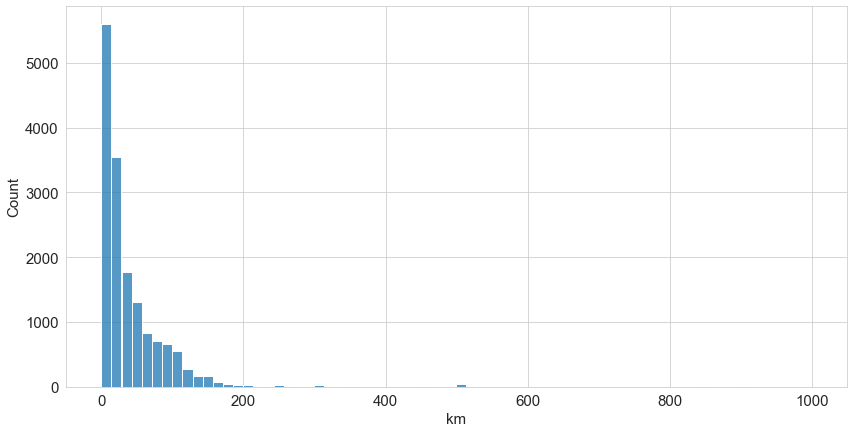

In [608]:
sns.histplot(df.km, bins=70);

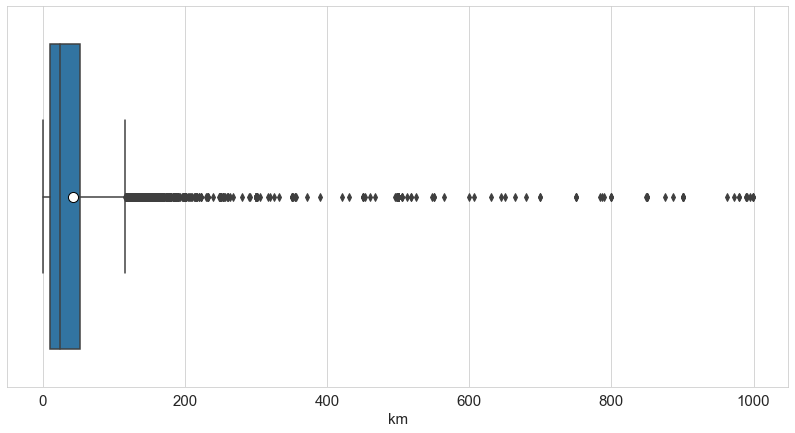

In [609]:
sns.boxplot(df.km);

km column has wide range values, but we can not consider them as outliers. I'll keep the extreme values as they are.

## hp

In [610]:
col_summary("hp")

Column Name :  hp
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  81
Value Counts :
 85.00     2543
66.00     2123
81.00     1402
100.00    1308
110.00    1113
70.00      890
125.00     708
51.00      695
55.00      589
118.00     549
92.00      466
121.00     393
147.00     380
77.00      345
56.00      294
54.00      276
103.00     261
87.00      241
165.00     194
88.00      177
60.00      160
162.00      98
74.00       81
96.00       73
71.00       59
101.00      47
67.00       41
154.00      39
122.00      35
119.00      30
164.00      27
135.00      24
52.00       22
82.00       22
1.00        20
78.00       20
146.00      18
294.00      18
141.00      16
57.00       10
104.00       8
120.00       8
112.00       7
191.00       7
155.00       6
117.00       6
184.00       5
90.00        4
76.00        4
65.00        4
149.00       3
80.00        3
93.00        3
168.00       3
98.00        3
127.00       2
53.00        2


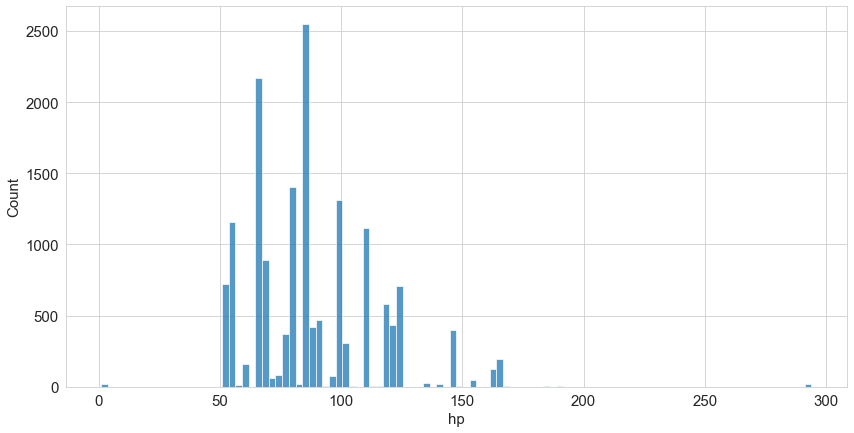

In [611]:
sns.histplot(df.hp);

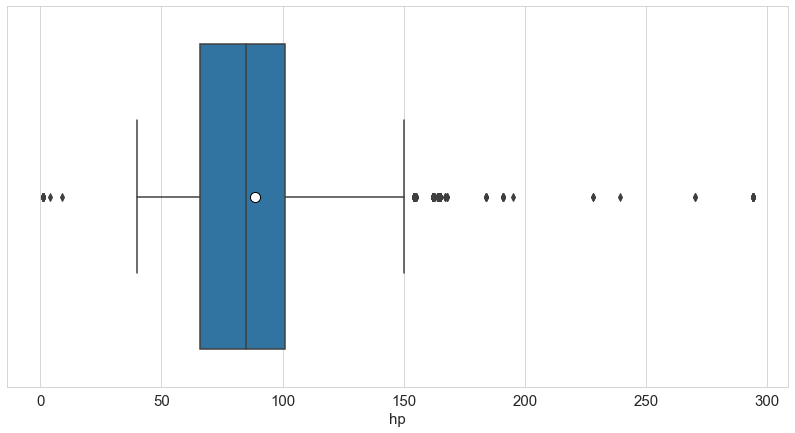

In [612]:
sns.boxplot(df.hp);

Although right-side of the whisk shows the extreme points, a car might have such that horsepower. But for the values less than 50 are not proper for modern cars, as you guess, so I will just mend these values.

In [613]:
np.sort(df.hp.unique())

array([  1. ,   4. ,   9. ,  40. ,  44. ,  51. ,  52. ,  53. ,  54. ,
        55. ,  56. ,  57. ,  60. ,  63. ,  65. ,  66. ,  67. ,  70. ,
        71. ,  74. ,  75. ,  76. ,  77. ,  78. ,  80. ,  81. ,  82. ,
        84. ,  85. ,  86. ,  87. ,  88. ,  89. ,  90. ,  92. ,  93. ,
        96. ,  98. , 100. , 100.5, 101. , 103. , 104. , 110. , 112. ,
       115. , 117. , 118. , 119. , 120. , 121. , 122. , 123. , 125. ,
       127. , 132. , 133. , 135. , 137. , 140. , 141. , 143. , 146. ,
       147. , 149. , 150. , 154. , 155. , 162. , 163. , 164. , 165. ,
       167. , 168. , 184. , 191. , 195. , 228. , 239. , 270. , 294. ])

In [614]:
df.hp.loc[df.hp < 50] = np.nan

In [615]:
df.hp.isna().sum()

25

In [616]:
filling("hp",["make_model","body","gearing_type"],"median")

Number of NaN :  0
------------------
85.00     2544
66.00     2124
81.00     1407
100.00    1310
110.00    1113
70.00      890
125.00     712
51.00      702
55.00      592
118.00     551
92.00      466
121.00     393
147.00     380
77.00      345
56.00      294
54.00      276
103.00     261
87.00      241
165.00     194
88.00      177
60.00      160
162.00      98
74.00       81
96.00       73
71.00       59
101.00      47
67.00       41
154.00      39
122.00      35
119.00      30
164.00      27
135.00      24
52.00       22
82.00       22
78.00       20
294.00      18
146.00      18
141.00      16
57.00       10
104.00       8
120.00       8
191.00       7
112.00       7
155.00       6
117.00       6
184.00       5
76.00        4
90.00        4
65.00        4
98.00        3
149.00       3
80.00        3
93.00        3
168.00       3
53.00        2
167.00       2
127.00       2
270.00       2
89.00        2
143.00       2
86.00        2
140.00       2
63.00        2
150.00       2
22

<AxesSubplot:xlabel='hp', ylabel='Count'>

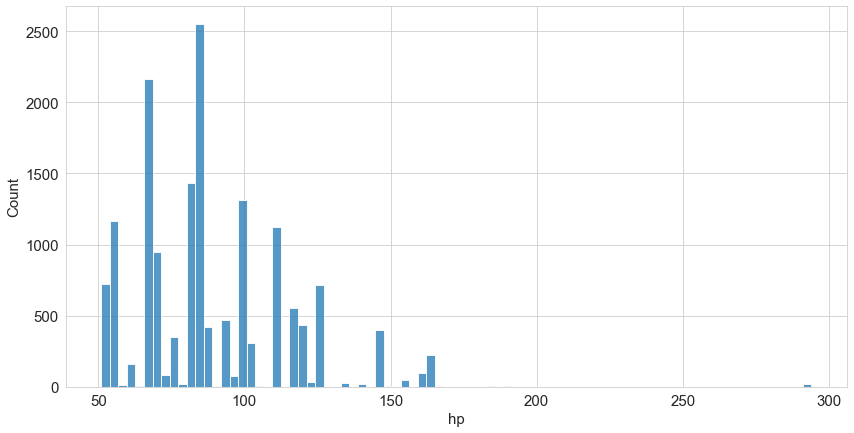

In [617]:
sns.histplot(df.hp)

## nr_of_doors

In [618]:
col_summary("nr_of_doors")

Column Name :  nr_of_doors
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  4
Value Counts :
 5.00    11776
4.00     3086
3.00      838
2.00      219
Name: nr_of_doors, dtype: int64

Value_counts with sort index :
 2.00      219
3.00      838
4.00     3086
5.00    11776
Name: nr_of_doors, dtype: int64
########################################



''

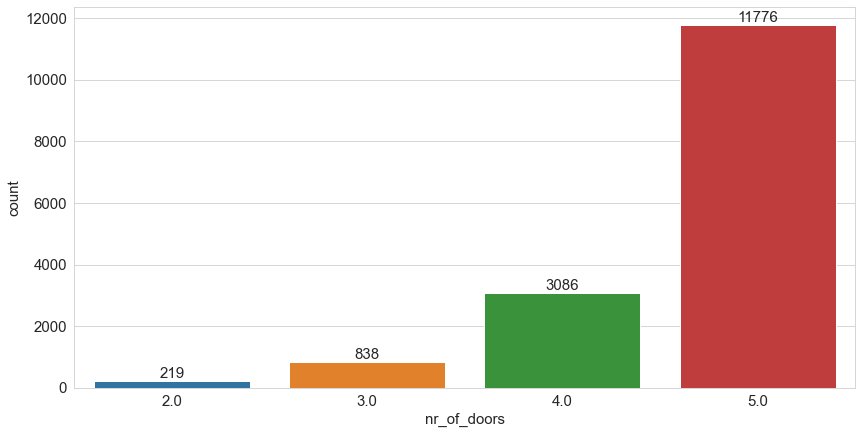

In [619]:
fig, ax = plt.subplots()

ax = sns.countplot(df.nr_of_doors)

for container in ax.containers:
    ax.bar_label(container)
;

There is no outlier. Everything seems normal.

## nr_of_seats

In [620]:
col_summary("nr_of_seats")

Column Name :  nr_of_seats
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  4
Value Counts :
 5.00    14272
4.00     1164
7.00      363
2.00      120
Name: nr_of_seats, dtype: int64

Value_counts with sort index :
 2.00      120
4.00     1164
5.00    14272
7.00      363
Name: nr_of_seats, dtype: int64
########################################



''

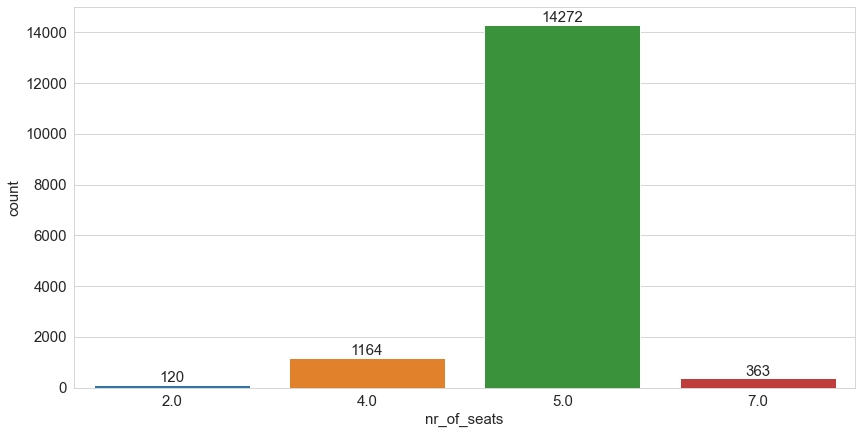

In [621]:
fig, ax = plt.subplots()

ax = sns.countplot(df.nr_of_seats)

for container in ax.containers:
    ax.bar_label(container)
;

In [622]:
df.nr_of_seats.value_counts(normalize=True)

5.00   0.90
4.00   0.07
7.00   0.02
2.00   0.01
Name: nr_of_seats, dtype: float64

Since one value is dominates the column this column may be dropped. But for me, 90% is not enough to say that this column has not any insight for my data, so I will keep it.

## displacement

In [623]:
col_summary("displacement")

Column Name :  displacement
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  73
Value Counts :
 1,598.00    5003
999.00      2447
1,398.00    1341
1,399.00     781
1,229.00     683
1,956.00     670
1,461.00     654
1,490.00     559
1,422.00     477
1,197.00     381
898.00       370
1,395.00     332
1,968.00     301
1,149.00     288
1,798.00     223
1,618.00     212
1,498.00     202
1,600.00     130
1,248.00     117
1,400.00     110
1,997.00     104
1,364.00     102
998.00        72
1,500.00      62
2,000.00      46
1,000.00      40
1,234.00      34
1,998.00      25
2,480.00      20
1,984.00      18
1,200.00      18
899.00        11
1,397.00      11
160.00         6
1,499.00       5
929.00         5
1,596.00       4
997.00         4
900.00         4
139.00         4
1,199.00       3
1,396.00       3
1,599.00       3
1,495.00       2
995.00         2
1,589.00       2
1,300.00       2
1,580.00       1
1,496.00       1
890.00      

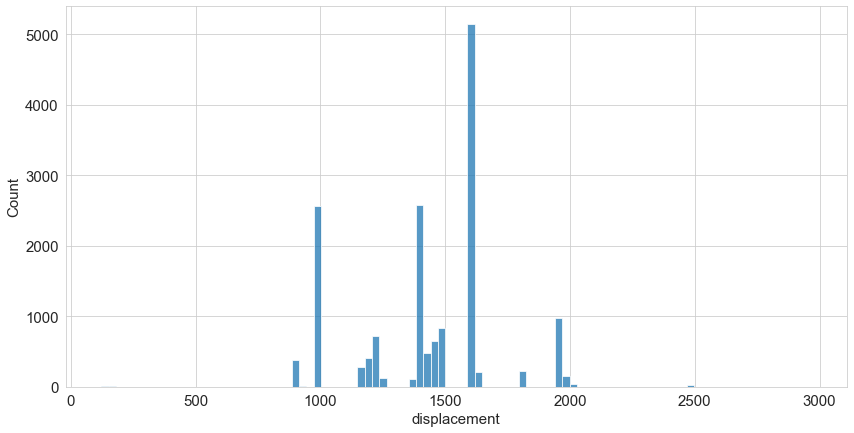

In [624]:
sns.histplot(df.displacement);

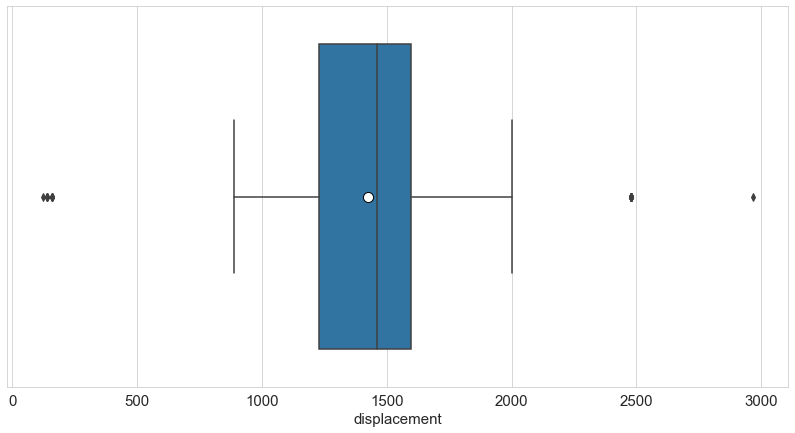

In [625]:
sns.boxplot(df.displacement);

Everything is normal...

## co_2_emission

In [626]:
col_summary("co_2_emission")

Column Name :  co_2_emission
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  121
Value Counts :
 120.00       1002
104.00        782
97.00         631
99.00         594
124.00        585
102.00        501
85.00         458
103.00        446
128.00        416
105.00        401
117.00        393
114.00        388
119.00        381
107.00        379
137.00        377
108.00        363
129.00        356
126.00        350
106.00        349
118.00        270
110.00        266
127.00        257
135.00        252
113.00        238
111.00        237
109.00        234
139.00        224
140.00        218
141.00        214
92.00         198
123.00        190
130.00        180
150.00        174
112.00        171
143.00        171
95.00         161
98.00         157
116.00        157
131.00        151
153.00        149
101.00        147
133.00        146
136.00        145
125.00        132
134.00        130
145.00        126
149.00        1

<AxesSubplot:xlabel='co_2_emission', ylabel='Count'>

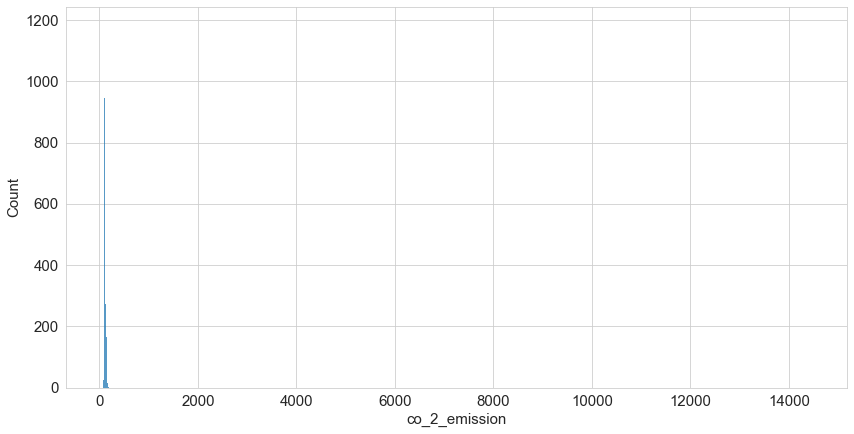

In [627]:
sns.histplot(df.co_2_emission)

In [628]:
df.loc[df.co_2_emission > 332, "co_2_emission"] = np.nan

In [629]:
filling("co_2_emission",["make_model","body"],"median")

Number of NaN :  0
------------------
120.00    1002
104.00     782
97.00      631
99.00      594
124.00     585
102.00     501
85.00      458
103.00     446
128.00     416
105.00     401
117.00     393
114.00     388
119.00     384
107.00     379
137.00     377
108.00     363
129.00     357
106.00     351
126.00     350
118.00     270
110.00     266
127.00     257
135.00     252
113.00     238
111.00     237
109.00     234
139.00     224
140.00     218
141.00     214
92.00      198
123.00     190
130.00     180
150.00     174
143.00     171
112.00     171
95.00      161
98.00      157
116.00     157
131.00     152
153.00     149
101.00     147
133.00     146
136.00     145
125.00     132
134.00     130
145.00     126
149.00     117
147.00     110
132.00     100
115.00      86
122.00      84
121.00      82
138.00      76
106.50      69
93.00       66
142.00      58
168.00      58
100.00      55
148.00      48
94.00       42
154.00      40
144.00      40
146.00      36
90.00       35
15

<AxesSubplot:xlabel='co_2_emission', ylabel='Count'>

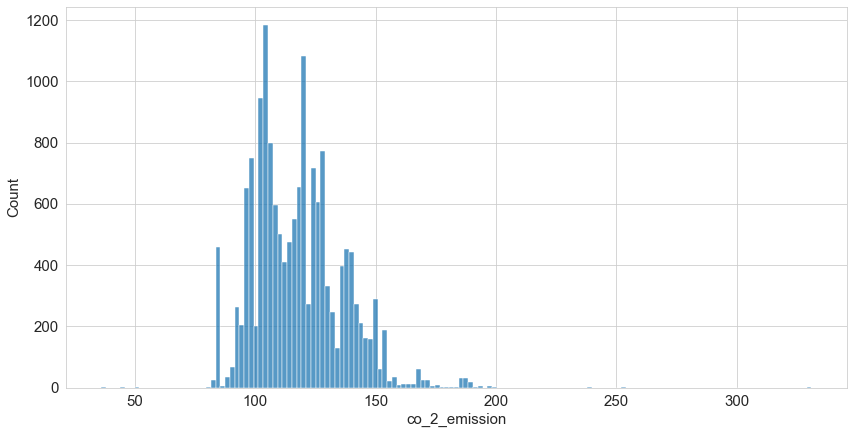

In [630]:
sns.histplot(df.co_2_emission)

<AxesSubplot:xlabel='co_2_emission'>

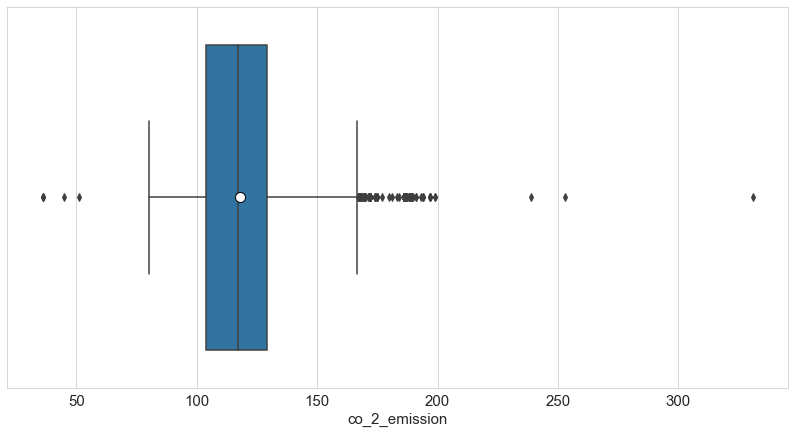

In [631]:
sns.boxplot(df.co_2_emission)

## gears

In [632]:
col_summary("gears")

Column Name :  gears
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  4
Value Counts :
 6.00    8362
5.00    4419
7.00    2851
8.00     287
Name: gears, dtype: int64

Value_counts with sort index :
 5.00    4419
6.00    8362
7.00    2851
8.00     287
Name: gears, dtype: int64
########################################



''

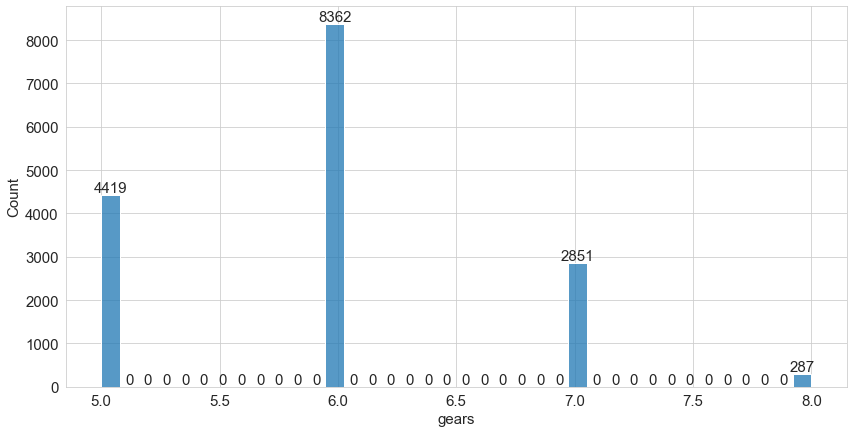

In [633]:
fig, ax = plt.subplots()

ax = sns.histplot(df.gears)

for container in ax.containers:
    ax.bar_label(container)
;

Normal...

## cons_comb

In [634]:
col_summary("cons_comb")

Column Name :  cons_comb
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  63
Value Counts :
 5.40    997
4.00    905
3.90    847
4.70    784
5.60    774
5.10    769
3.80    679
5.20    666
4.40    623
5.00    585
4.80    547
4.60    539
4.50    524
4.90    495
3.30    448
3.70    442
4.20    435
5.90    396
5.30    393
5.50    380
5.70    342
4.10    342
6.00    331
4.30    308
3.50    288
6.20    260
3.60    232
6.10    182
6.30    181
5.80    165
6.80    156
6.60    148
3.40    130
5.35    101
6.40     75
3.00     69
7.40     66
6.70     43
6.50     43
7.10     38
6.90     27
3.20     25
8.30     20
3.65     20
5.15     19
7.60     14
7.00     10
3.10      7
5.85      7
7.80      6
7.20      6
8.00      5
8.60      4
3.95      3
1.60      3
8.70      3
7.90      3
5.45      2
8.10      2
7.30      2
7.50      1
9.10      1
4.55      1
Name: cons_comb, dtype: int64

Value_counts with sort index :
 1.60      3
3.00     69
3.10 

''

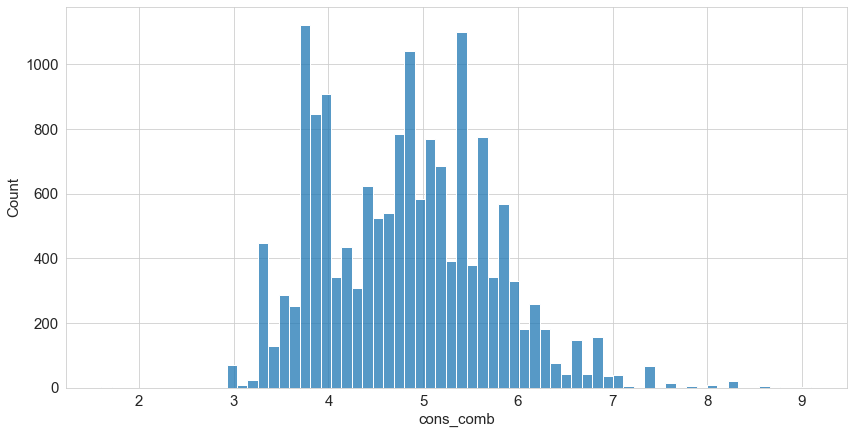

In [635]:
fig, ax = plt.subplots()

ax = sns.histplot(df.cons_comb)

;

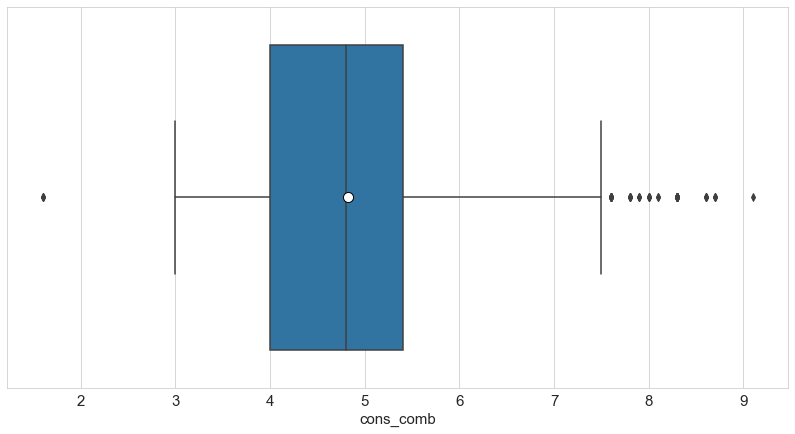

In [636]:
sns.boxplot(df.cons_comb);

For consumption, minimum value of 1.6 and maximum value of 9.10 are normal. There is no outlier.

## price

In [637]:
col_summary("price")

Column Name :  price
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  2956
Value Counts :
 14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

Value_counts with sort index :
 13       1
120      1
255      1
331      1
4950     1
        ..
64332    1
64900    1
67600    1
68320    1
74600    1
Name: price, Length: 2956, dtype: int64
########################################



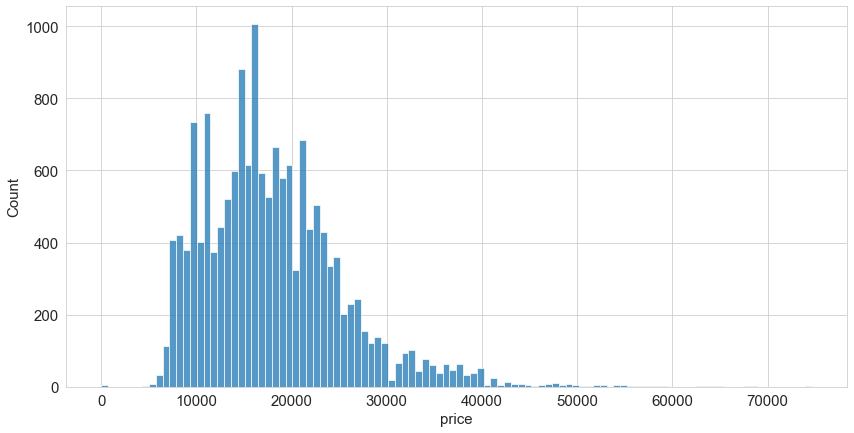

In [638]:
sns.histplot(df.price);

The distrubition is normal for European cars but there are 4 values that has not belong a car and these rows (because price is our targer feature) should be dropped.

In [639]:
df.loc[df.price.isin([13,120,255,331]),:]

make_model  price      vat     km  prev_owner     hp  type  \
6066  Opel Astra    255  Unknown   5.56        1.00 100.00  Used   
8594  Opel Corsa     13  Unknown 123.00        1.00  66.00  Used   
8828  Opel Corsa    120  Unknown  12.00        1.00  66.00   New   
8829  Opel Corsa    331  Unknown  10.00        1.00  66.00   New   

     inspection_new body_color paint_type           body  nr_of_doors  \
6066            Yes       Gold   Metallic  Station wagon         5.00   
8594            Yes       Gold   Metallic         Sedans         3.00   
8828            Yes       Grey   Metallic        Compact         5.00   
8829            Yes      White   Metallic        Compact         5.00   

      nr_of_seats gearing_type  displacement     fuel  co_2_emission  \
6066         5.00       Manual      1,598.00   Diesel         101.00   
8594         5.00       Manual      1,398.00  Benzine         128.00   
8828         5.00       Manual        999.00  Benzine         107.00   
8829         5.00       Manual        999.00  Benzine         131.00   

                                    comfort_convenience  \
6066  Air conditioning,Cruise control,Electrical sid...   
8594  Air conditioning,Cruise control,Electrical sid...   
8828  Air conditioning,Automatic climate control,Cru...   
8829  Air conditioning,Armrest,Automatic climate con...   

                                    entertainment_media  \
6066  Bluetooth,Hands-free equipment,On-board comput...   
8594  Bluetooth,CD player,Hands-free equipment,MP3,O...   
8828              Digital radio,On-board computer,Radio   
8829       Hands-free equipment,On-board computer,Radio   

                             extras  \
6066                      Roof rack   
8594                   Alloy wheels   
8828  Alloy wheels,Sport suspension   
8829     Alloy wheels,Sport package   

                                        safety_security  gears  age  \
6066  ABS,Central door lock with remote control,Dayt...   6.00 1.00   
8594  ABS,Adaptive headlights,Central door lock with...   5.00 1.00   
8828  Central door lock,Daytime running lights,Drive...   6.00 0.00   
8829  ABS,Central door lock,Driver-side airbag,Elect...   6.00 0.00   

     upholstery_type  cons_comb  
6066           Cloth       3.80  
8594           Cloth       5.60  
8828           Cloth       4.60  
8829           Cloth       5.60

In [640]:
df.drop(index=df.loc[df.price.isin([13,120,255,331]),:].index,inplace=True)

## make_model

In [641]:
col_summary("make_model")

Column Name :  make_model
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  9
Value Counts :
 Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

Value_counts with sort index :
 Audi A1           2614
Audi A2              1
Audi A3           3097
Opel Astra        2525
Opel Corsa        2216
Opel Insignia     2598
Renault Clio      1839
Renault Duster      34
Renault Espace     991
Name: make_model, dtype: int64
########################################



In [642]:
df[df["make_model"] == "Audi A2"]

make_model  price             vat    km  prev_owner    hp  \
2614    Audi A2  28200  VAT deductible 26.17        1.00 85.00   

                type inspection_new body_color paint_type      body  \
2614  Employee's car            Yes       Grey   Metallic  Off-Road   

      nr_of_doors  nr_of_seats gearing_type  displacement    fuel  \
2614         5.00         5.00       Manual      1,598.00  Diesel   

      co_2_emission                                comfort_convenience  \
2614         104.00  Air conditioning,Armrest,Automatic climate con...   

                                    entertainment_media        extras  \
2614  Bluetooth,CD player,Hands-free equipment,MP3,O...  Alloy wheels   

                                        safety_security  gears  age  \
2614  ABS,Adaptive Cruise Control,Central door lock,...   5.00 1.00   

     upholstery_type  cons_comb  
2614           Cloth       4.90

The Audi A2 (internally designated Typ 8Z) is a compact MPV-styled supermini car, with a five-door hatchback body style and four or five seats, produced by the German manufacturer Audi from November 1999 (for the 2000 model year) to August 2005 [Source](https://en.wikipedia.org/wiki/Audi_A2). So it is impossible to be a 1-year old Audi A2.

In [643]:
df.drop(index=df[df["make_model"] == "Audi A2"].index, inplace=True)

## fuel

In [644]:
col_summary("fuel")

Column Name :  fuel
--------------------------------
Percentage of Nulls   :  % 0.0
Number of Nulls   :  0
Number of Uniques :  4
Value Counts :
 Benzine     8548
Diesel      7297
LPG/CNG       64
Electric       5
Name: fuel, dtype: int64

Value_counts with sort index :
 Benzine     8548
Diesel      7297
Electric       5
LPG/CNG       64
Name: fuel, dtype: int64
########################################



In [645]:
df[df["fuel"] == "Electric"]

make_model  price               vat    km  prev_owner     hp  type  \
3356        Audi A3  24950    VAT deductible 57.00        1.00 150.00  Used   
3612        Audi A3  38450  Price negotiable 13.80        1.00 110.00  Used   
3615        Audi A3  35899           Unknown 20.88        1.00 110.00  Used   
3617        Audi A3  38000  Price negotiable 12.00        1.00 110.00  Used   
13397  Renault Clio   8490           Unknown 23.86        1.00  87.00  Used   

      inspection_new body_color paint_type     body  nr_of_doors  nr_of_seats  \
3356              No       Blue   Metallic  Compact         5.00         5.00   
3612             Yes      Black   Metallic   Sedans         5.00         5.00   
3615             Yes      White   Metallic   Sedans         5.00         5.00   
3617             Yes       Grey   Metallic   Sedans         5.00         5.00   
13397             No      White   Metallic   Sedans         5.00         5.00   

         gearing_type  displacement      fuel  co_2_emission  \
3356   Semi-automatic      1,400.00  Electric         103.00   
3612   Semi-automatic      1,395.00  Electric          36.00   
3615   Semi-automatic      1,395.00  Electric          36.00   
3617   Semi-automatic      1,395.00  Electric          36.00   
13397       Automatic      1,461.00  Electric          85.00   

                                     comfort_convenience  \
3356   Air conditioning,Armrest,Automatic climate con...   
3612   Air conditioning,Armrest,Automatic climate con...   
3615   Air conditioning,Power windows,Seat ventilatio...   
3617   Air conditioning,Armrest,Automatic climate con...   
13397  Air conditioning,Cruise control,Navigation system   

                                     entertainment_media  \
3356   Bluetooth,CD player,Digital radio,Hands-free e...   
3612   Bluetooth,CD player,Digital radio,Hands-free e...   
3615                                     Bluetooth,Radio   
3617   Bluetooth,CD player,Digital radio,Hands-free e...   
13397                                  On-board computer   

                                                  extras  \
3356   Alloy wheels,Roof rack,Sport package,Sport sea...   
3612   Alloy wheels,Sport package,Sport seats,Voice C...   
3615                                        Alloy wheels   
3617   Alloy wheels,Shift paddles,Sport package,Sport...   
13397                                       Alloy wheels   

                                         safety_security  gears  age  \
3356   ABS,Adaptive Cruise Control,Adaptive headlight...   6.00 3.00   
3612   ABS,Adaptive Cruise Control,Alarm system,Centr...   6.00 1.00   
3615   ABS,Adaptive Cruise Control,Alarm system,Centr...   6.00 1.00   
3617   ABS,Adaptive Cruise Control,Adaptive headlight...   6.00 1.00   
13397                                 Driver-side airbag   5.00 3.00   

         upholstery_type  cons_comb  
3356   Part/Full Leather       3.90  
3612               Cloth       1.60  
3615               Cloth       1.60  
3617   Part/Full Leather       1.60  
13397              Cloth       3.30

Actually most of these data were filled by us so these might mislead our insight.

In [646]:
df.drop(index=df[df["fuel"] == "Electric"].index, inplace=True)

In [647]:
df.reset_index(drop=True,inplace=True)

In [648]:
df.shape

(15909, 25)

# Final Step (Checking final situation of data via graphs)

In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15909 non-null  object 
 1   price                15909 non-null  int64  
 2   vat                  15909 non-null  object 
 3   km                   15909 non-null  float64
 4   prev_owner           15909 non-null  float64
 5   hp                   15909 non-null  float64
 6   type                 15909 non-null  object 
 7   inspection_new       15909 non-null  object 
 8   body_color           15909 non-null  object 
 9   paint_type           15909 non-null  object 
 10  body                 15909 non-null  object 
 11  nr_of_doors          15909 non-null  float64
 12  nr_of_seats          15909 non-null  float64
 13  gearing_type         15909 non-null  object 
 14  displacement         15909 non-null  float64
 15  fuel                 15909 non-null 

In [650]:
df_num = df.select_dtypes("number")
df_num

price    km  prev_owner     hp  nr_of_doors  nr_of_seats  displacement  \
0      15770 56.01        2.00  66.00         5.00         5.00      1,422.00   
1      14500 80.00        1.00 141.00         3.00         4.00      1,798.00   
2      14640 83.45        1.00  85.00         4.00         4.00      1,598.00   
3      14500 73.00        1.00  66.00         3.00         4.00      1,422.00   
4      16790 16.20        1.00  66.00         5.00         5.00      1,422.00   
...      ...   ...         ...    ...          ...          ...           ...   
15904  39950 11.00        1.00 147.00         5.00         5.00      1,997.00   
15905  39885  9.90        1.00 165.00         5.00         5.00      1,798.00   
15906  39875 15.00        1.00 146.00         5.00         7.00      1,997.00   
15907  39700 10.00        1.00 147.00         5.00         7.00      1,997.00   
15908  40999  5.00        1.00 165.00         5.00         5.00      1,798.00   

       co_2_emission  gears  age  cons_comb  
0              99.00   7.00 3.00       3.80  
1             129.00   7.00 2.00       5.60  
2              99.00   7.00 3.00       3.80  
3              99.00   6.00 3.00       3.80  
4             109.00   6.00 3.00       4.10  
...              ...    ...  ...        ...  
15904         139.00   6.00 0.00       5.30  
15905         168.00   7.00 0.00       7.40  
15906         139.00   6.00 0.00       5.30  
15907         139.00   6.00 0.00       5.30  
15908         153.00   6.00 0.00       6.80  

[15909 rows x 11 columns]

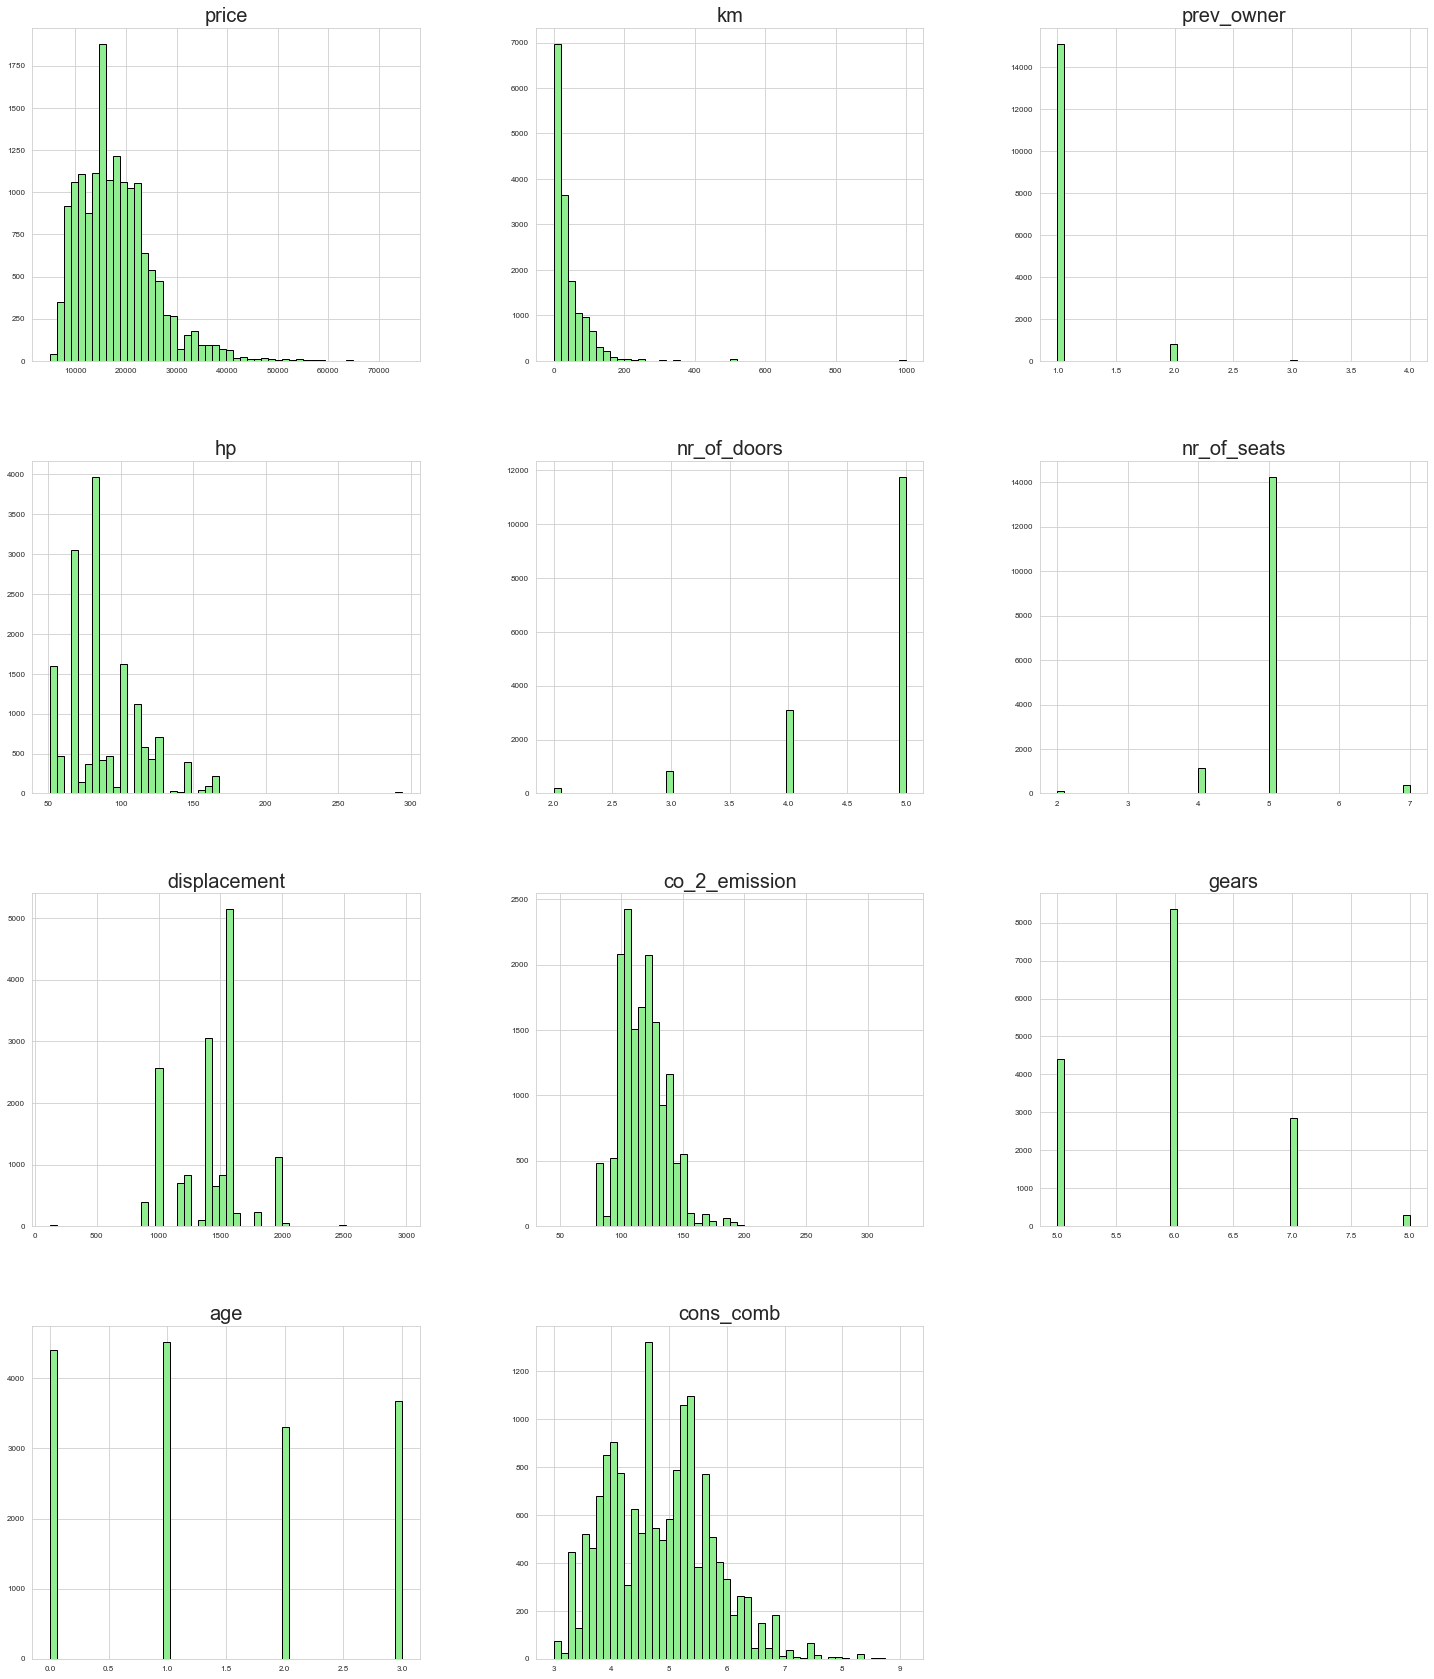

In [651]:
fig_ = df_num.hist(figsize=(25, 30), bins=50, color="lightgreen", edgecolor="black", xlabelsize=8, ylabelsize=8)

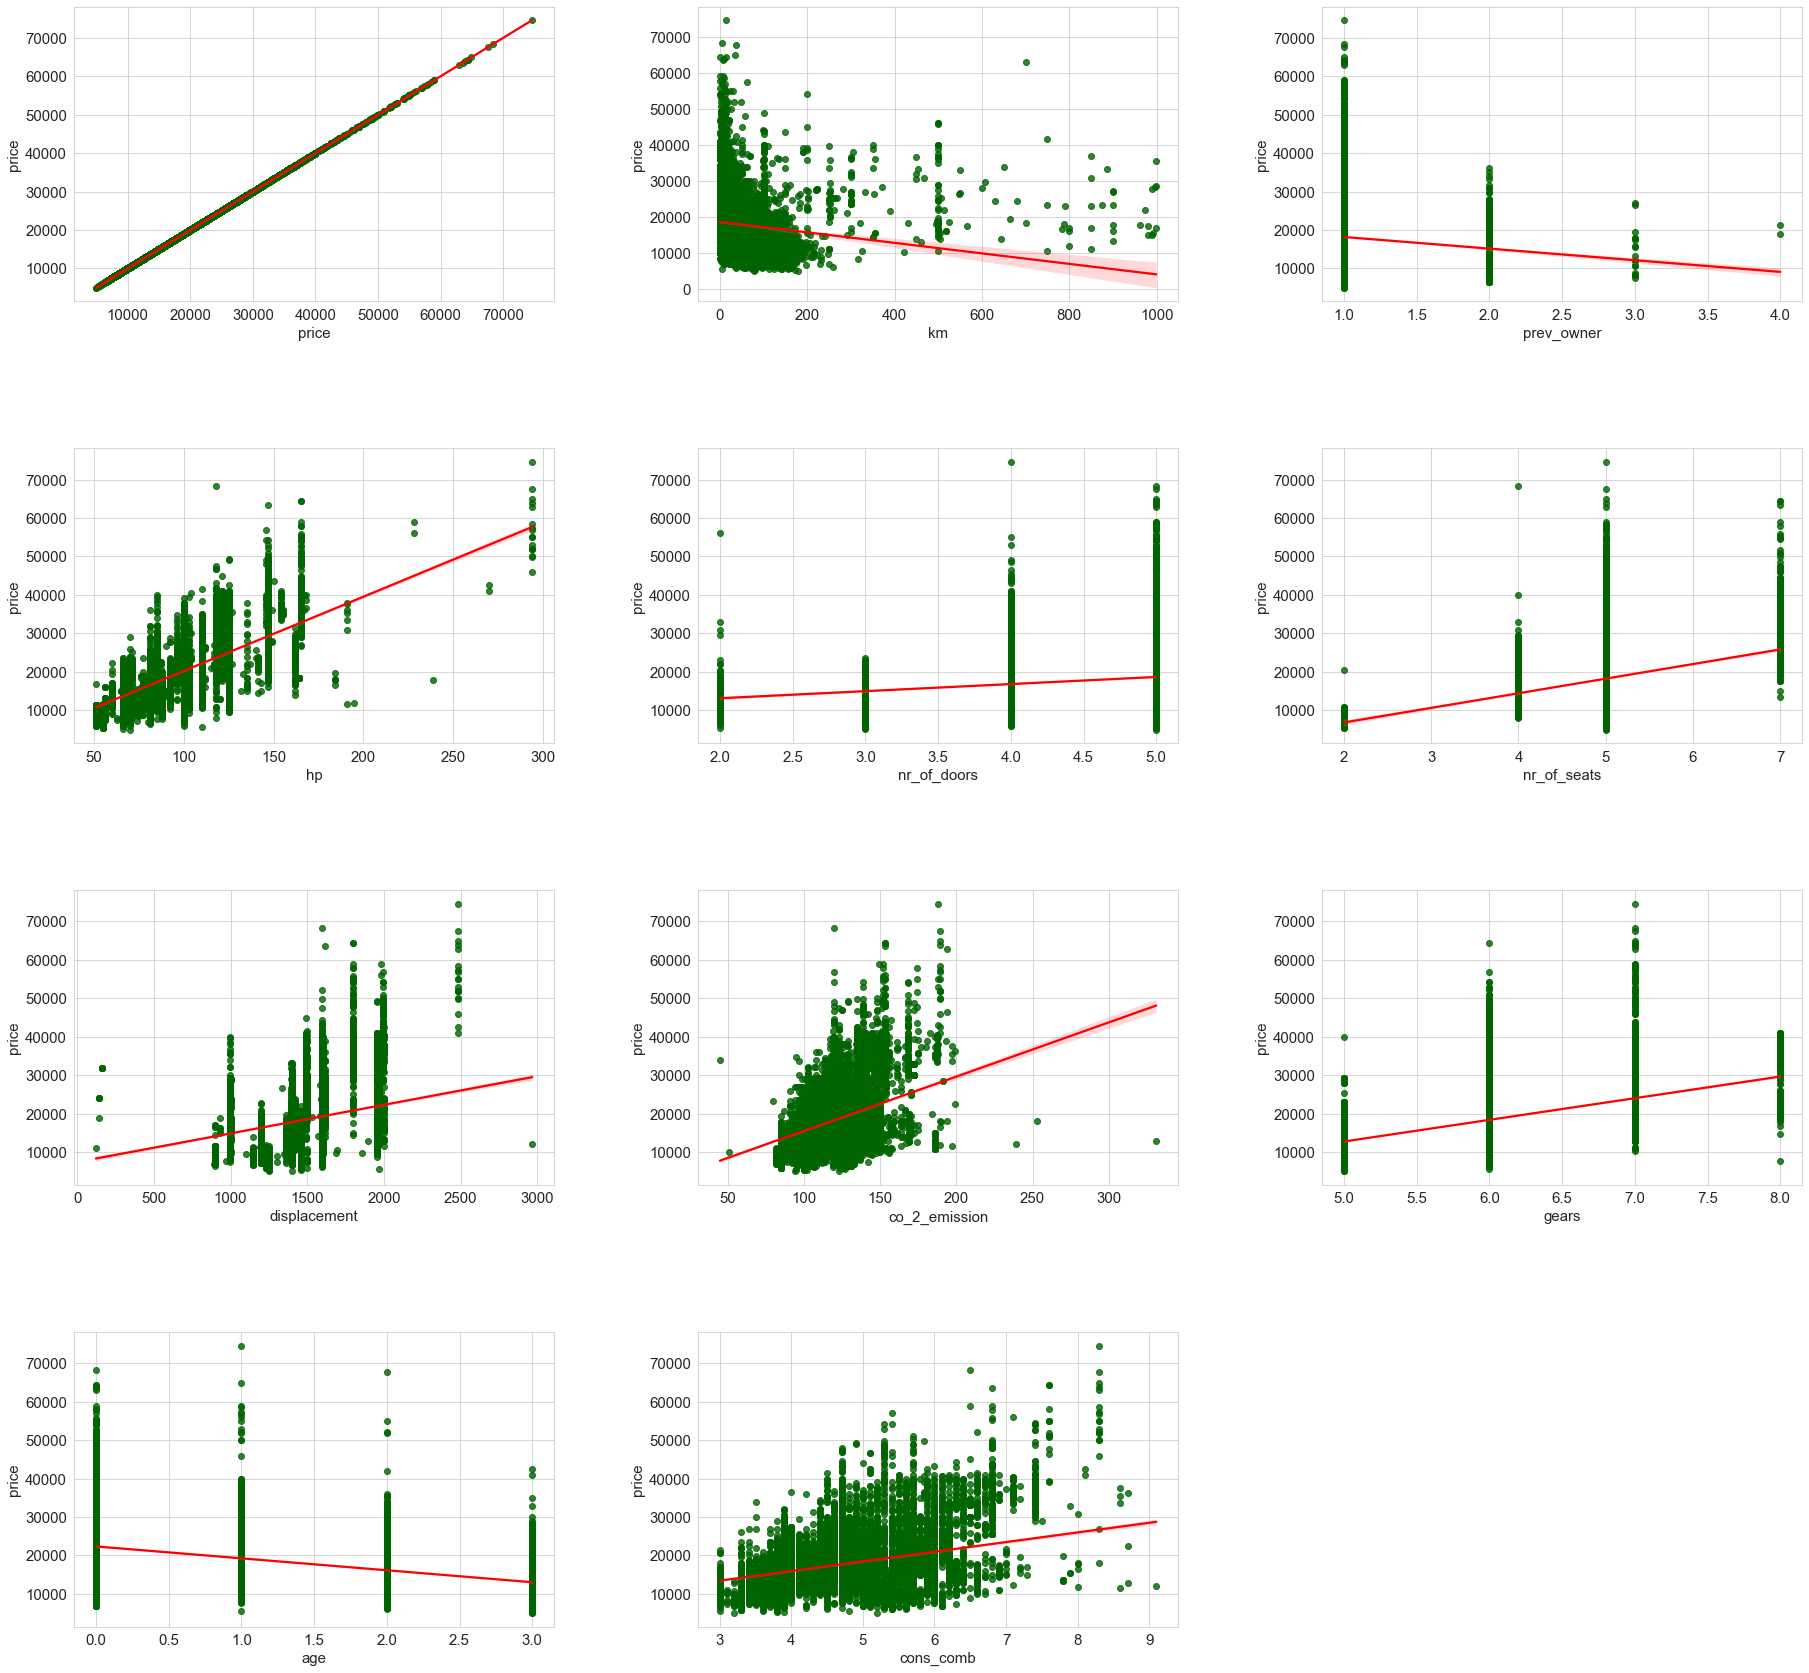

In [652]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_num.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "price", data=df_num, scatter_kws={"color": "darkgreen"}, line_kws={"color": "red"})

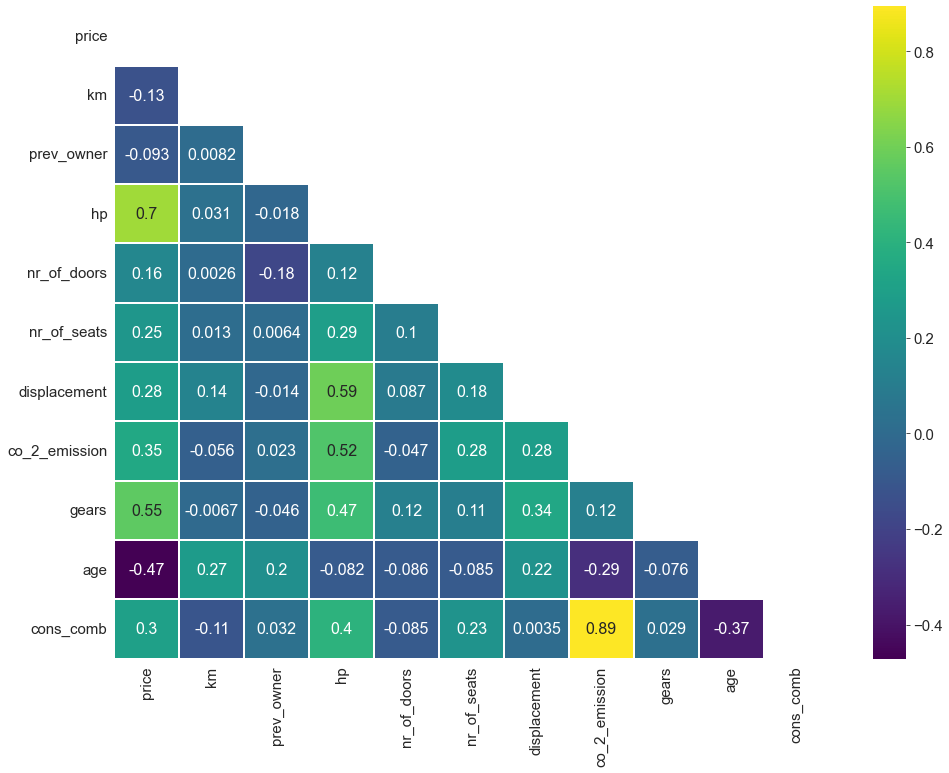

In [653]:
plt.figure(figsize=(16, 12))

mask = np.triu(np.ones_like(df_num.corr(), dtype=bool))

sns.heatmap(df_num.corr(), annot=True,mask= mask, cmap="viridis", linewidths=0.2, annot_kws={"size": 16});

There is a strong correlation between co_2_emission and cons_comb columns. We call it as multicolinearity and for the machine learning part multicolinearity might be misleading. Therefore, one of the columns should be dropped.

In [654]:
df.drop("co_2_emission",axis=1,inplace=True)

In [655]:
df.shape

(15909, 24)

## Export dataframe to csv file (without dummy)

In [656]:
df.to_csv("final_scout_not_dummy.csv", index=False)

# Dummy Operation

In [657]:
df = df.join(df["comfort_convenience"].str.get_dummies(sep=",").add_prefix("cc_"))
df = df.join(df["entertainment_media"].str.get_dummies(sep=",").add_prefix("em_"))
df = df.join(df["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["safety_security"].str.get_dummies(sep=",").add_prefix("ss_"))

In [658]:
df.drop(["comfort_convenience", "entertainment_media", "extras", "safety_security"], axis=1, inplace=True)

In [659]:
df.shape

(15909, 114)

In [660]:
df_dummy = pd.get_dummies(df, drop_first=True)

In [661]:
df_dummy.shape

(15909, 144)

In [662]:
df_dummy.head()

price    km  prev_owner     hp  nr_of_doors  nr_of_seats  displacement  \
0  15770 56.01        2.00  66.00         5.00         5.00      1,422.00   
1  14500 80.00        1.00 141.00         3.00         4.00      1,798.00   
2  14640 83.45        1.00  85.00         4.00         4.00      1,598.00   
3  14500 73.00        1.00  66.00         3.00         4.00      1,422.00   
4  16790 16.20        1.00  66.00         5.00         5.00      1,422.00   

   gears  age  cons_comb  cc_Air conditioning  cc_Air suspension  cc_Armrest  \
0   7.00 3.00       3.80                    1                  0           1   
1   7.00 2.00       5.60                    1                  0           0   
2   7.00 3.00       3.80                    1                  0           0   
3   6.00 3.00       3.80                    0                  1           1   
4   6.00 3.00       4.10                    1                  0           1   

   cc_Automatic climate control  cc_Auxiliary heating  cc_Cruise control  \
0                             1                     0                  1   
1                             1                     0                  0   
2                             0                     0                  1   
3                             0                     1                  0   
4                             1                     0                  0   

   cc_Electric Starter  cc_Electric tailgate  cc_Electrical side mirrors  \
0                    0                     0                           1   
1                    0                     0                           0   
2                    0                     0                           1   
3                    0                     0                           1   
4                    0                     0                           1   

   cc_Electrically adjustable seats  cc_Electrically heated windshield  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   cc_Heads-up display  cc_Heated steering wheel  cc_Hill Holder  \
0                    0                         0               1   
1                    0                         0               1   
2                    0                         0               1   
3                    1                         0               1   
4                    0                         0               1   

   cc_Keyless central door lock  cc_Leather seats  cc_Leather steering wheel  \
0                             0                 0                          1   
1                             0                 0                          1   
2                             0                 0                          1   
3                             0                 0                          1   
4                             0                 0                          1   

   cc_Light sensor  cc_Lumbar support  cc_Massage seats  \
0                1                  0                 0   
1                0                  1                 0   
2                0                  0                 0   
3                1                  1                 0   
4                1                  0                 0   

   cc_Multi-function steering wheel  cc_Navigation system  cc_Panorama roof  \
0                                 1                     1                 0   
1                                 0                     0                 0   
2                                 1                     1                 0   
3                                 1                     1                 0   
4                                 1                     0   

## Export dataframe to csv file (dummy)

In [663]:
df_dummy.to_csv("final_scout_dummy.csv", index=False)